In [17]:
%pylab inline
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import display
from JSAnimation.IPython_display import display_animation

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['info']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# What is Gym?
According to the documentation "OpenAI Gym is a toolkit for developing and comparing reinforcement learning algorithms".

Gym consists of 2 parts:
   1. The python open source library (and bindings for other languages): a collection of environments.
   2. The OpenAI Gym service: a site allowing people to compare performance of their methods.

# Environments

### 1. Classic control.

<img src="images/cartpole.jpg">

### 2. Algorithmic: simple computations such as adding multi-digit numbers, copying and reversing sequences.

<img src="images/algo.png">

### 3. Atari.

<img src="images/atari.png">

### 4. Board games: Go.

<img src="images/go.png">

### 5. 2D and 3D robots: continuous control a robot in simulation (powered by MuJoCo).

<img src="images/mujoco.png">


# Interface

All environments have a shared interface:

[2016-10-19 09:37:33,598] Making new env: CartPole-v0


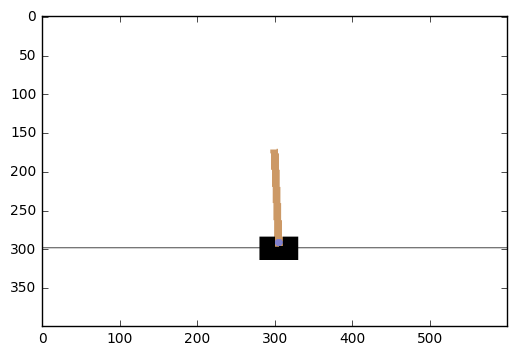

In [18]:
import gym


# 1) Initialize a new environment
env = gym.make("CartPole-v0")

# 2) Reset the environment's state. Returns observation.
observation = env.reset() 

action = env.action_space.sample() # Sample random action.

# 3) Step the environment by one timestep
observation, reward, done, info = env.step(action)

# 4) Render one frame of the environment. The default mode will do something human friendly, such as pop up a window. Passing the close flag signals the renderer to close any such windows.
frame = env.render(mode = 'rgb_array')

env.render(close=True)
plt.imshow(frame)

# If you know these four functions, you (almost) know how to use Gym!\*

\* Actually no, there are a lot of small details.

Also you can upload your results to the scoreboard. In order to do that you need to add 3 lines of code:
1. env.monitor.start('/tmp/cartpole-experiment-1')
2. env.monitor.close()
3. gym.upload('/tmp/cartpole-experiment-1', api_key='sk_skajRaW4SIiyRx3r53gDRvTZmJQqRN7HwBLBYw')

In [19]:
import gym
env = gym.make('CartPole-v0')

env.monitor.start('/tmp/cartpole-experiment-1', force=True)

for i_episode in range(20):
    observation = env.reset()
    for t in range(100):
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            break

env.monitor.close()

# gym.upload('/tmp/cartpole-experiment-1', api_key='sk_skajRaW4SIiyRx3r53gDRvTZmJQqRN7HwBLBYw')

[2016-10-19 09:37:34,775] Making new env: CartPole-v0
[2016-10-19 09:37:34,781] Clearing 8 monitor files from previous run (because force=True was provided)
[2016-10-19 09:37:34,788] Starting new video recorder writing to /tmp/cartpole-experiment-1/openaigym.video.2.26921.video000000.mp4
[2016-10-19 09:37:34,966] Starting new video recorder writing to /tmp/cartpole-experiment-1/openaigym.video.2.26921.video000001.mp4
[2016-10-19 09:37:35,780] Starting new video recorder writing to /tmp/cartpole-experiment-1/openaigym.video.2.26921.video000008.mp4
[2016-10-19 09:37:36,373] Finished writing results. You can upload them to the scoreboard via gym.upload('/tmp/cartpole-experiment-1')


# Examples

### Random agent

In [20]:
# Run a demo of the environment
observation = env.reset()
cum_reward = 0
frames = []
for t in range(200):
    # Render into buffer. 
    # You will still see the window.
    frames.append(env.render(mode = 'rgb_array'))
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
env.render(close=True)

[2016-10-19 09:37:38,048] You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.



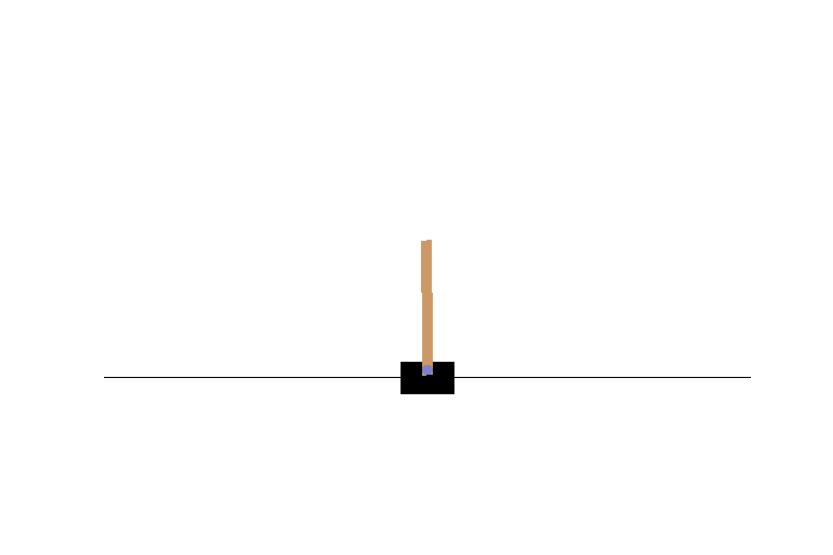
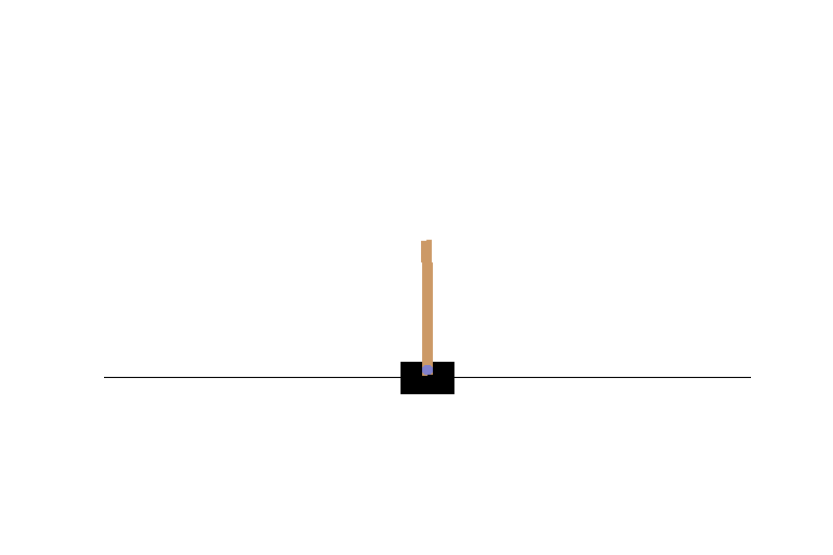
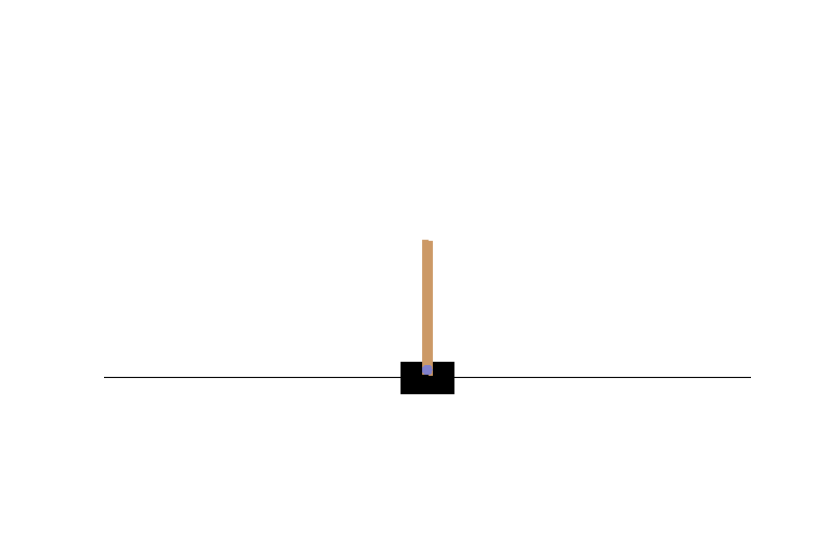
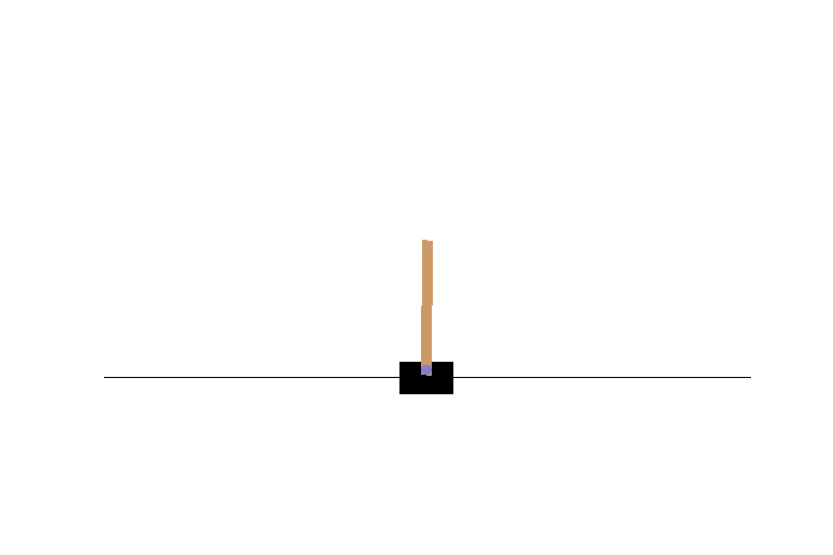
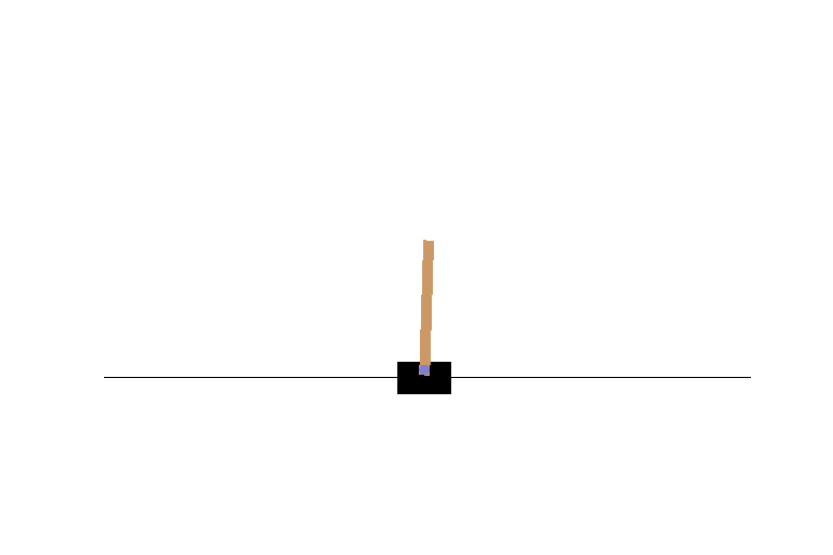
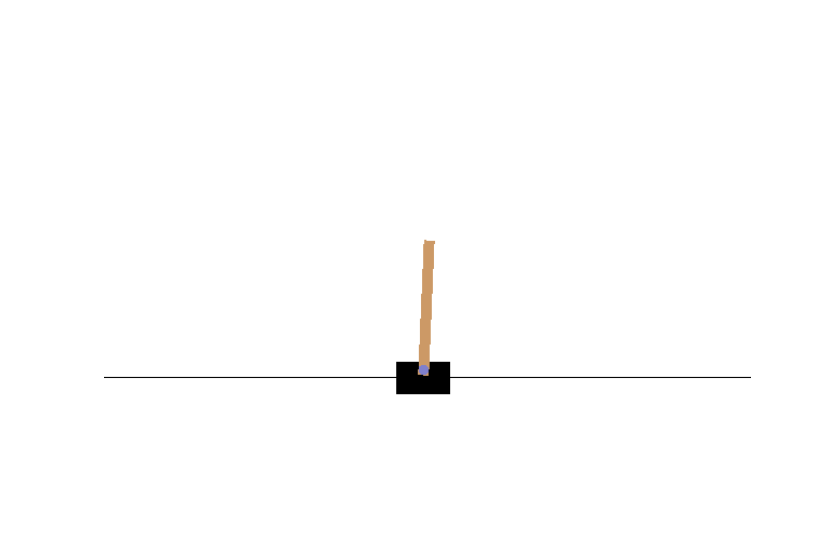
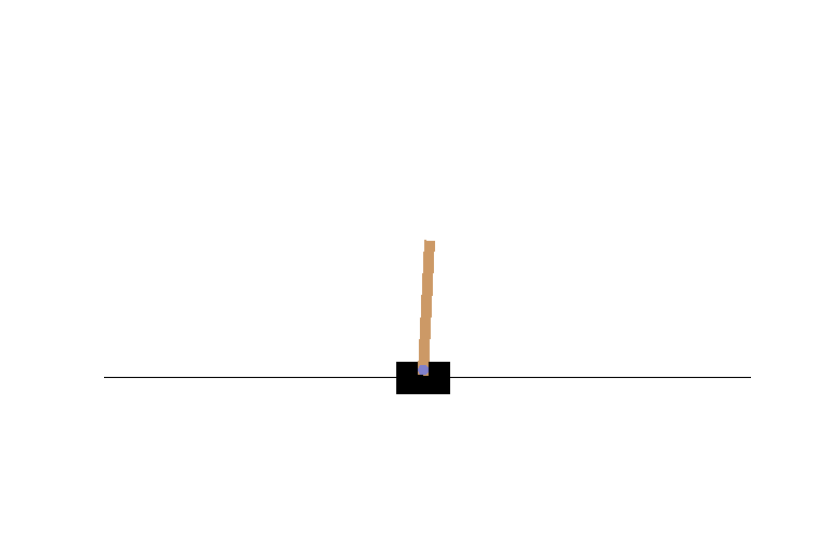
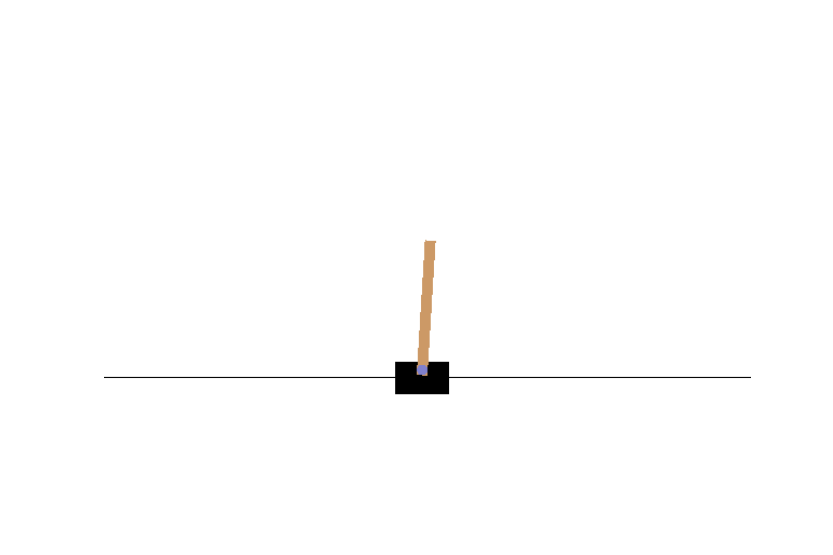
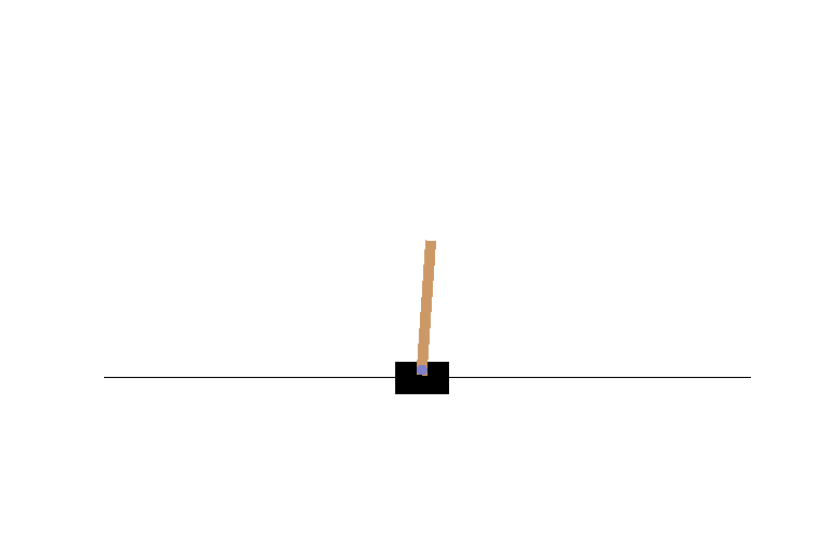
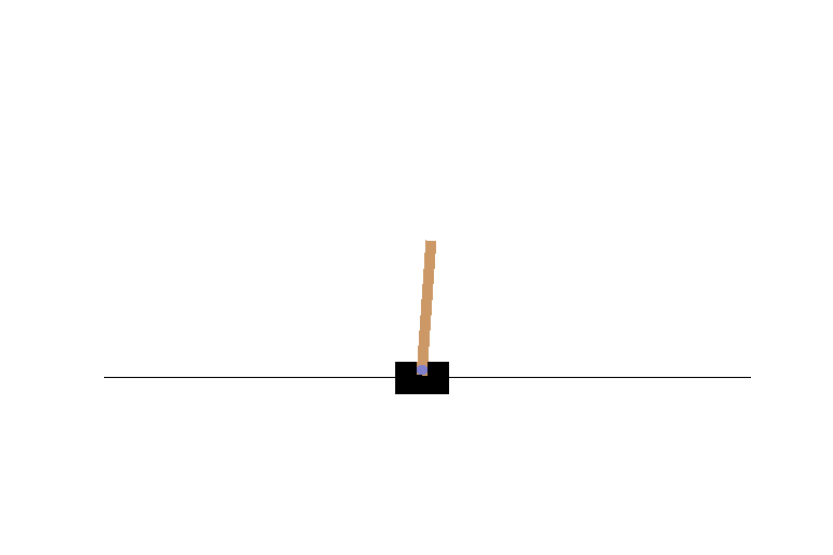
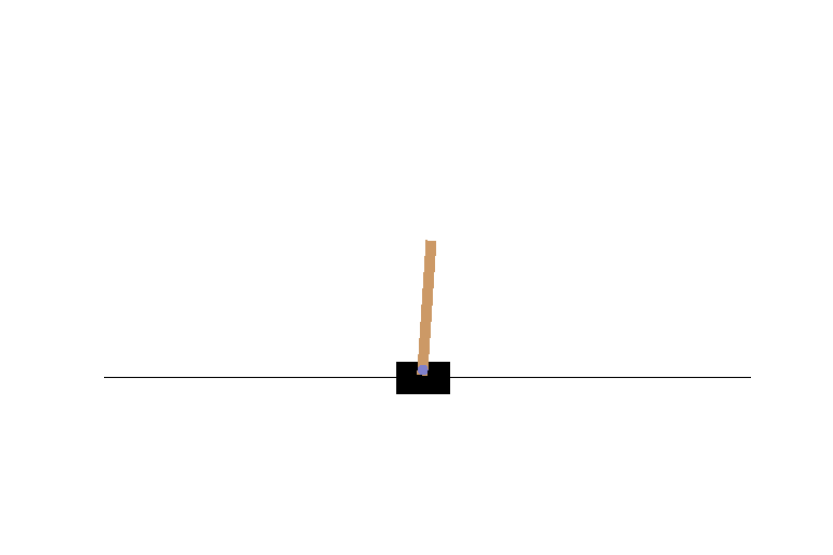
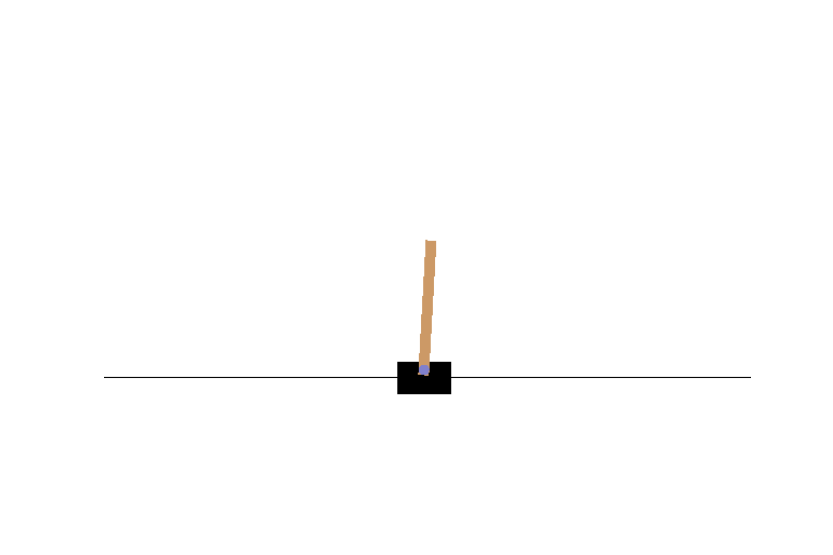
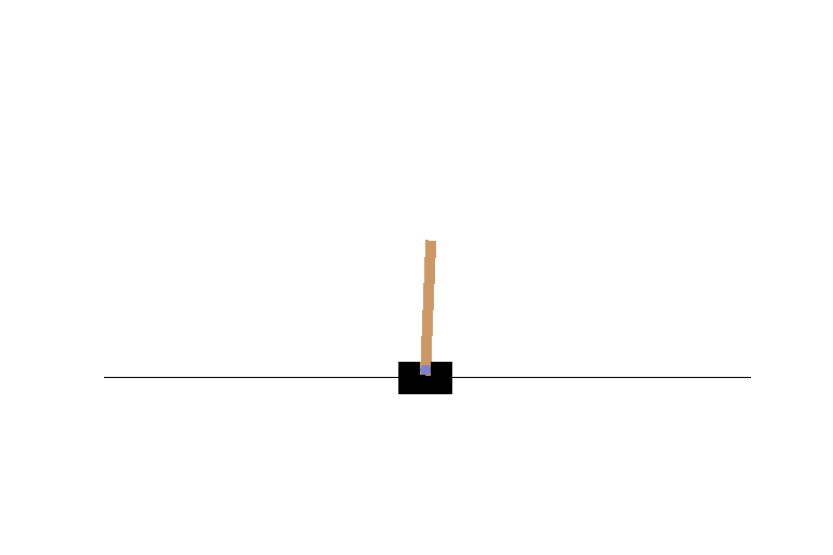
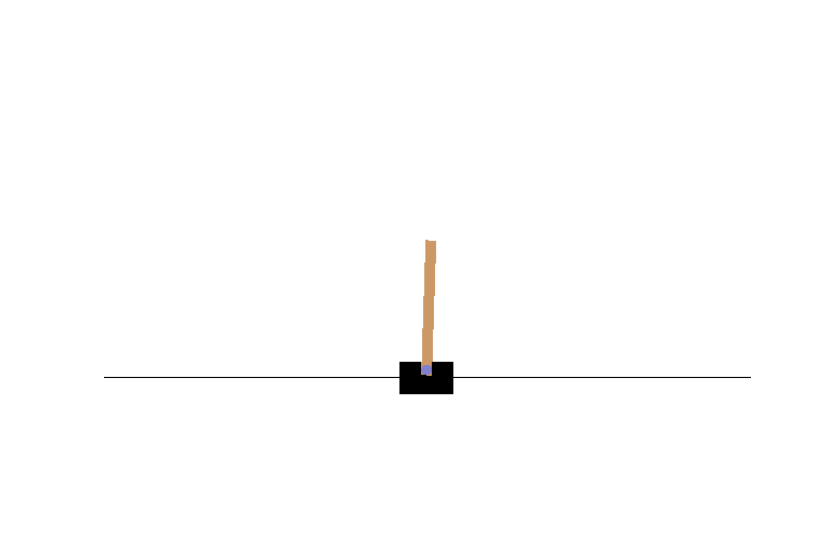
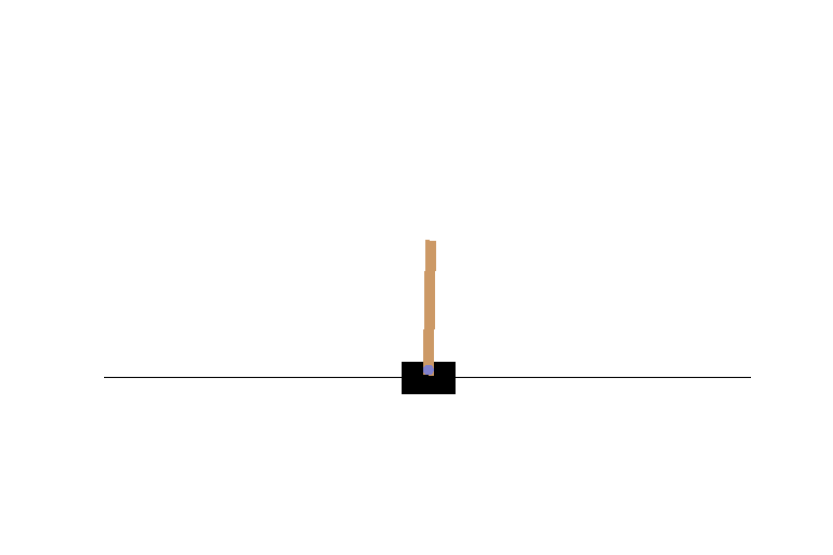
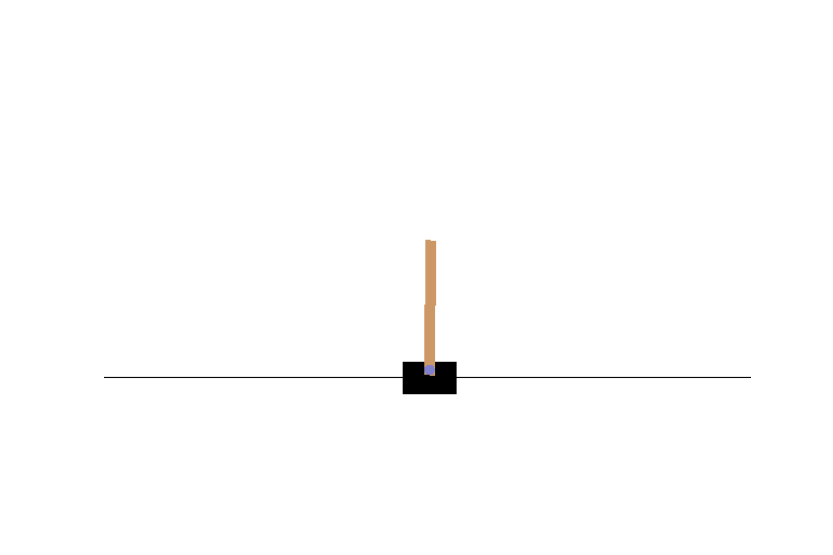
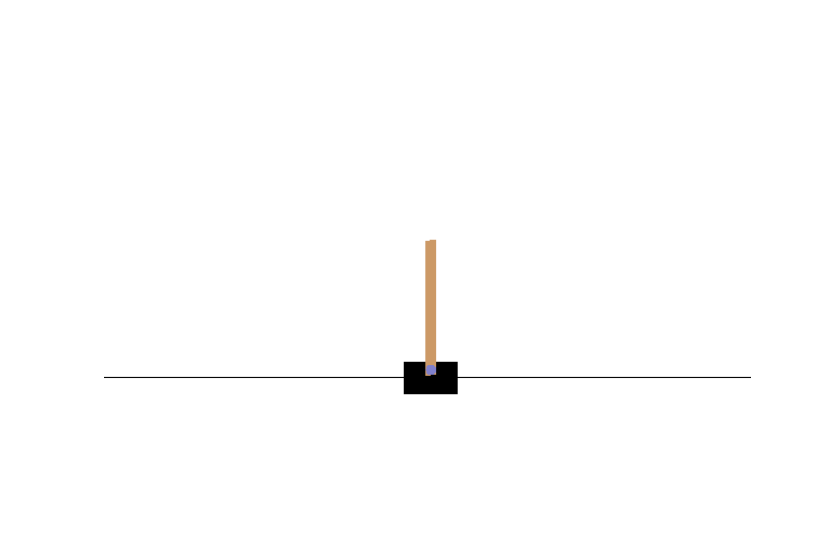
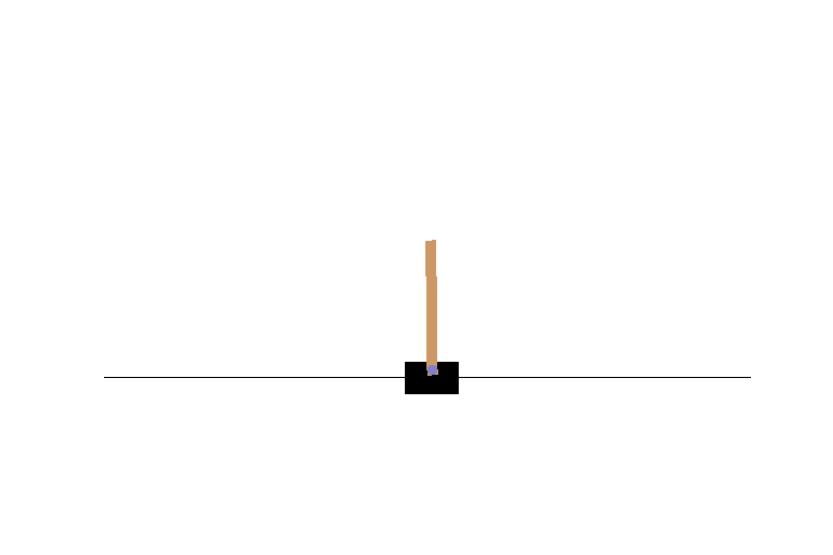
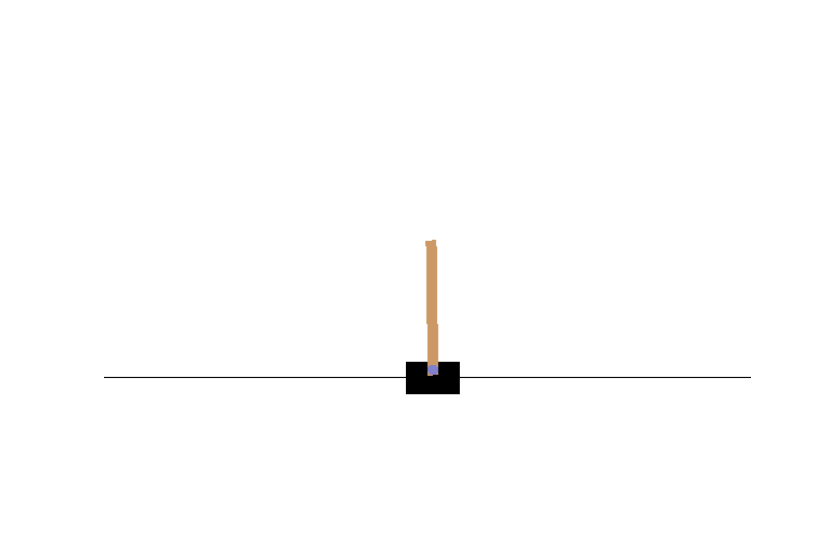
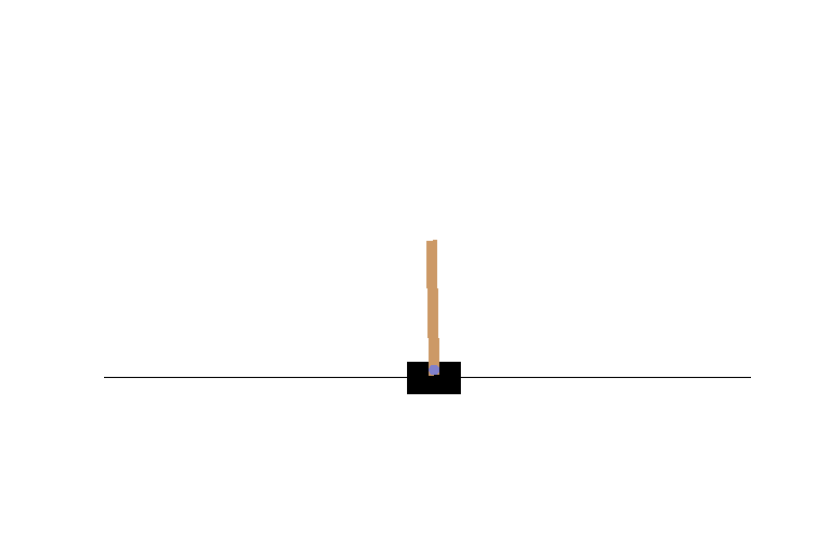
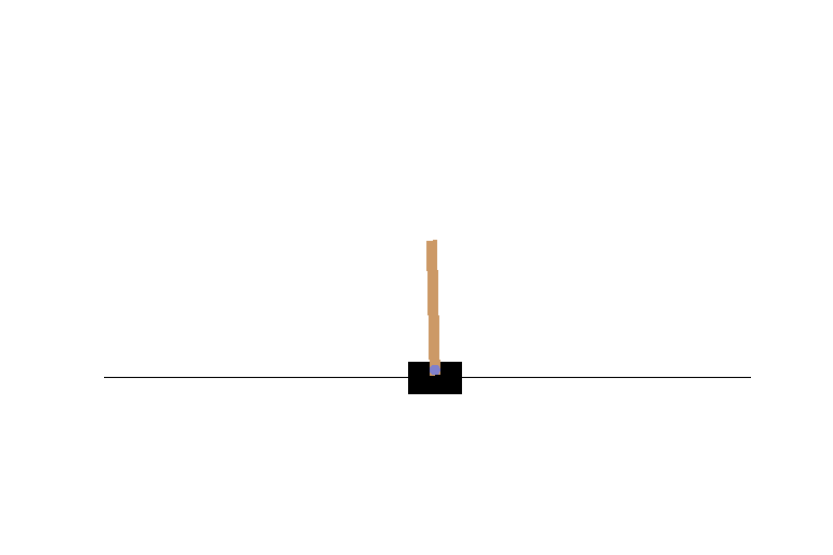
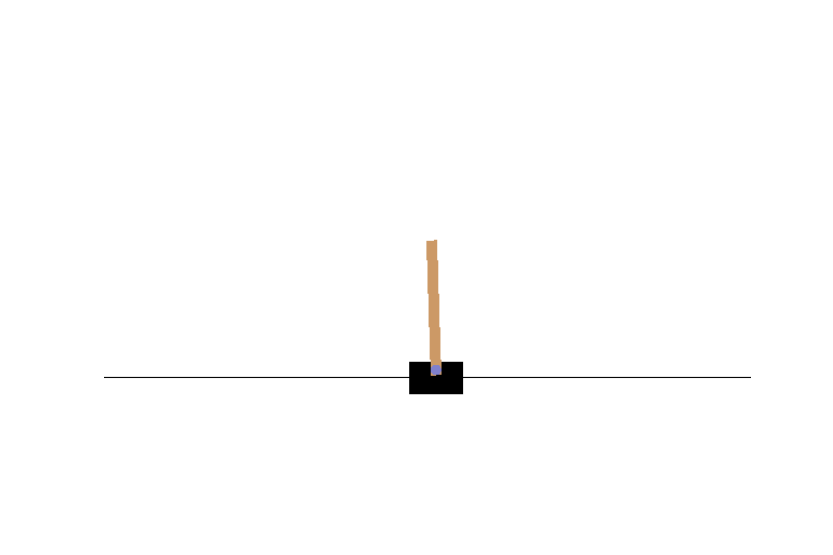
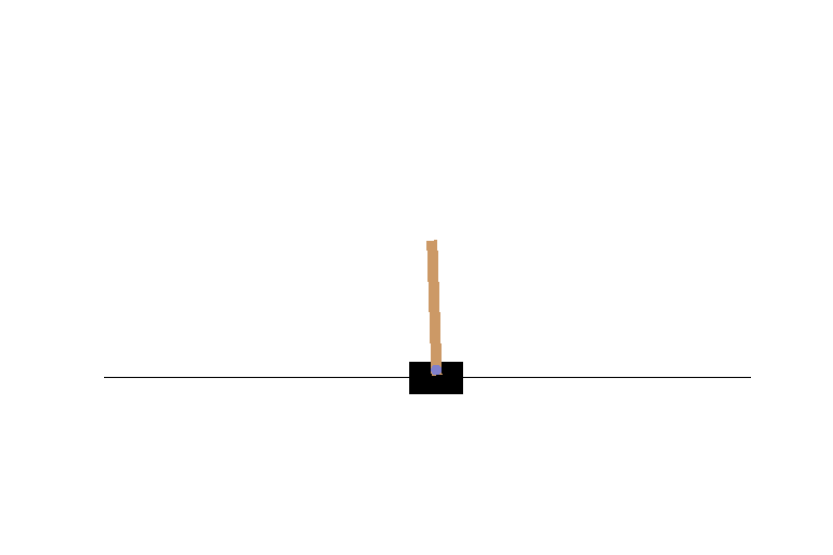
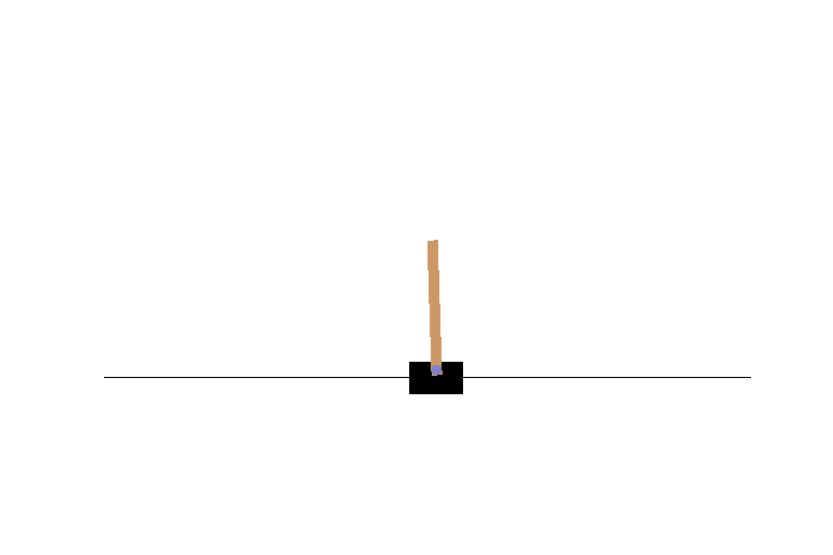
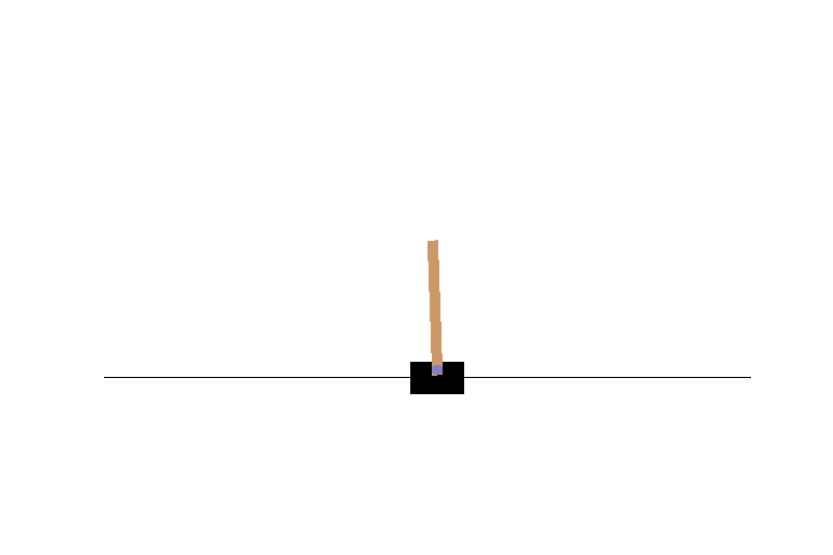
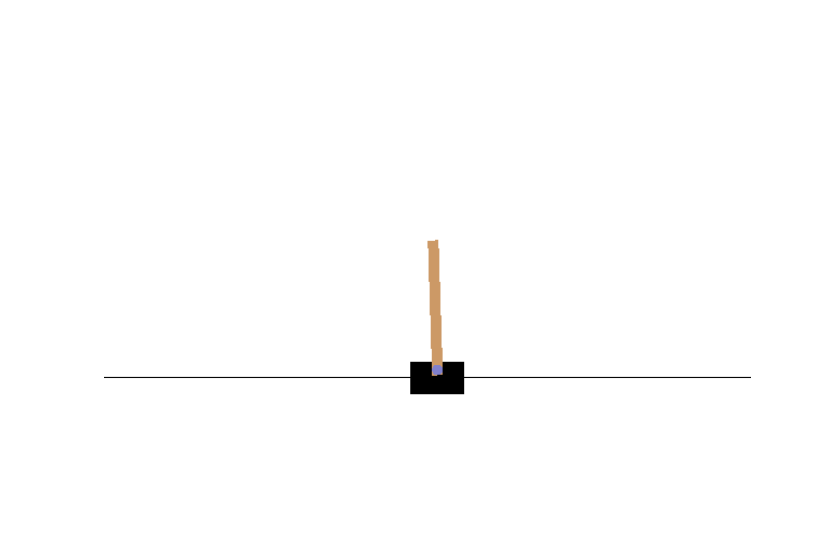
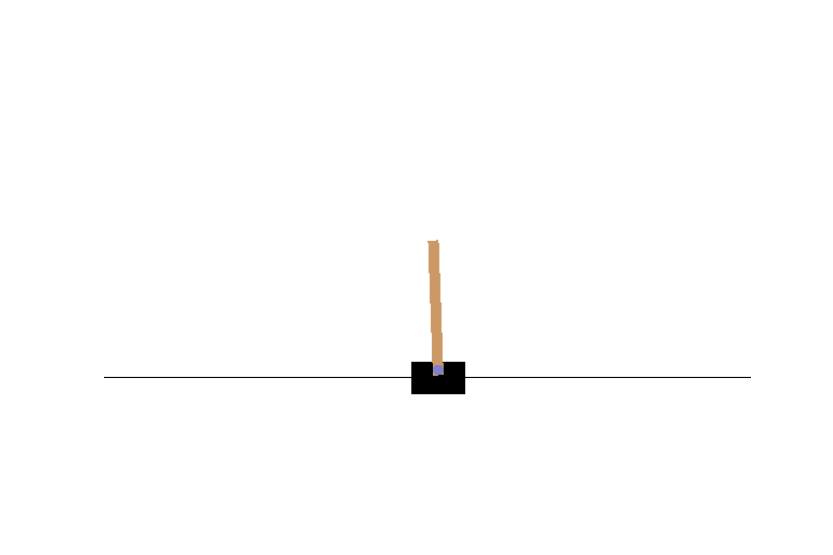
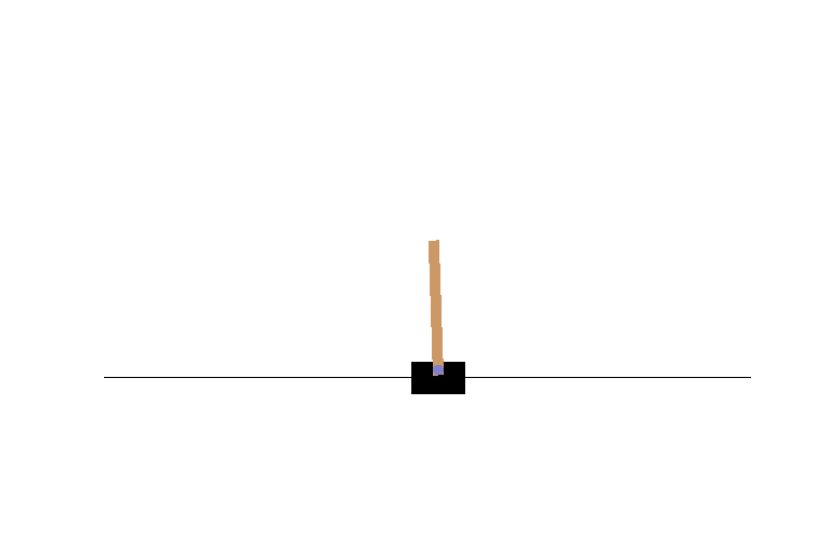
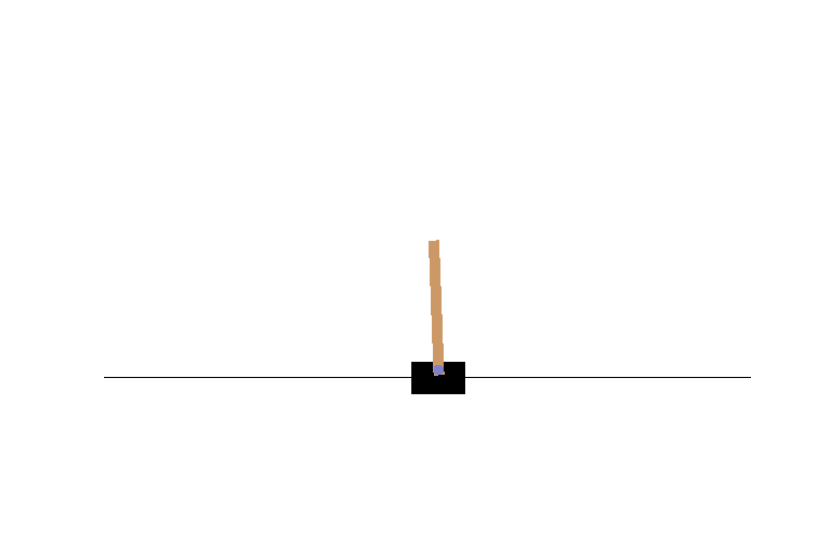
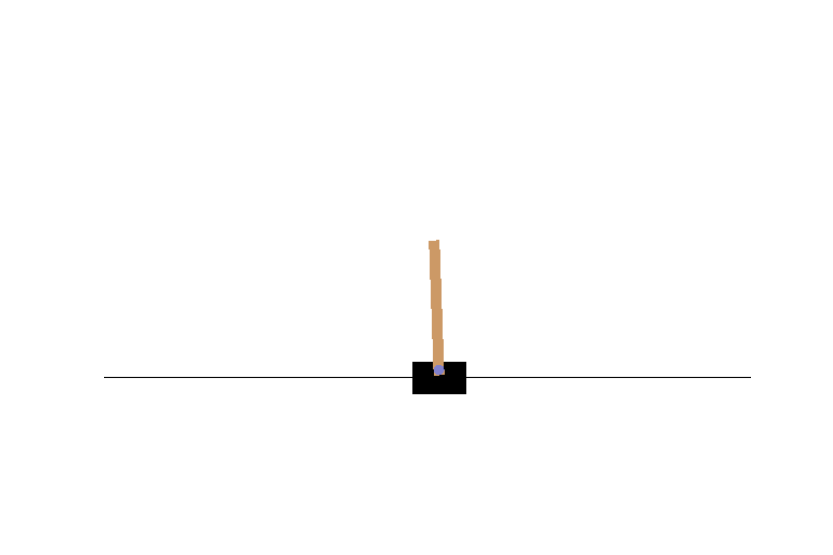
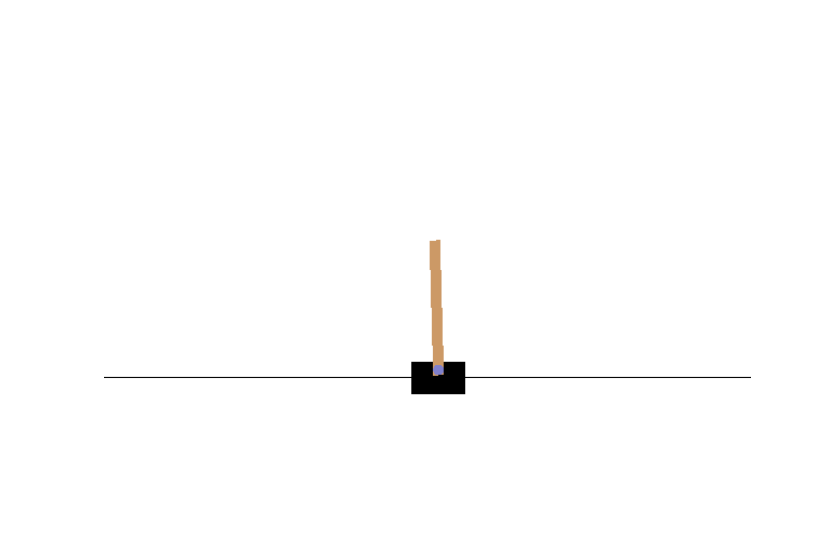
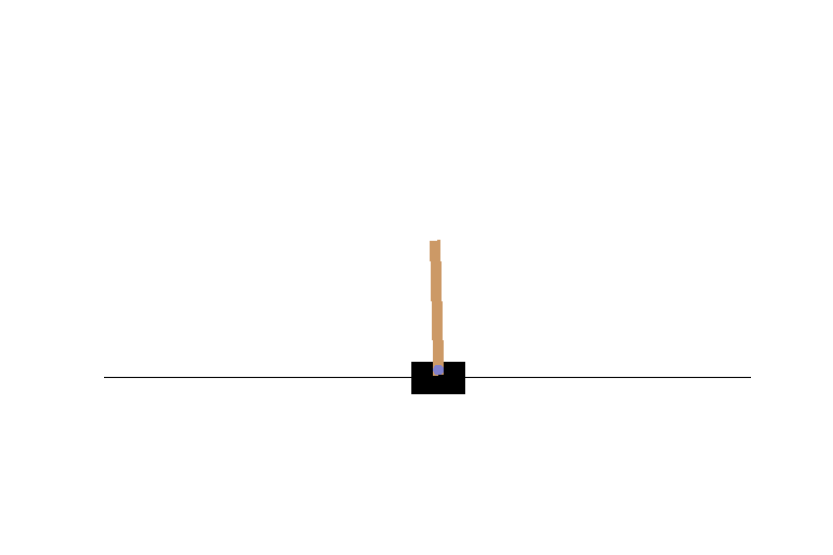
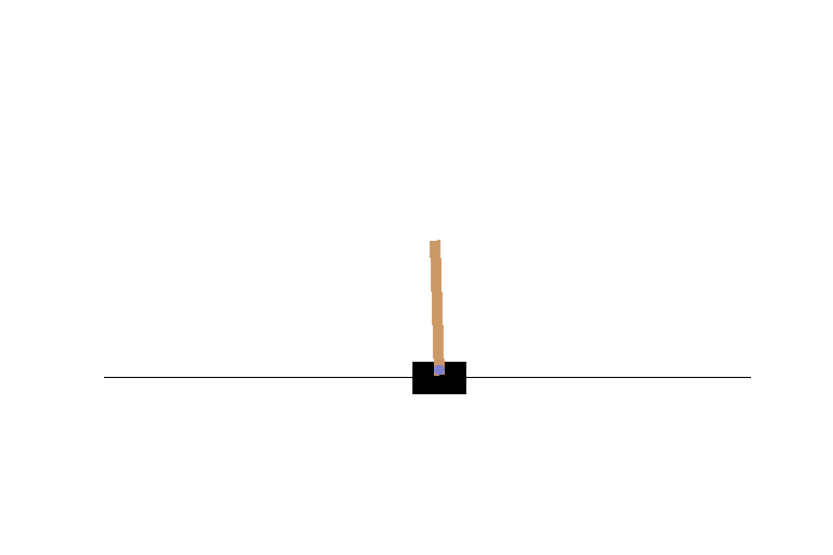
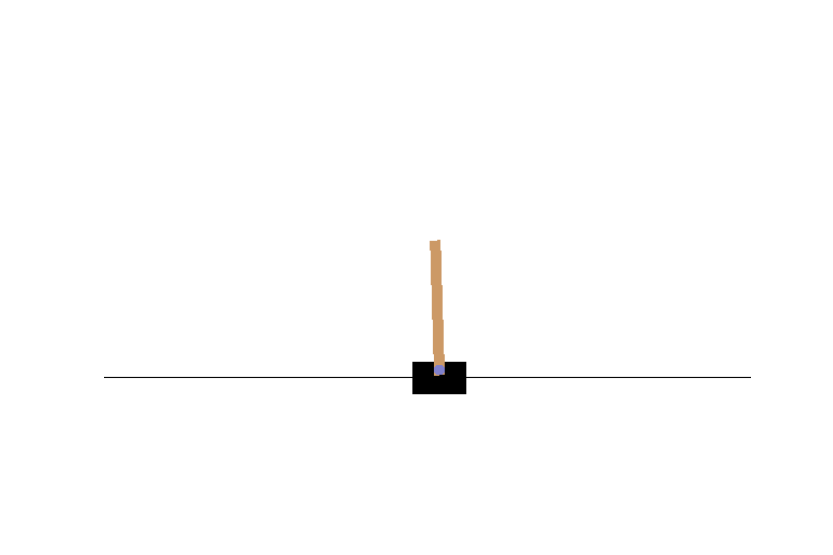
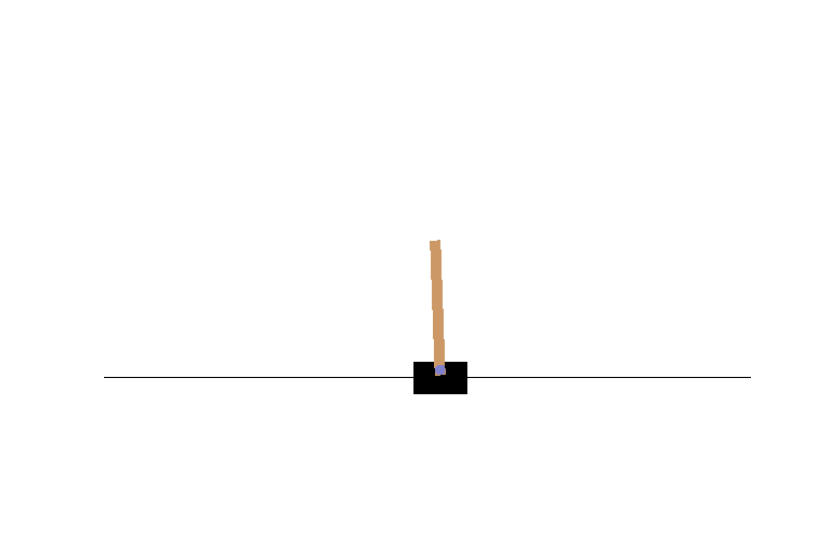
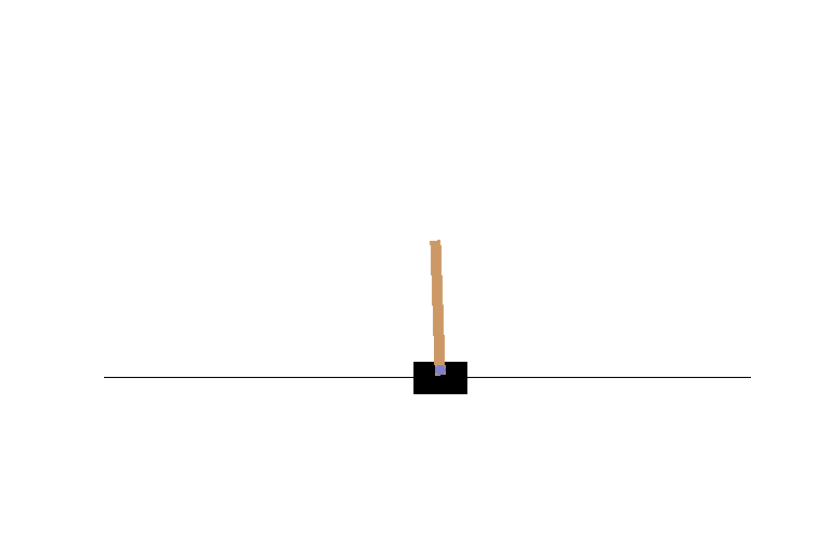
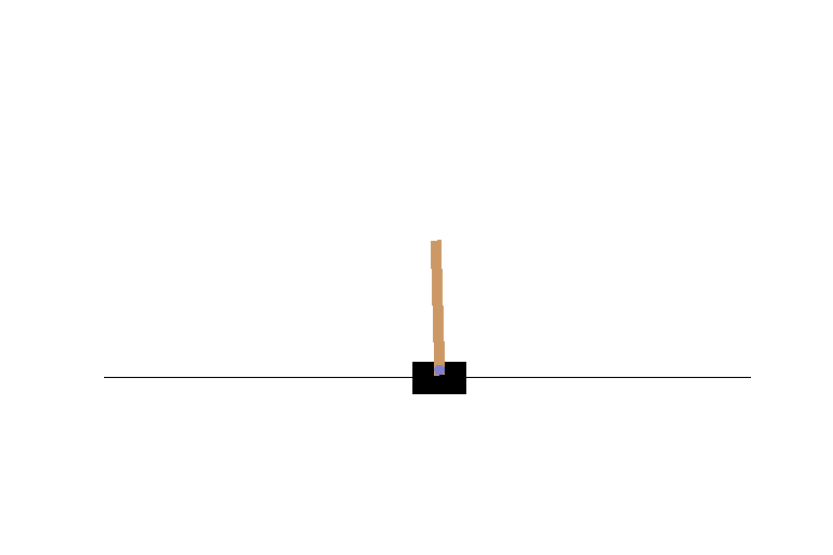
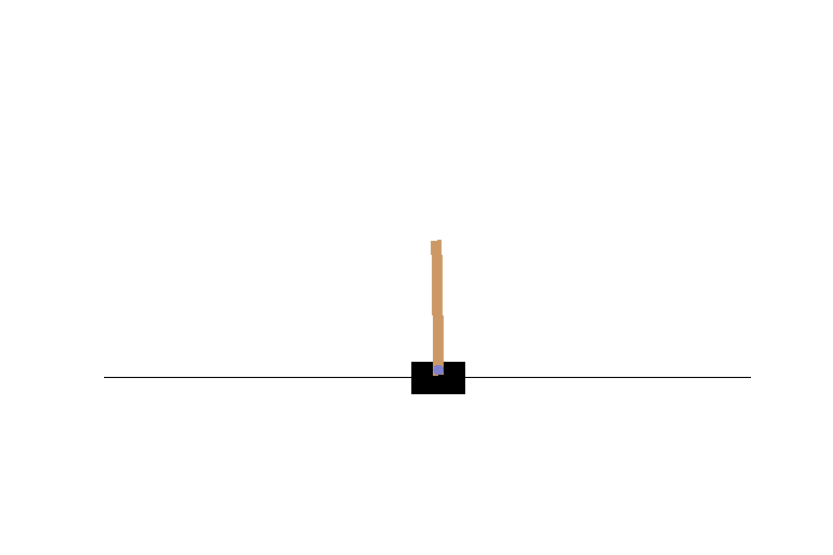
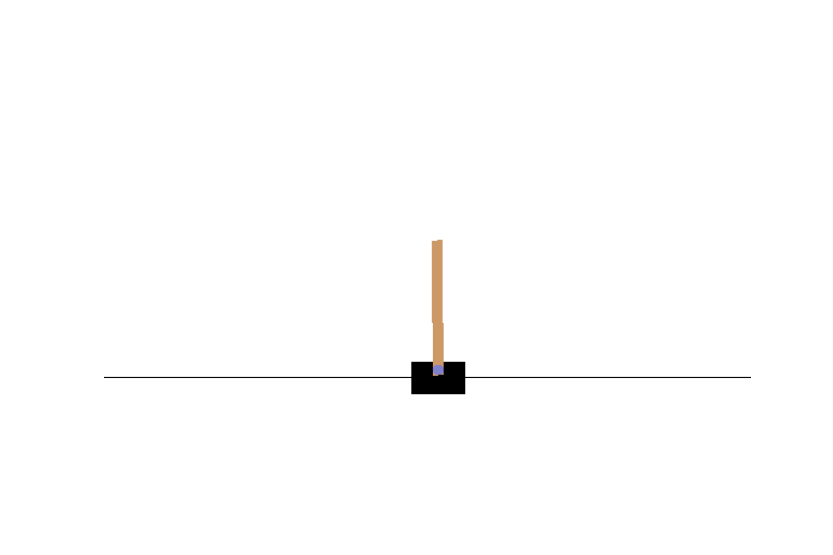
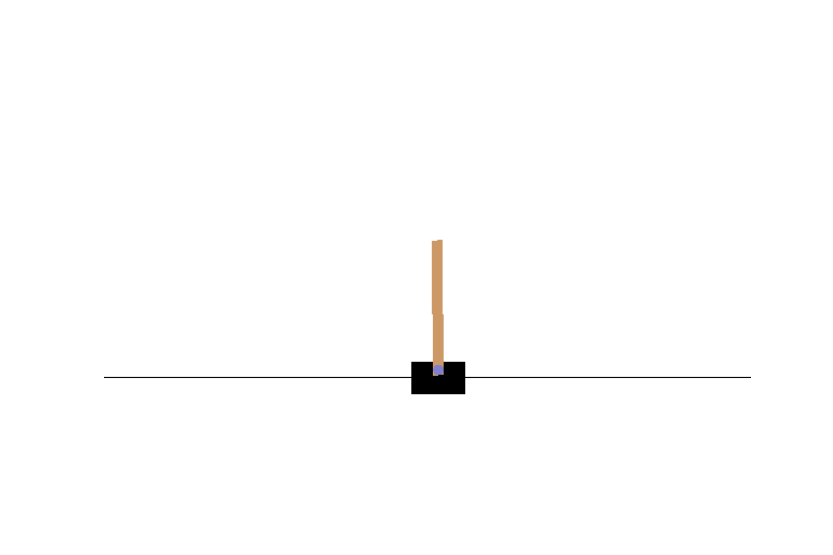
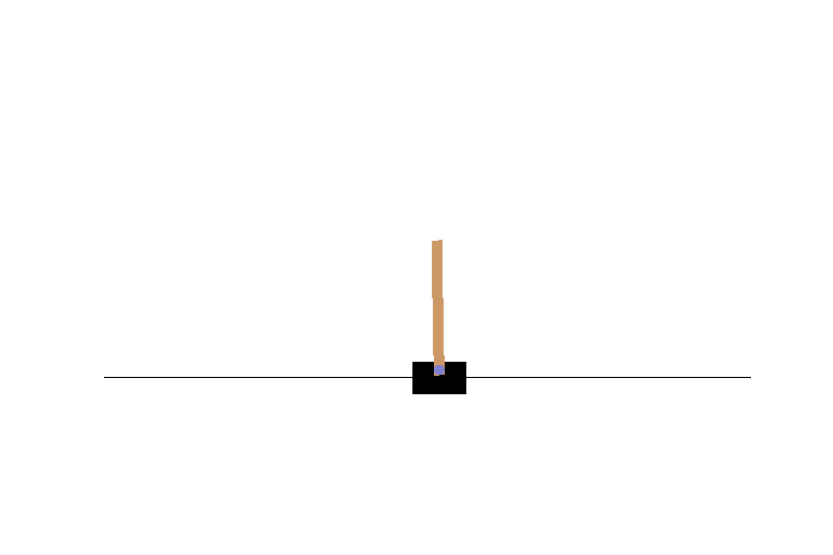
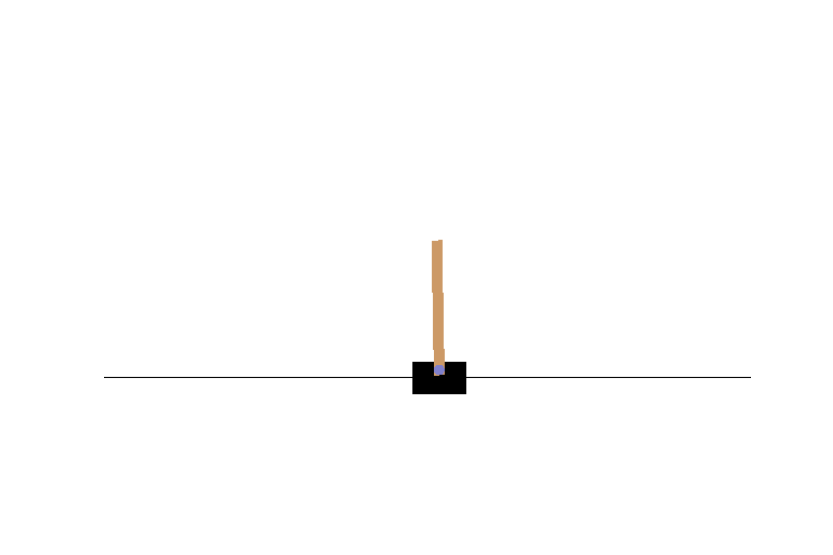
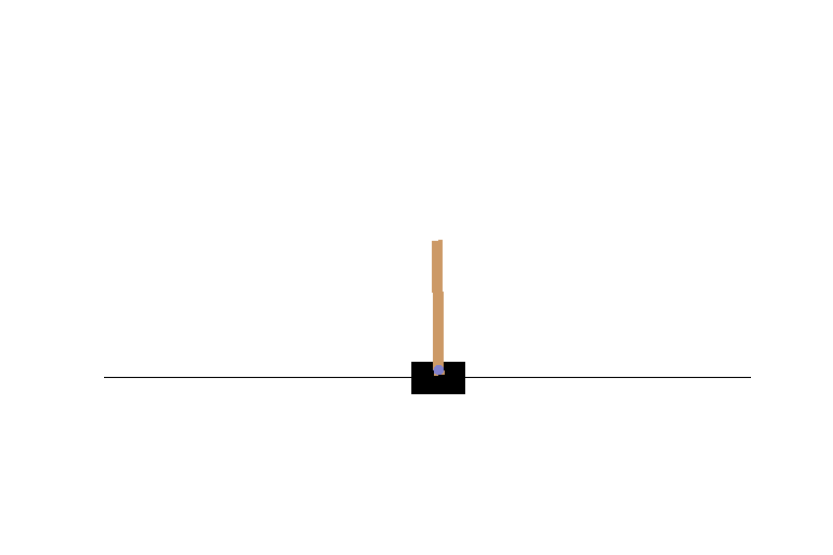
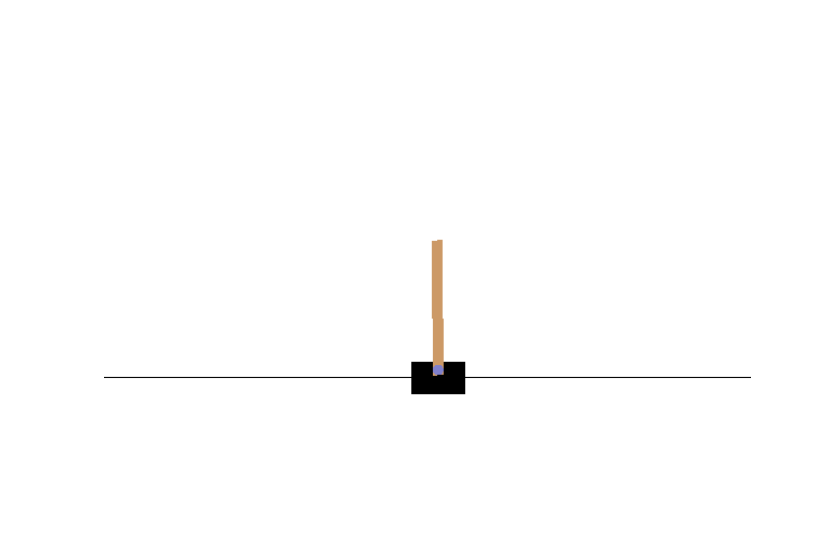
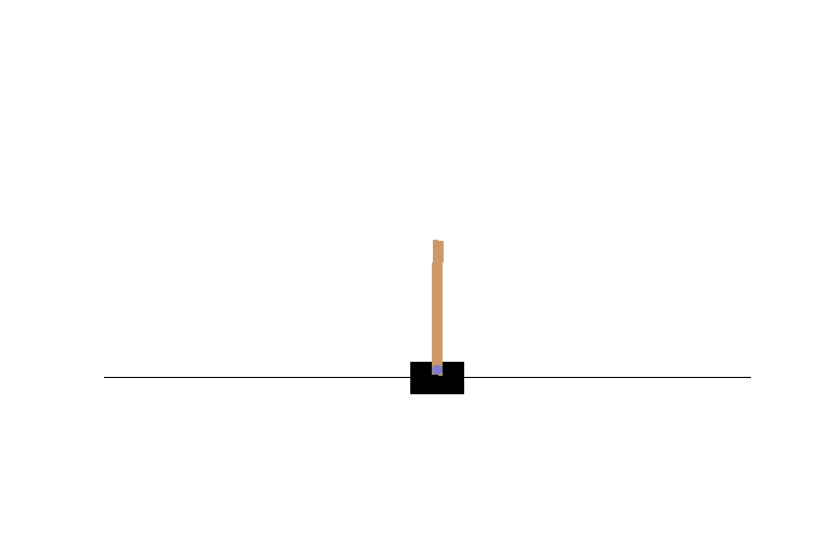
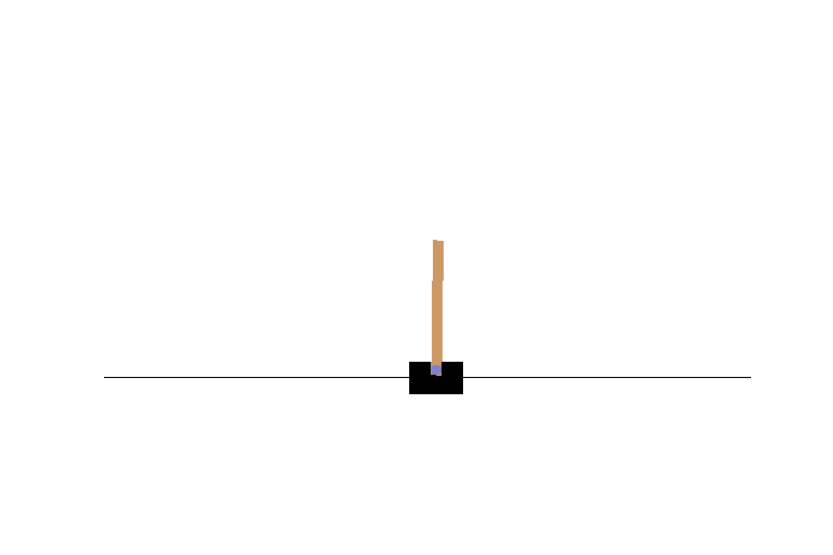
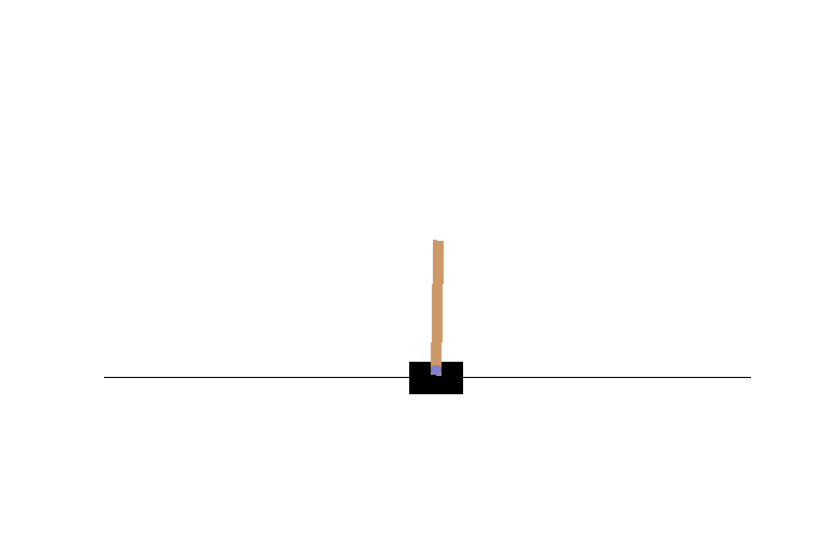
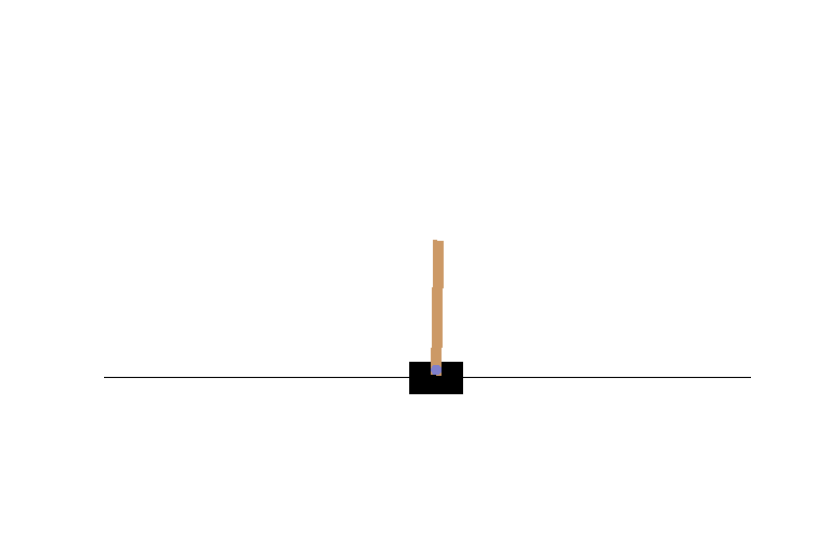
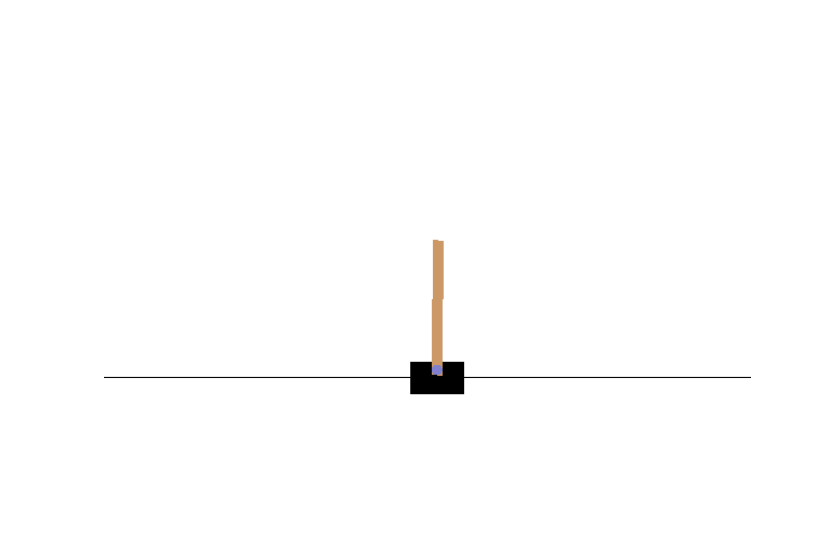
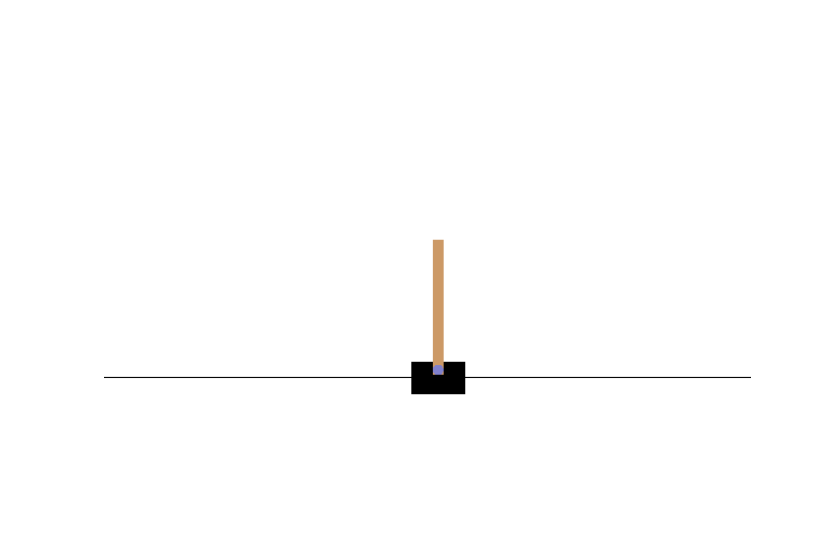
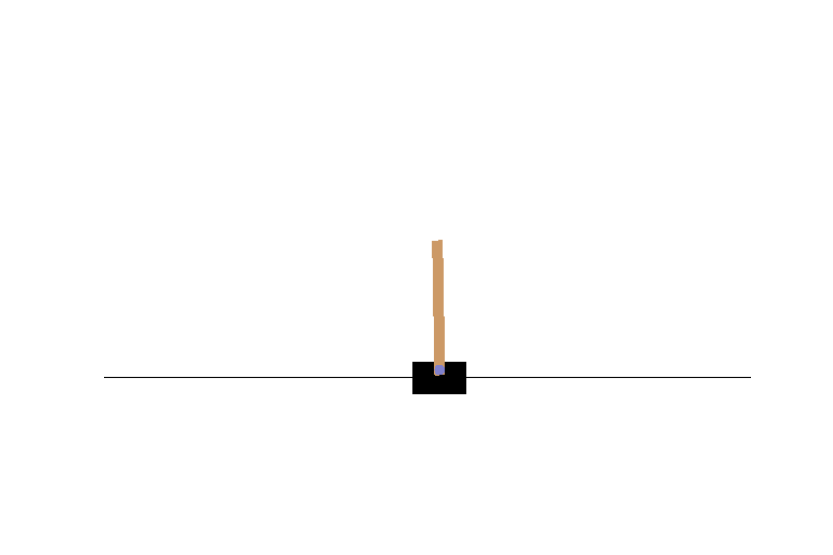
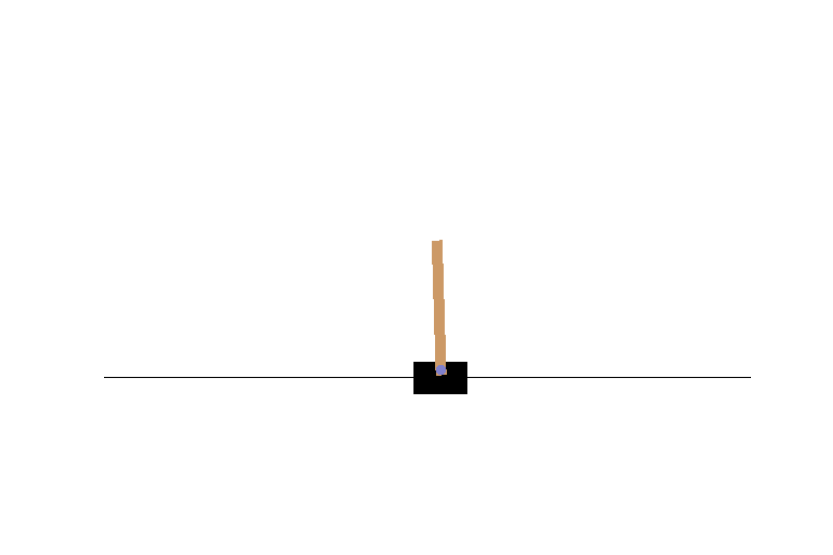
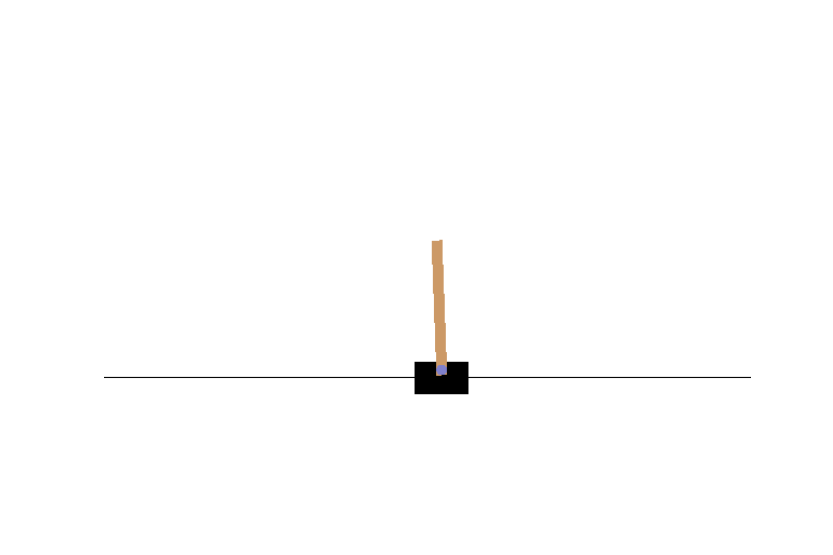
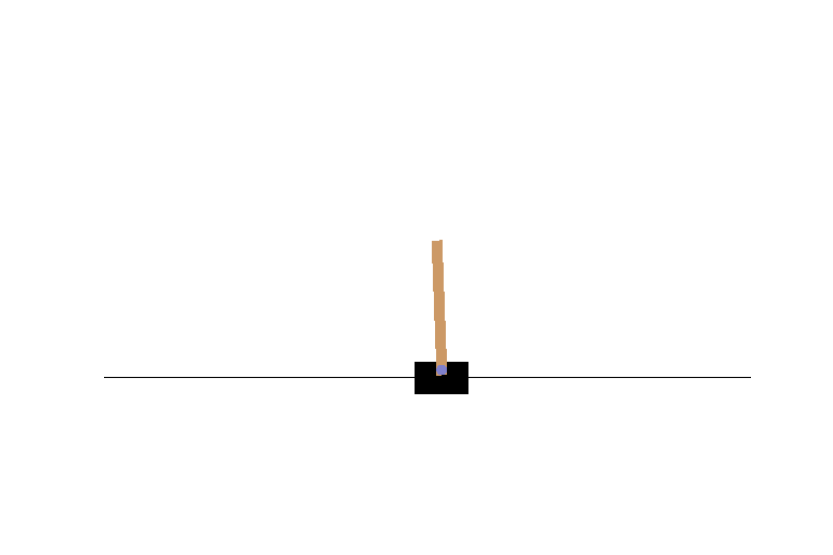
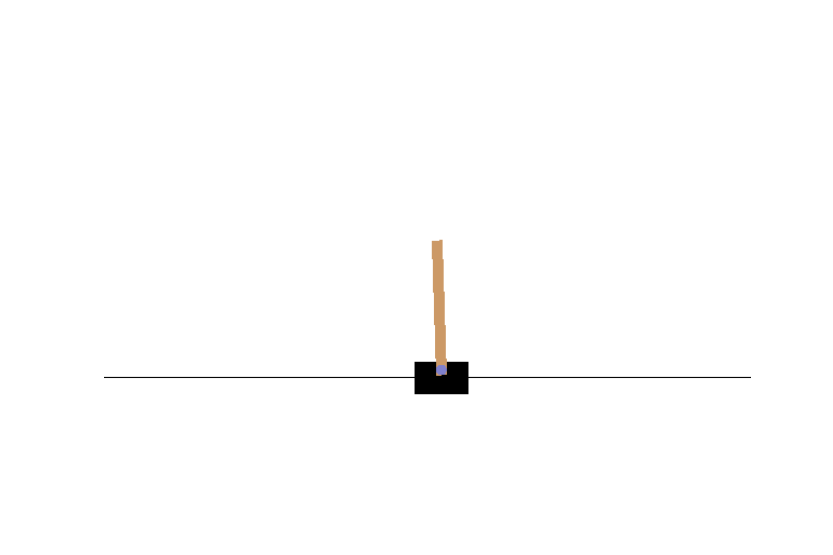
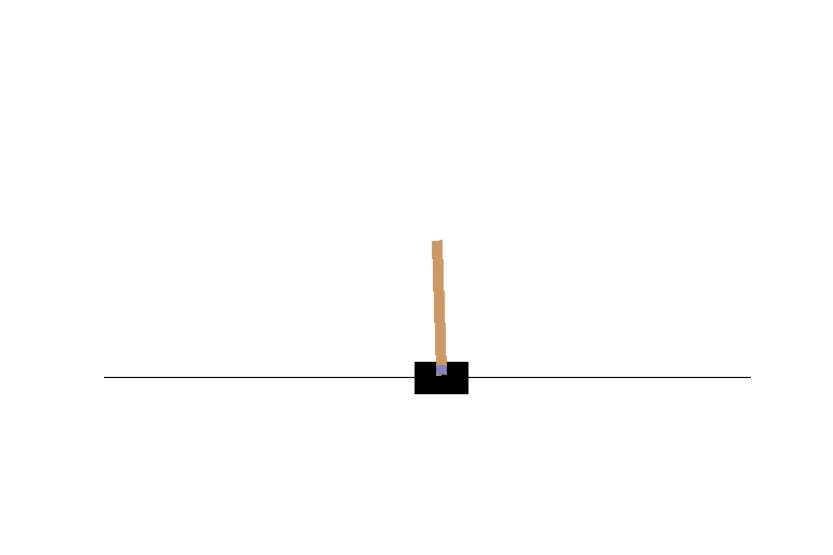
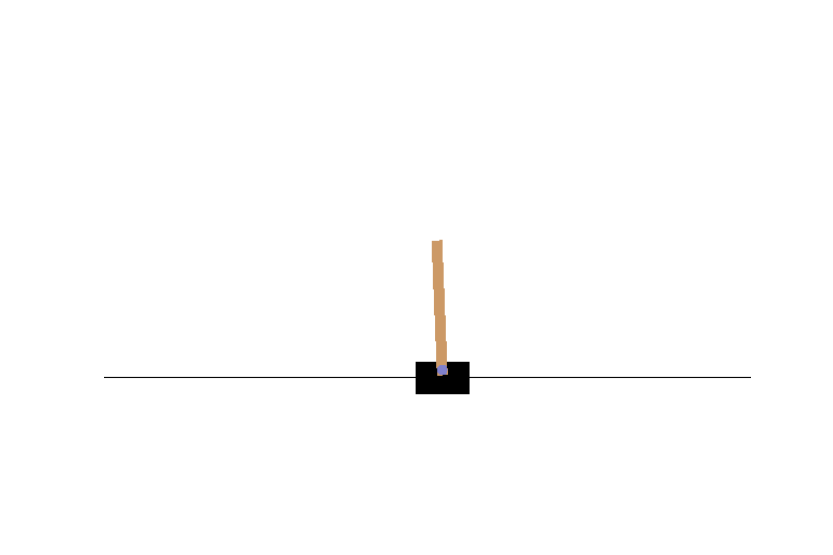
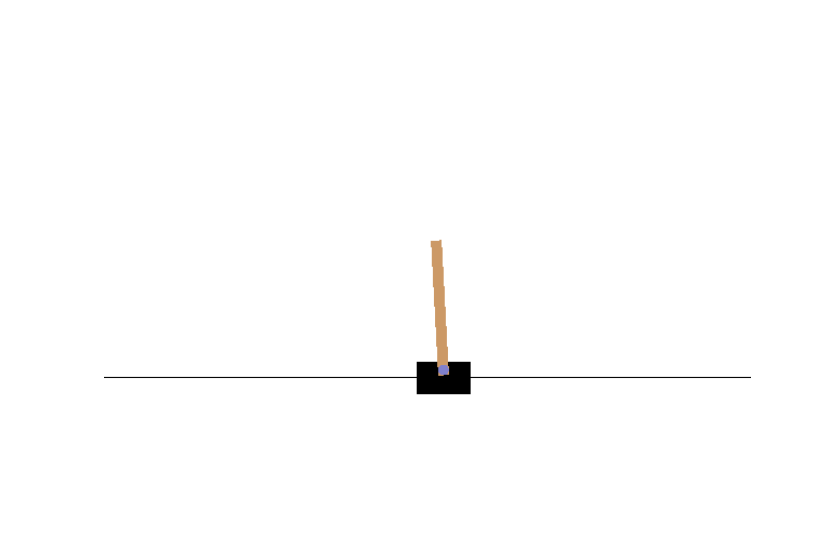
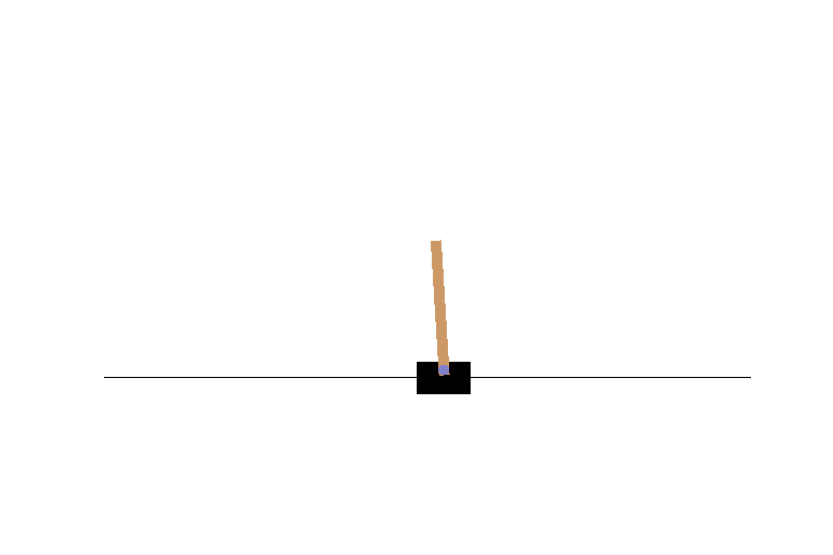
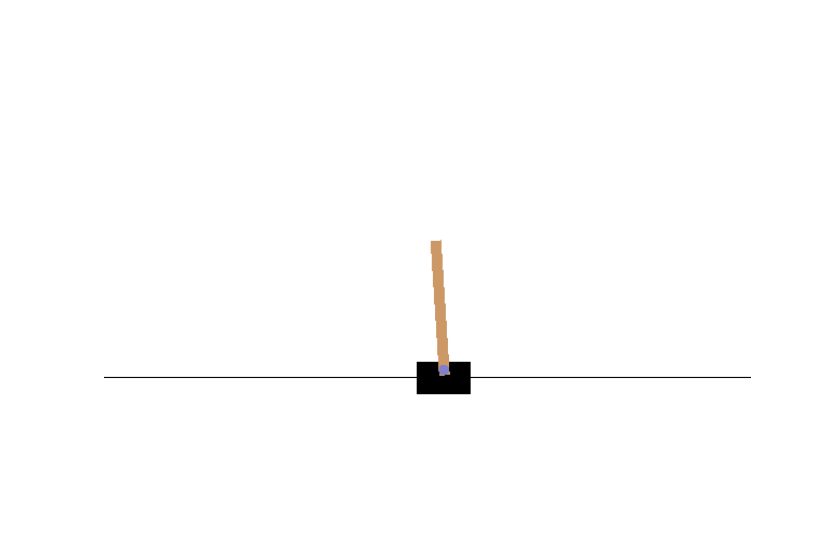
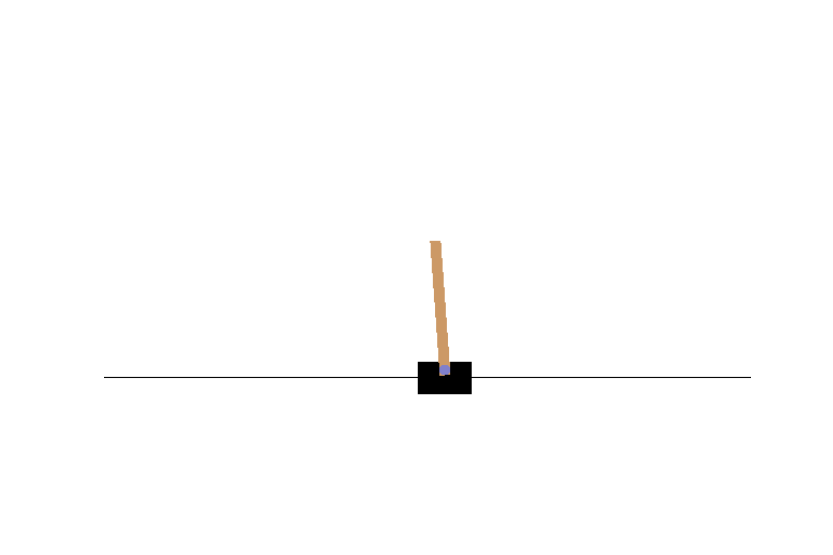
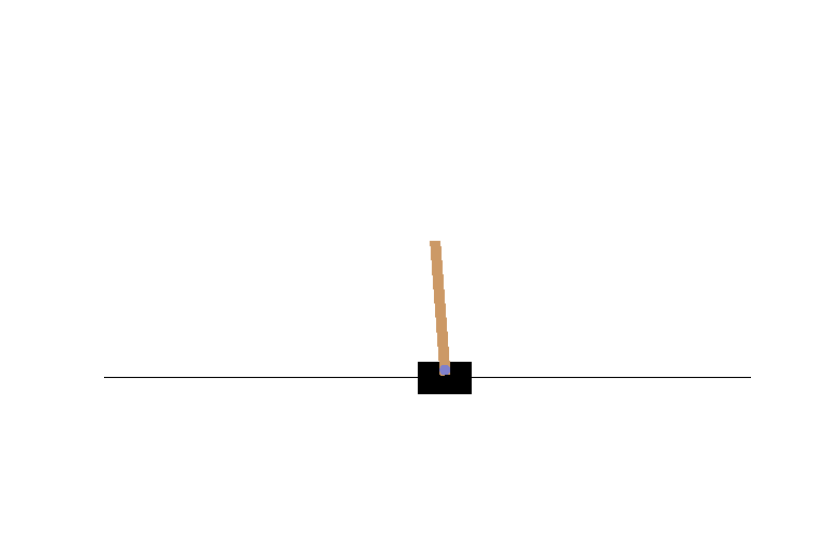
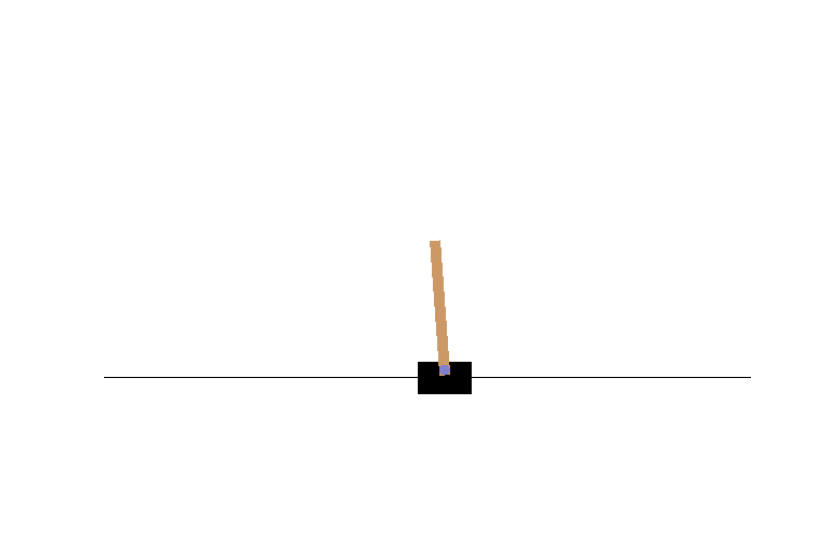
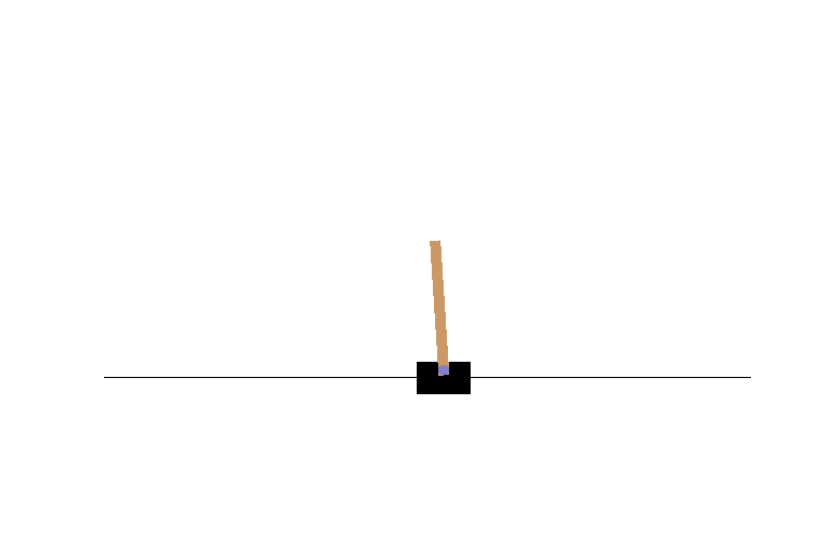
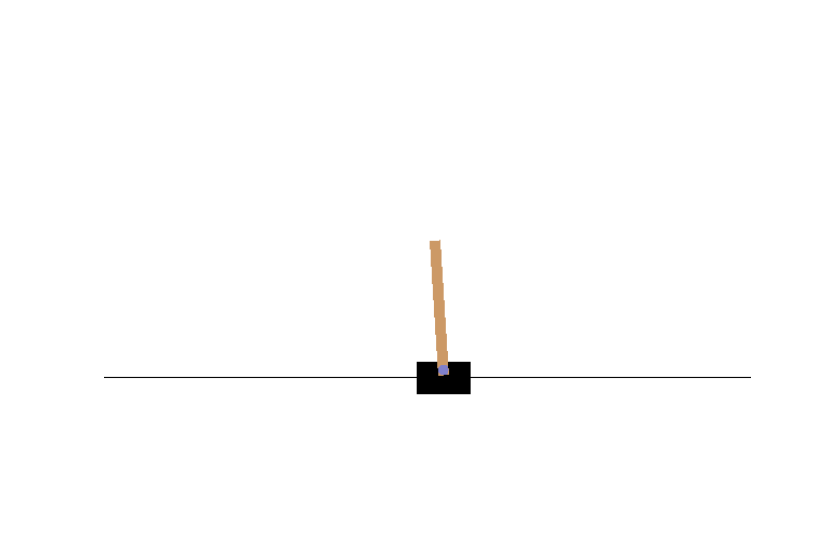
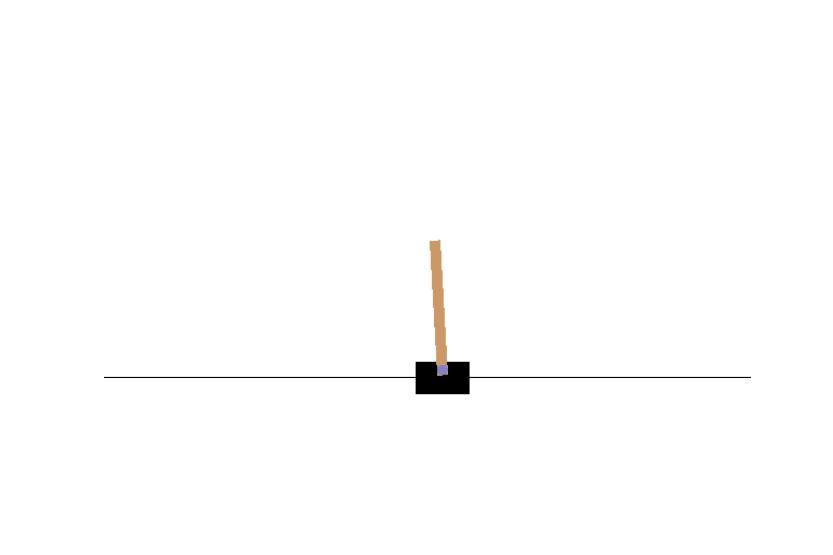
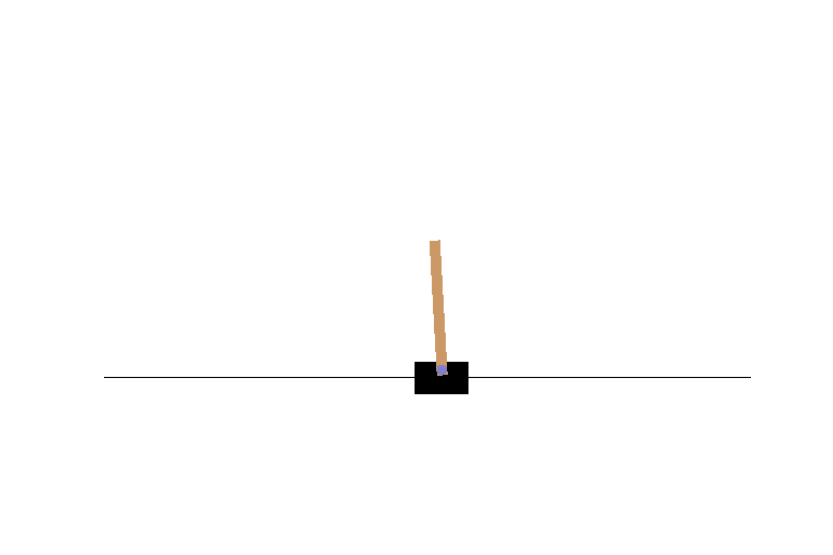
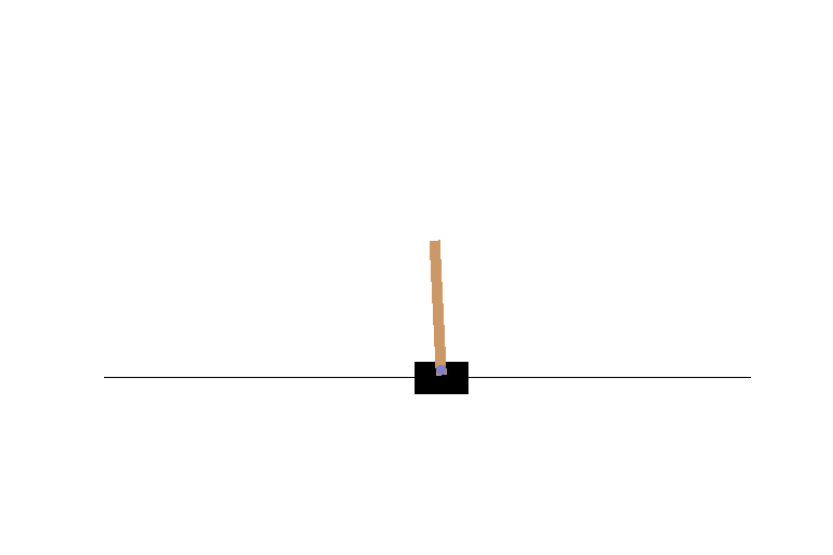
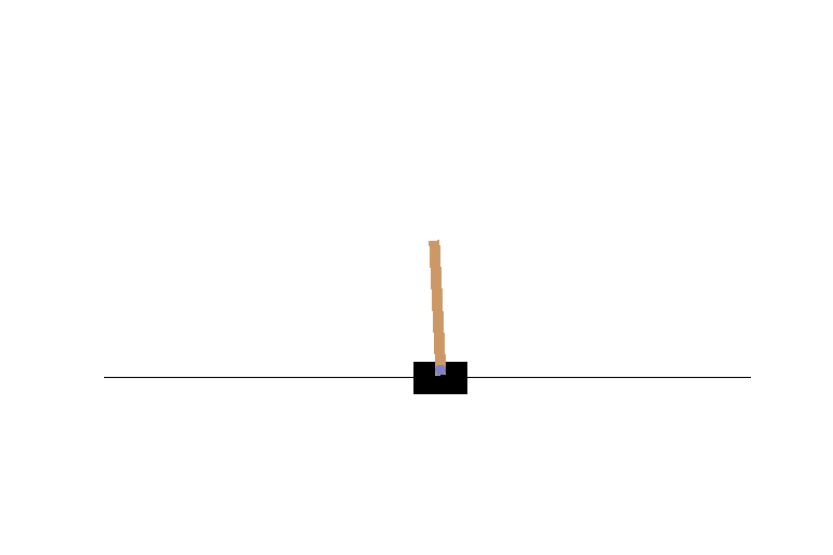
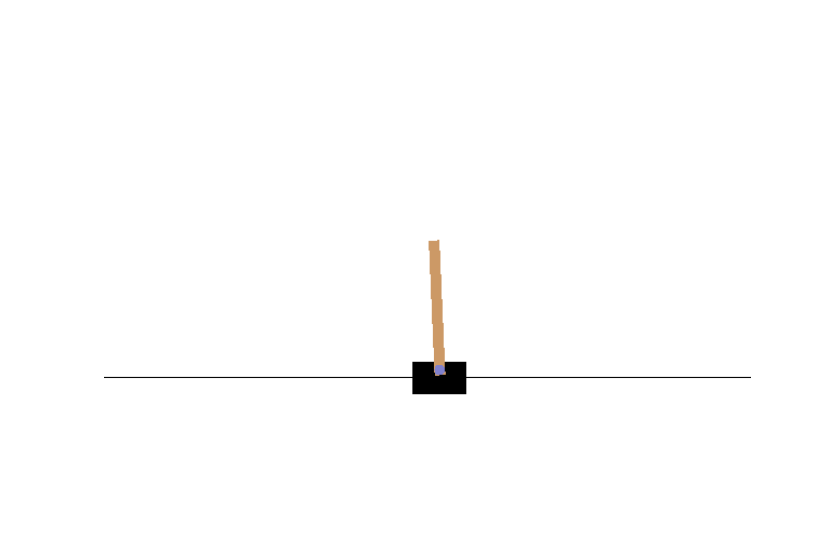
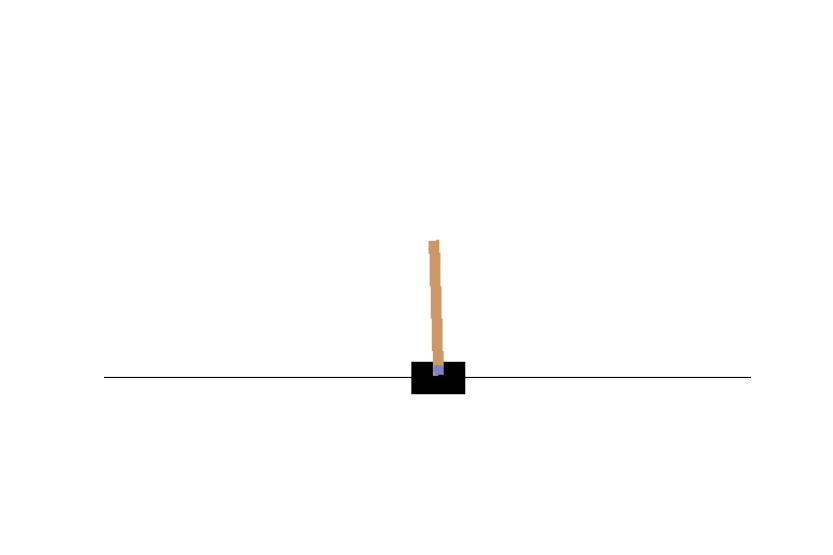
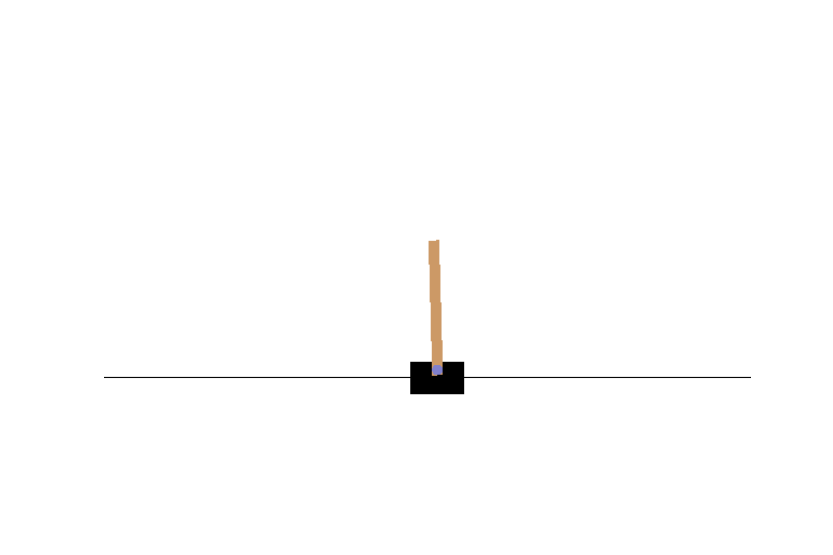
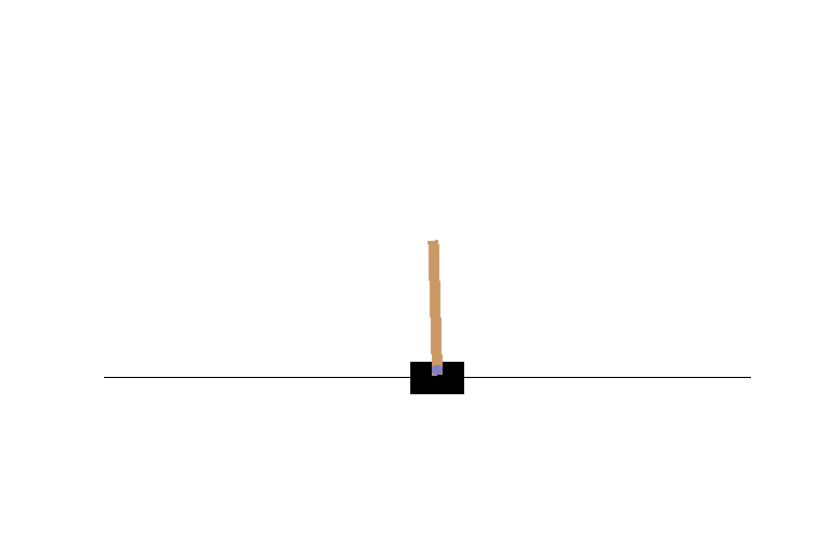
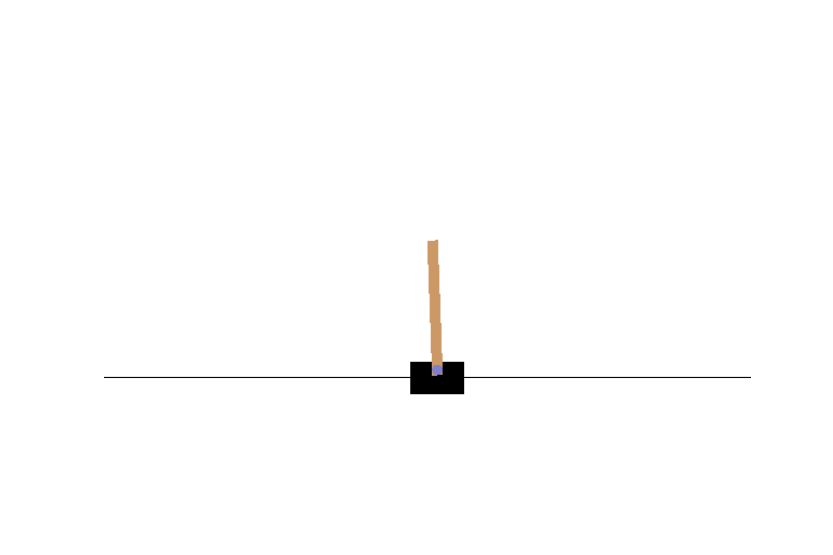
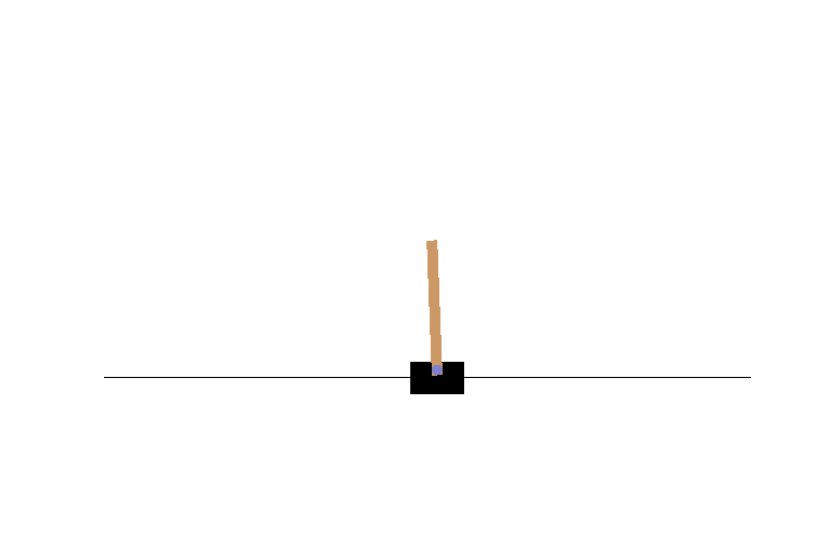
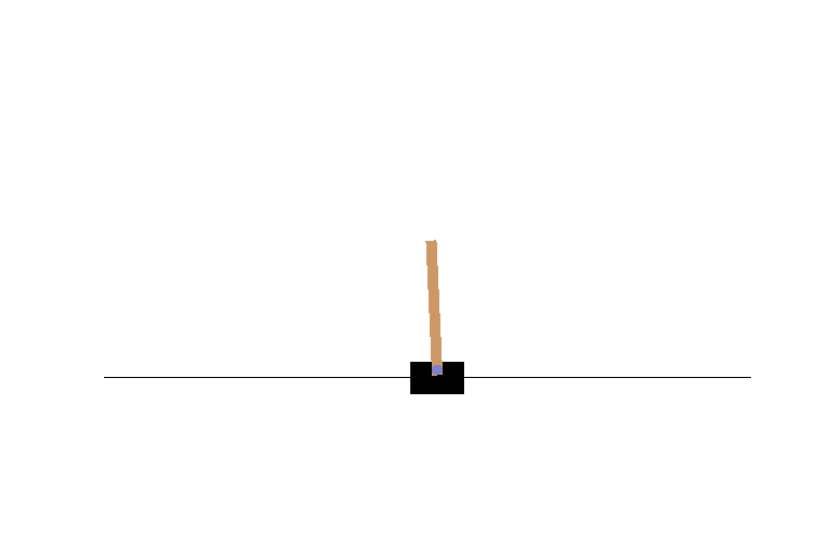
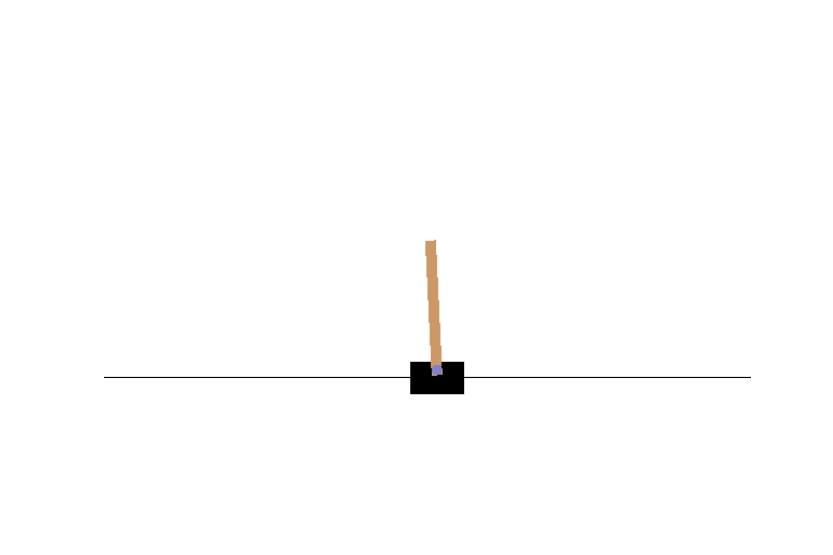
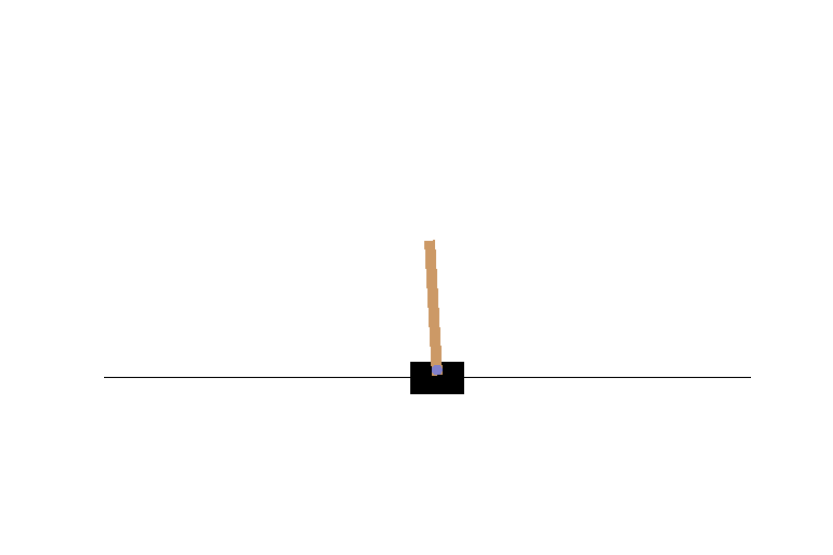
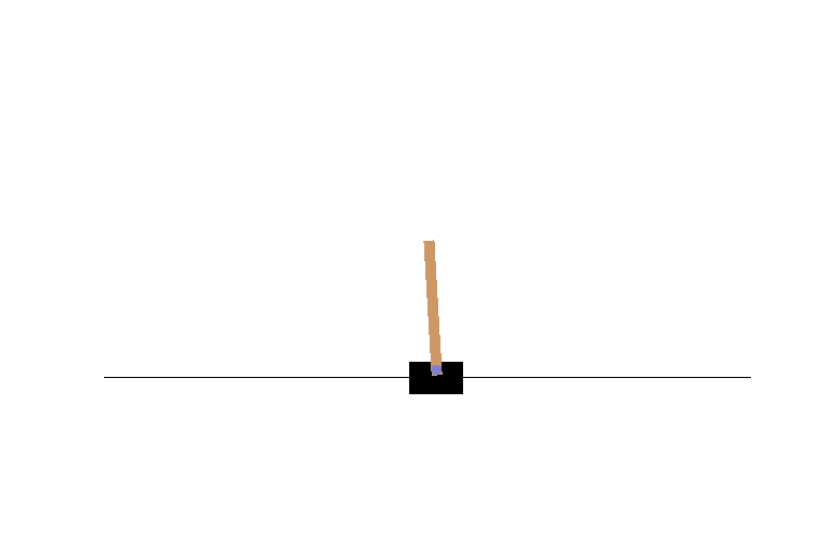
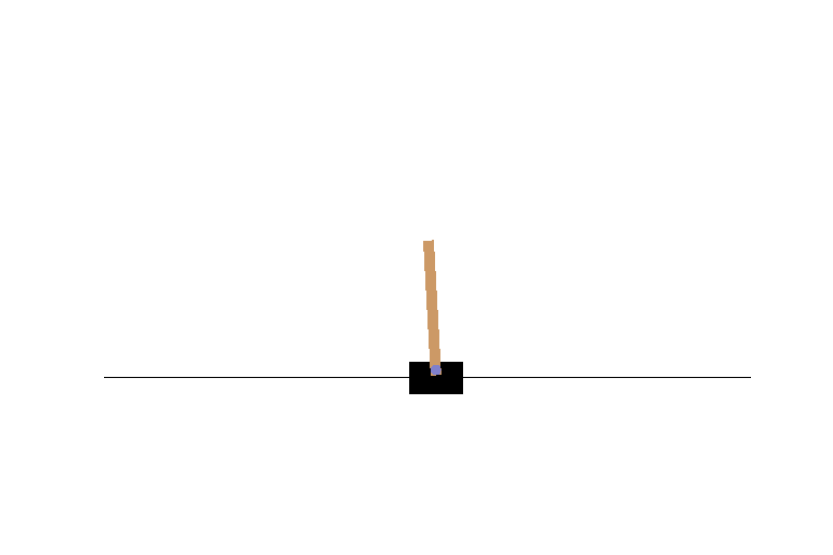
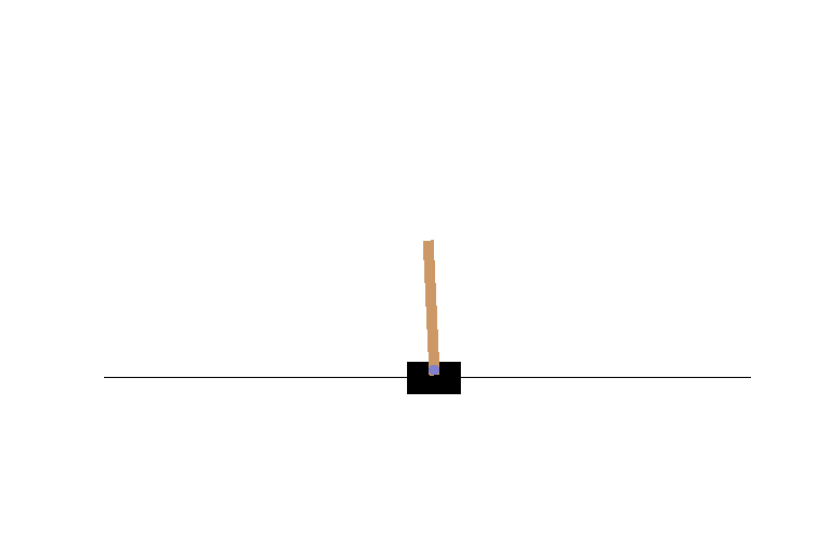
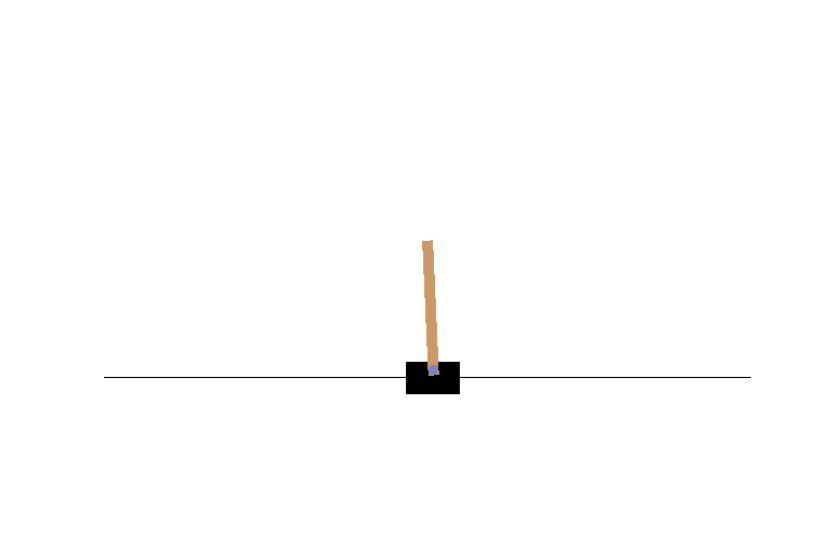
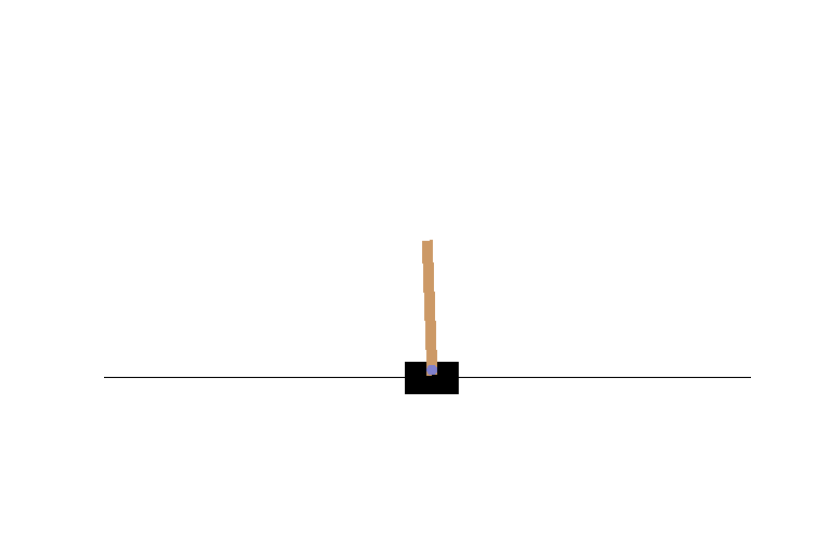
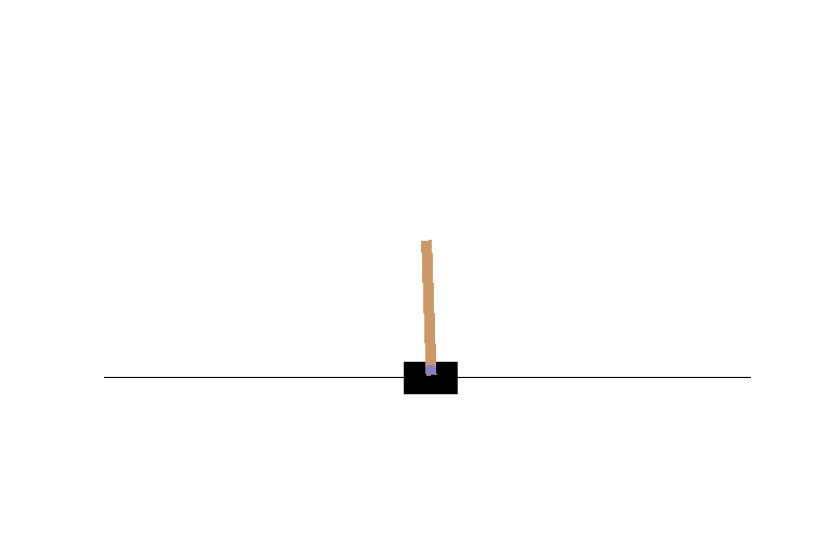
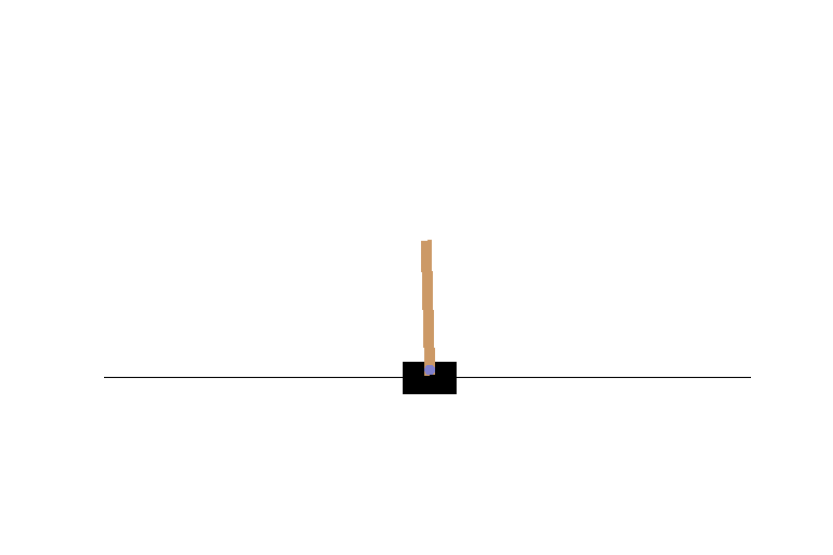
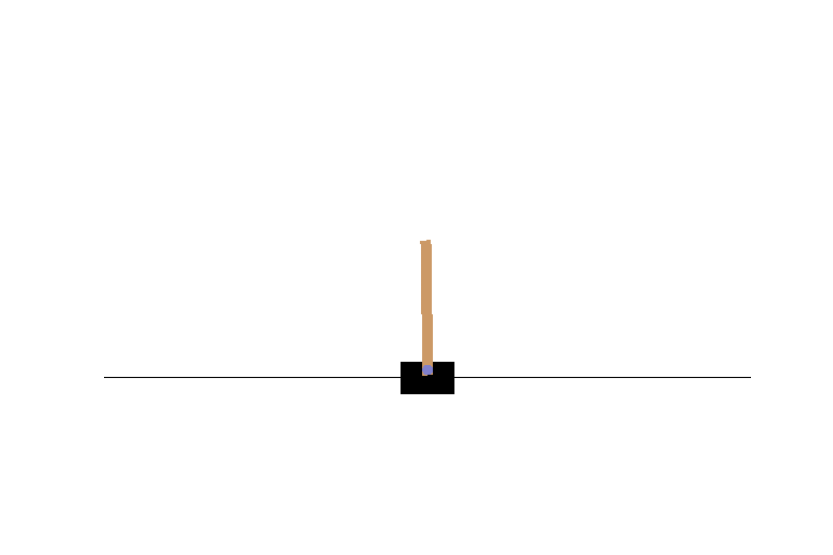
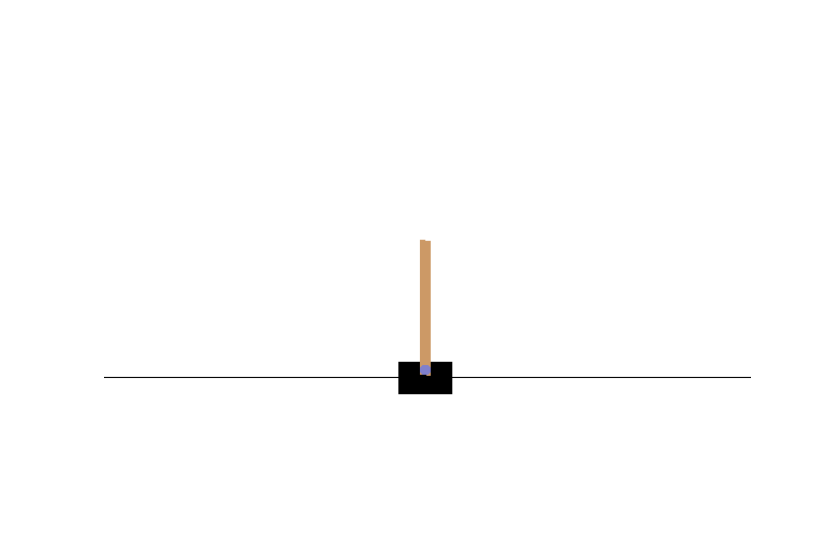
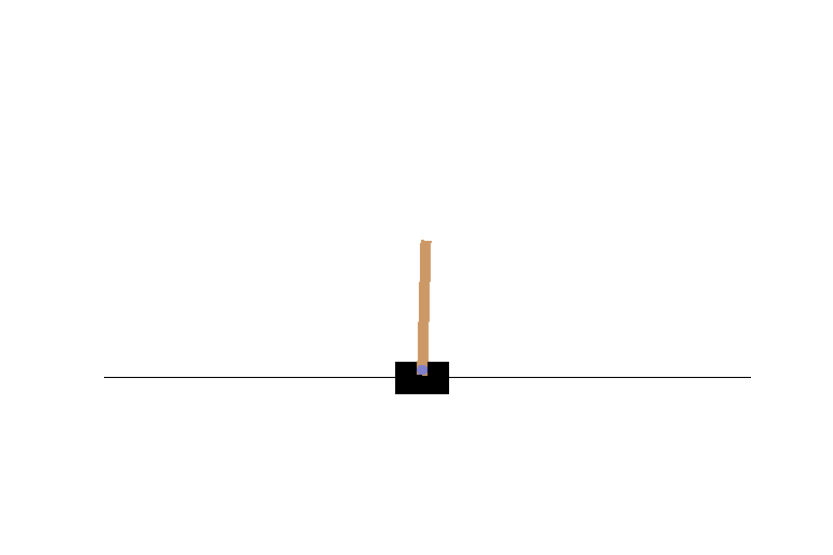
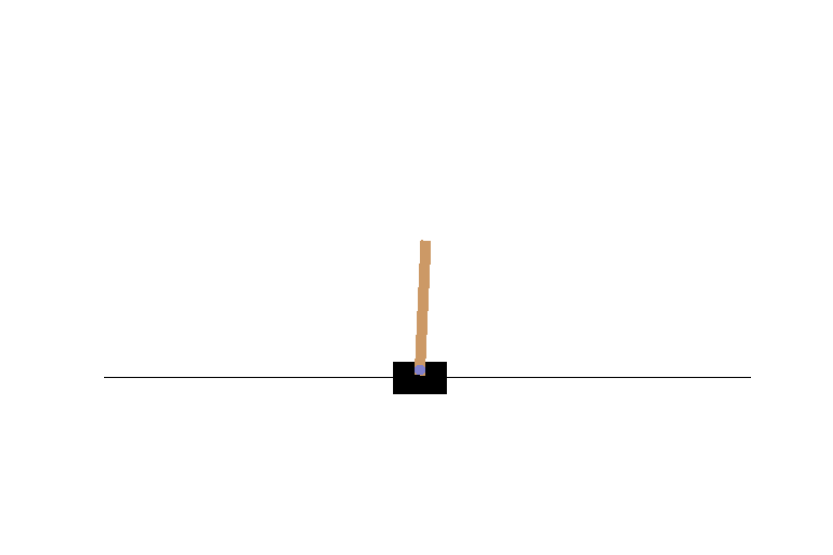
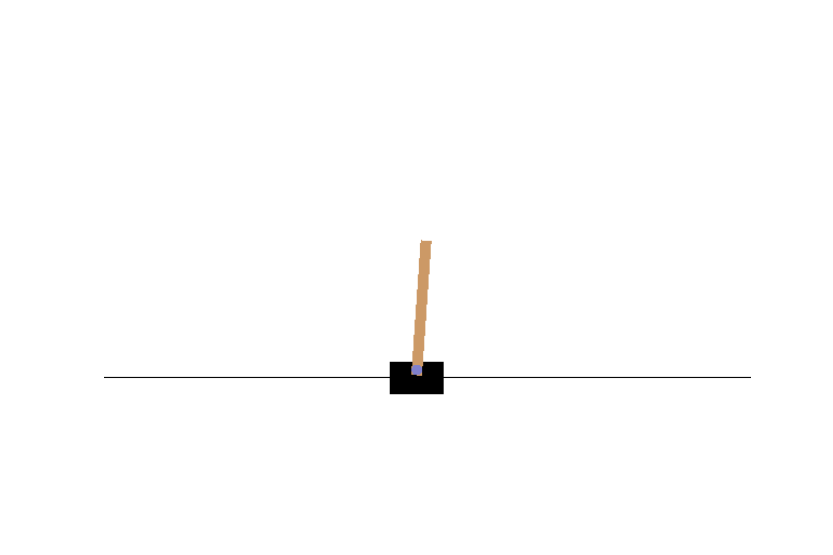
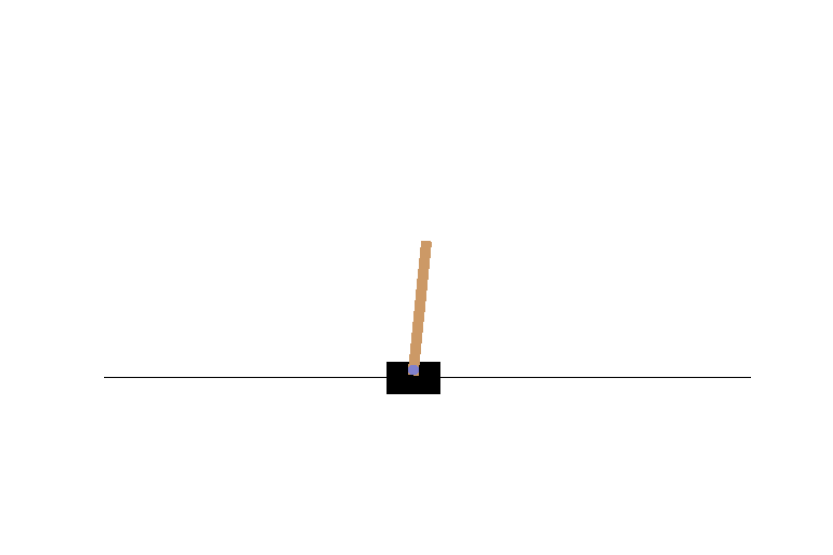
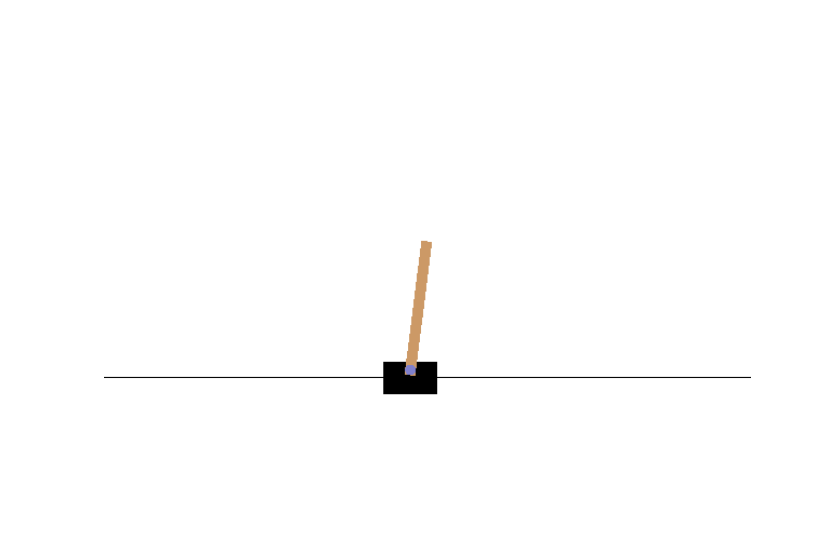
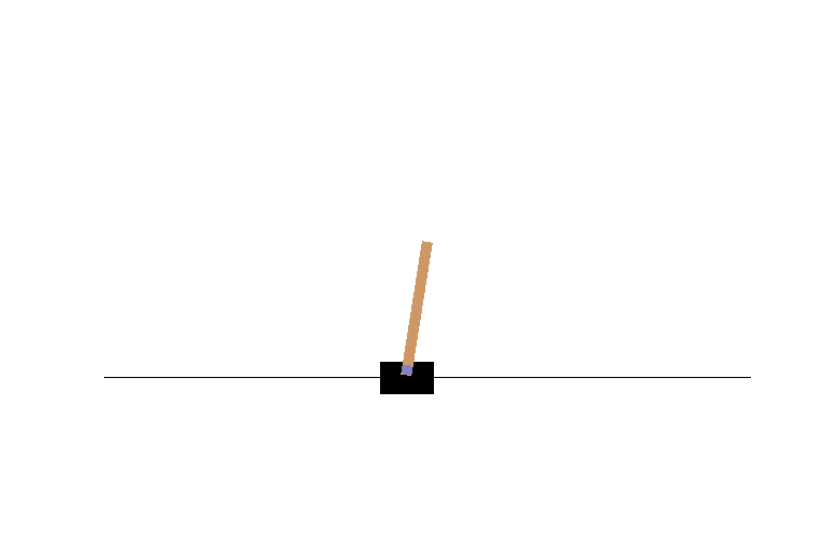
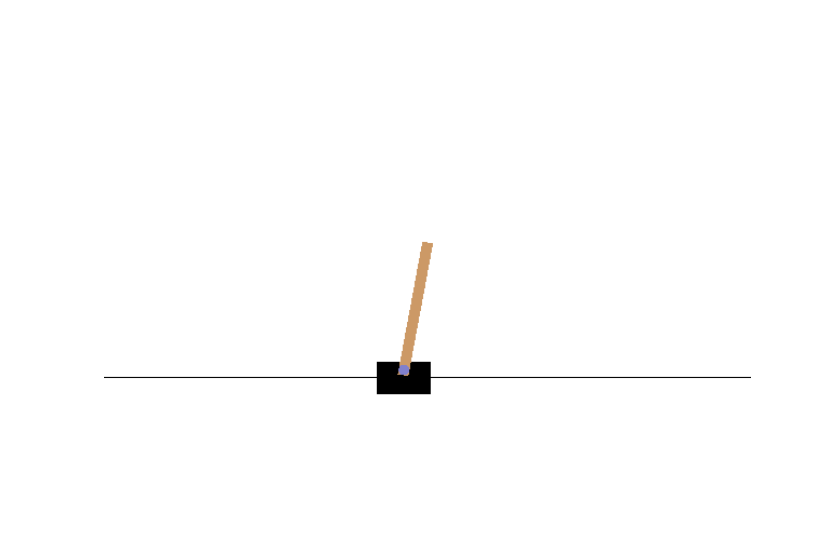
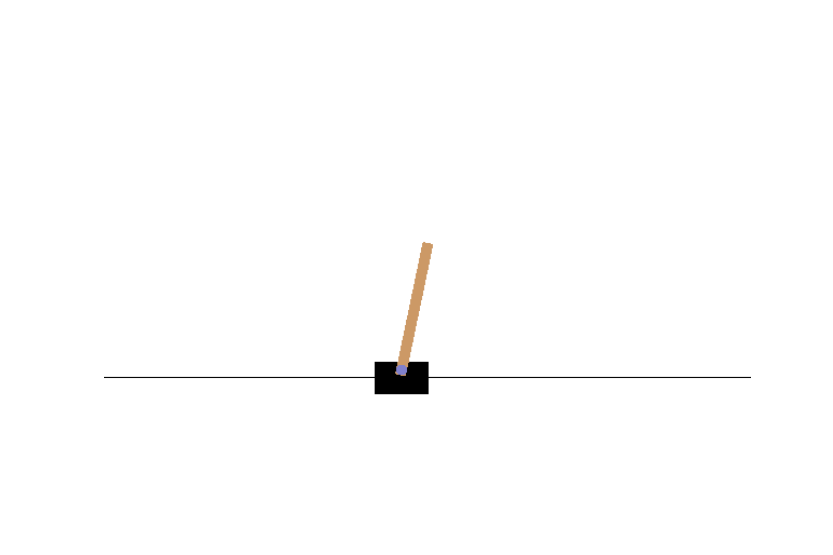
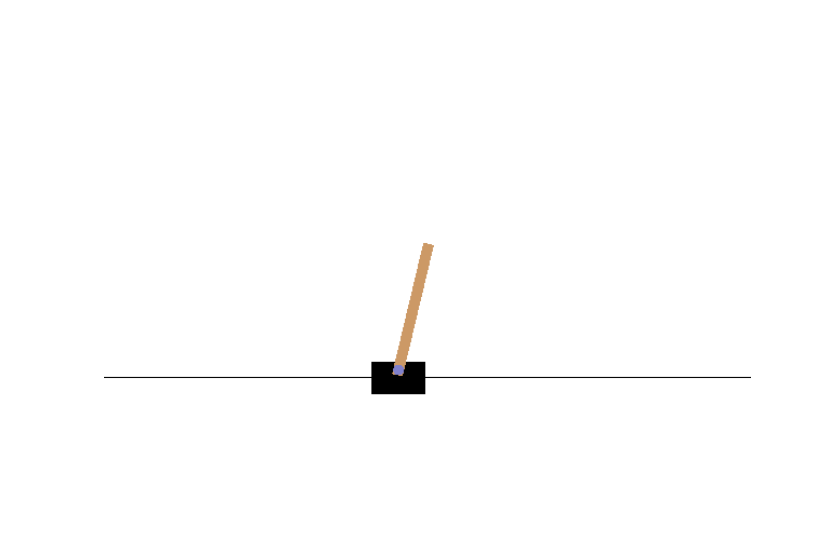
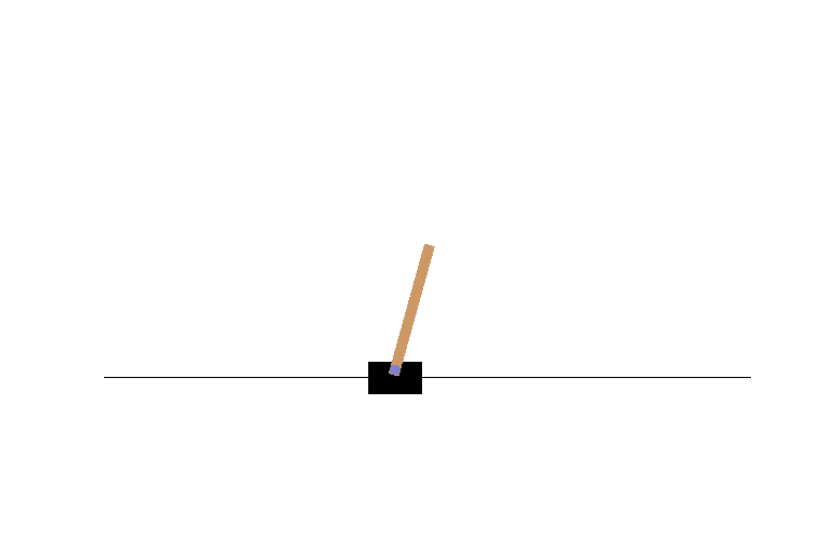
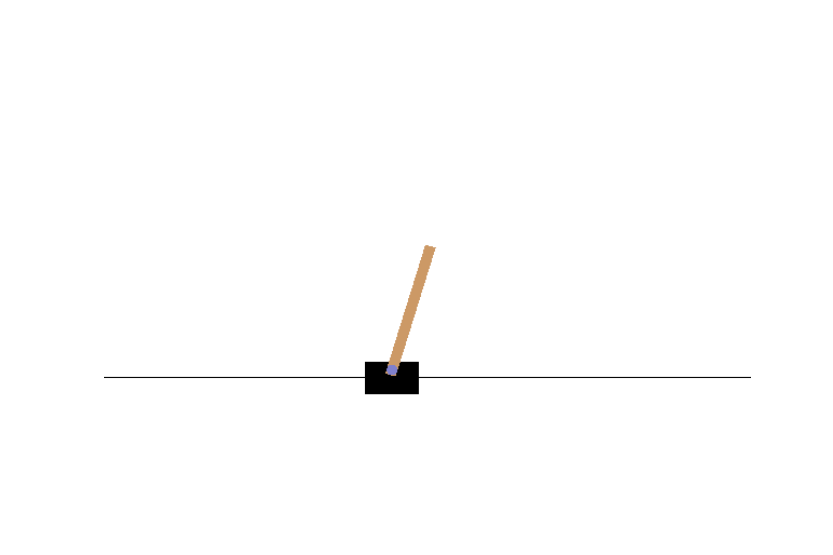
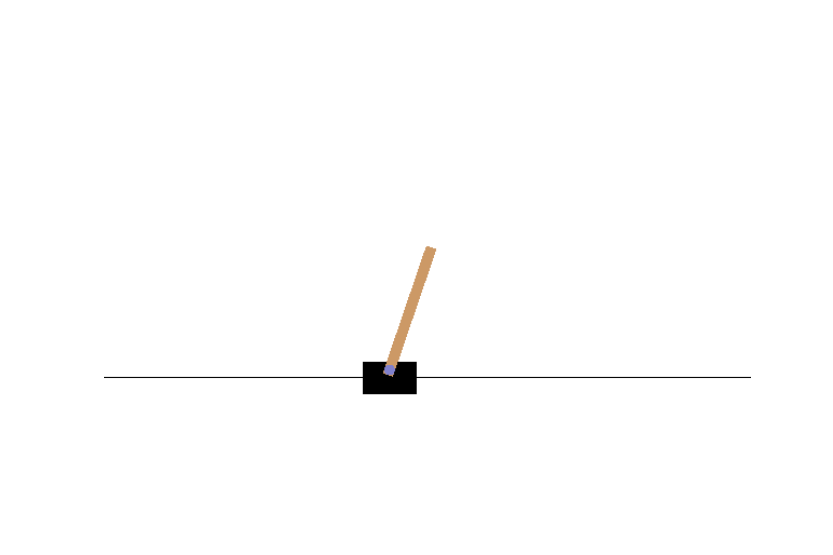
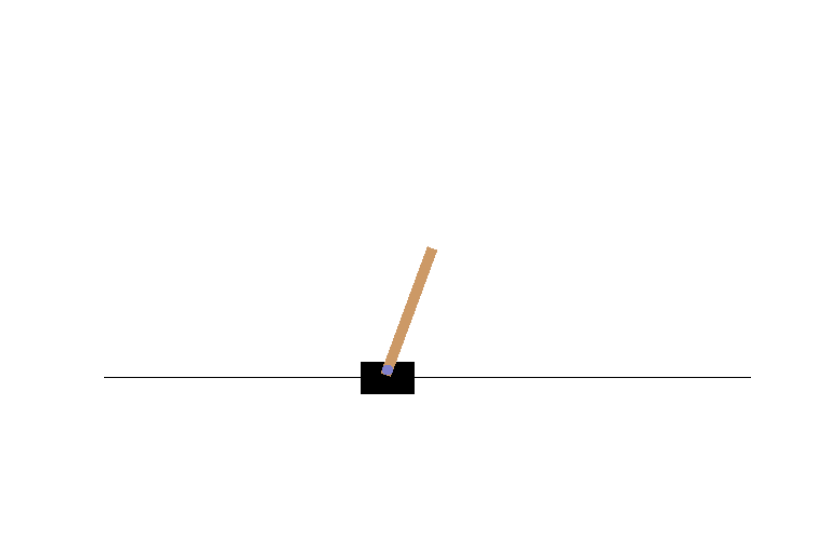
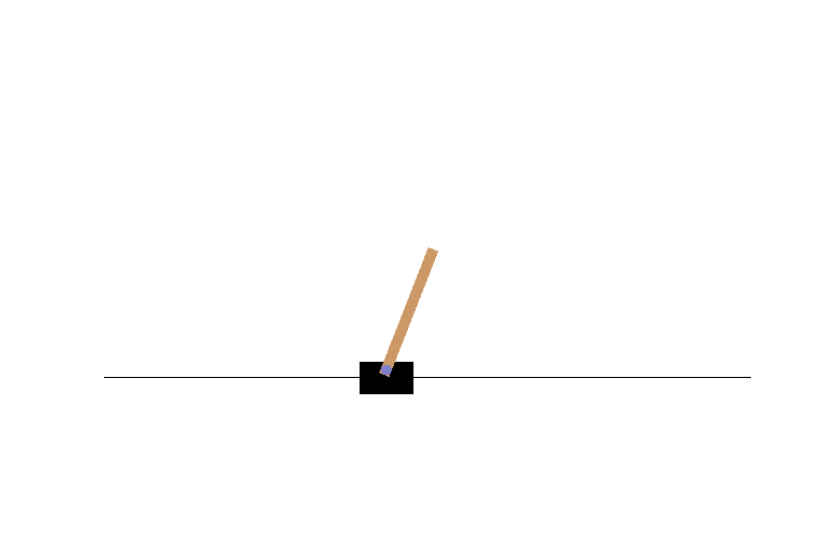
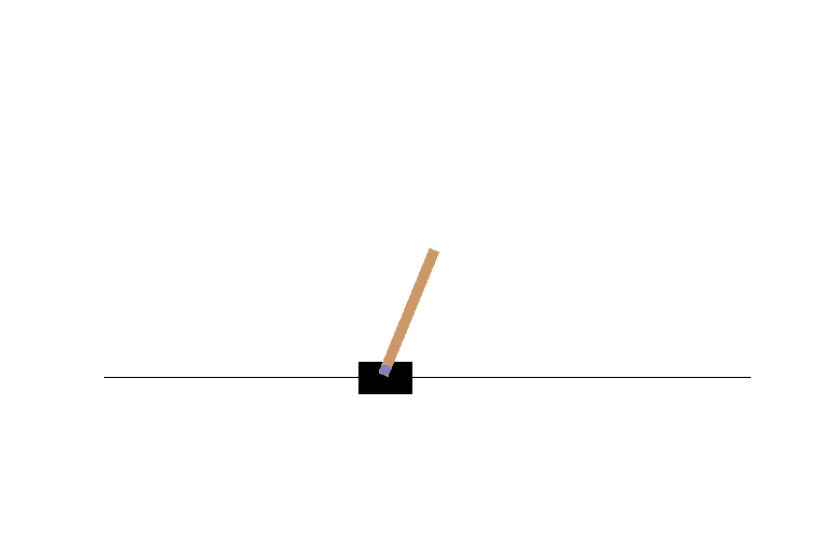
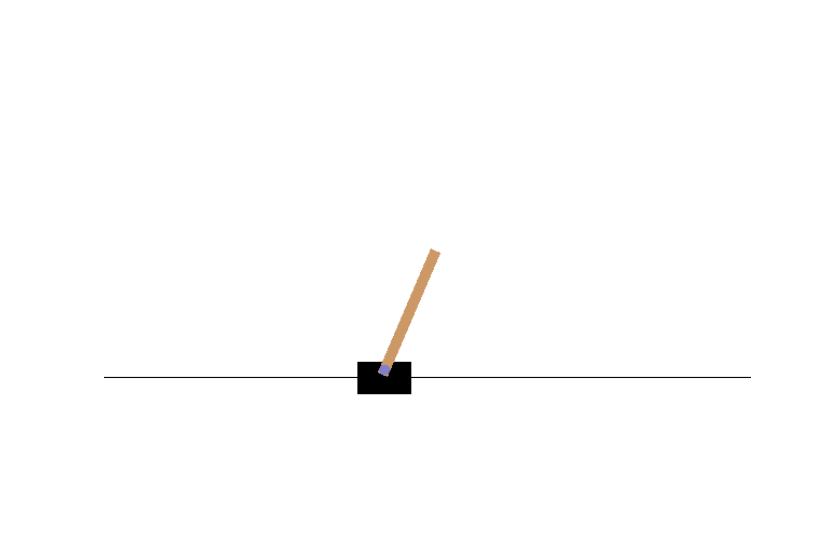
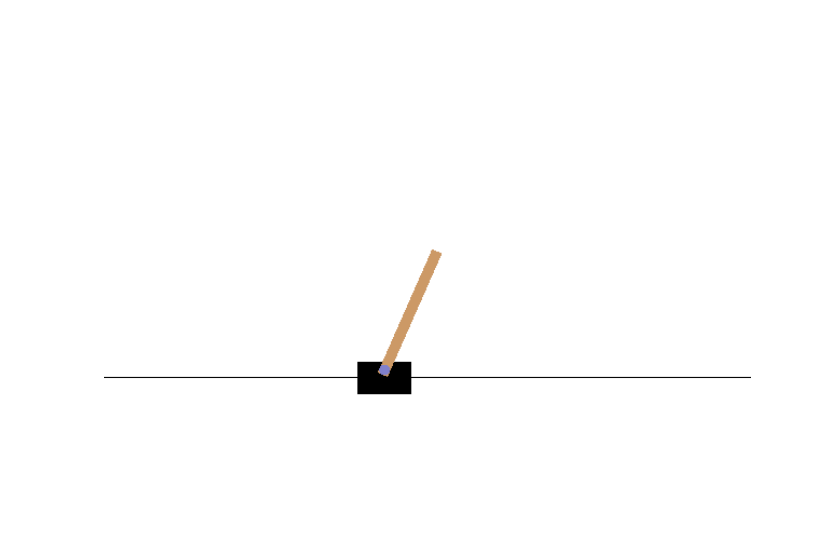
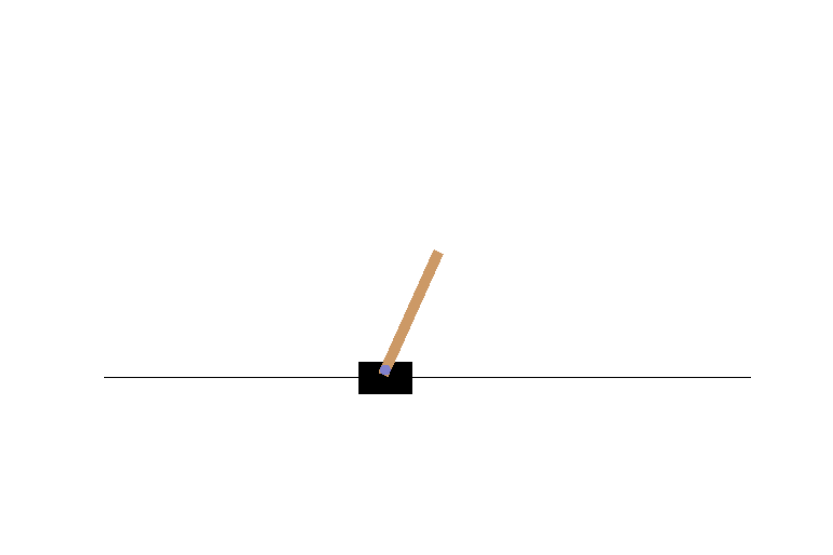
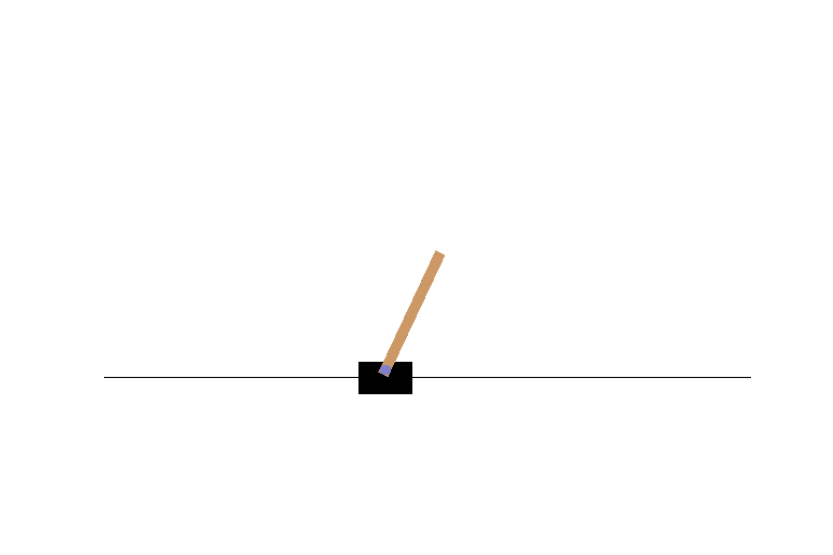
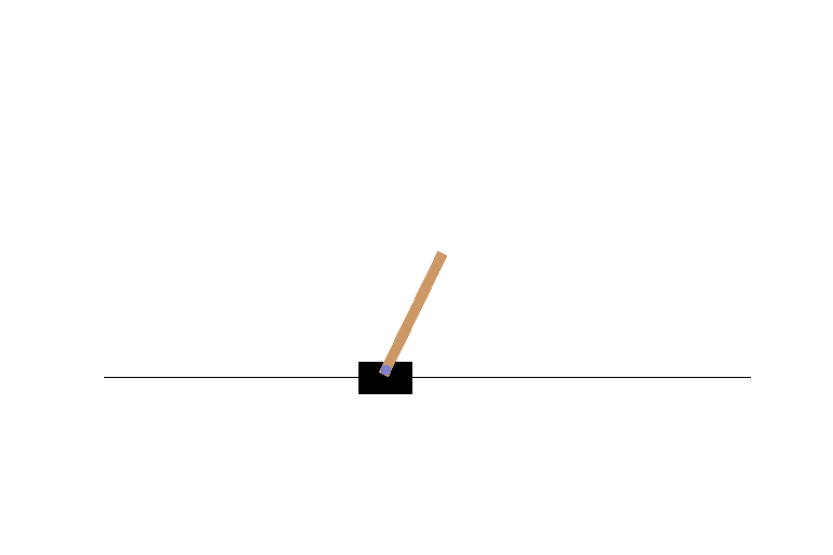
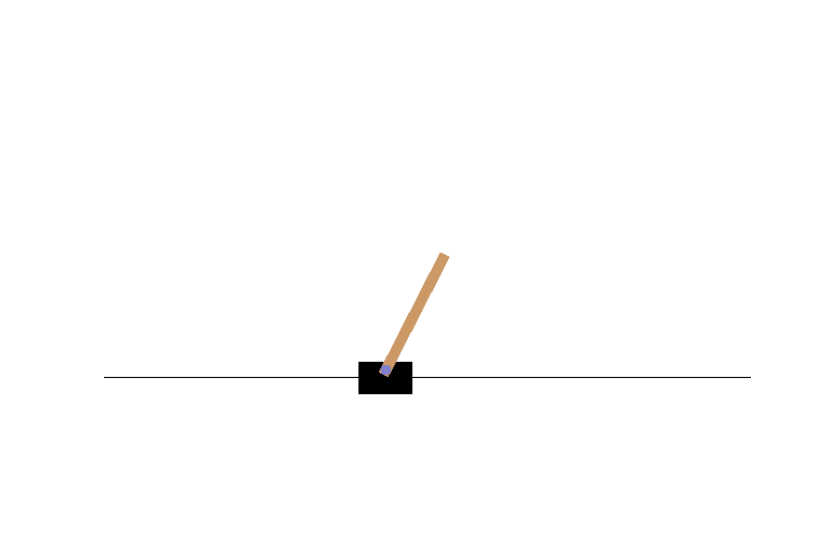
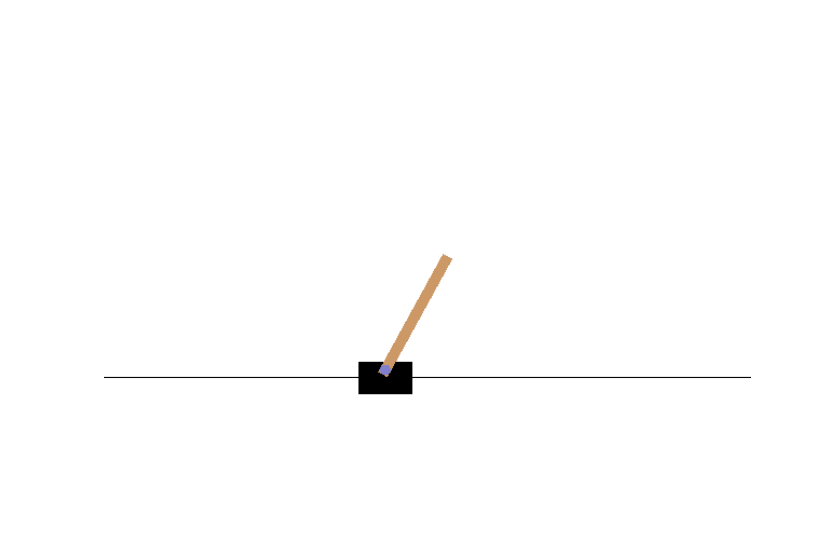
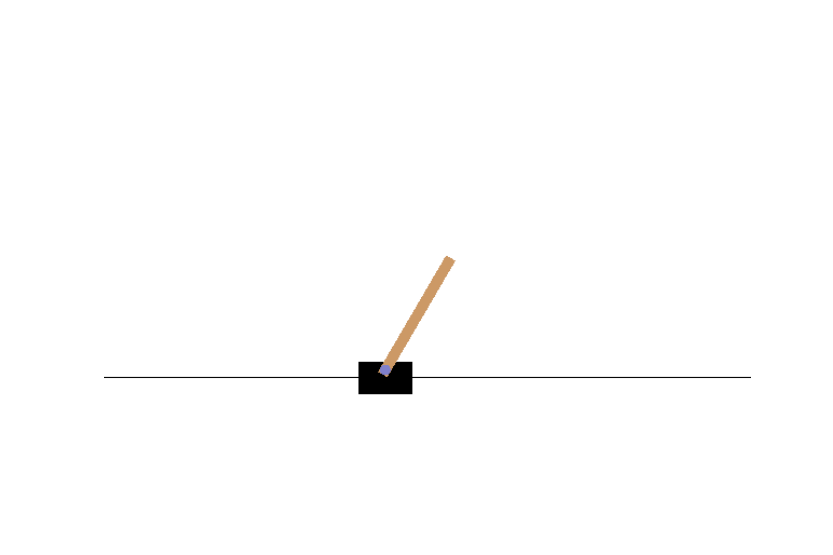
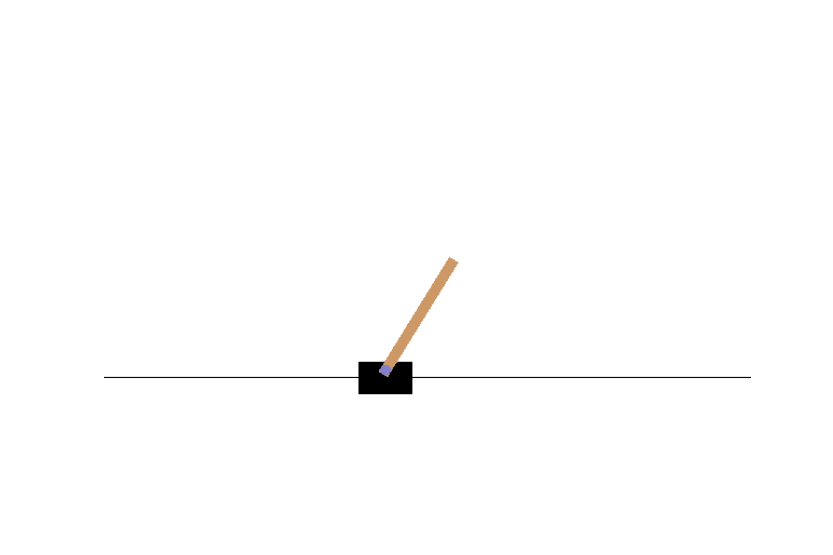
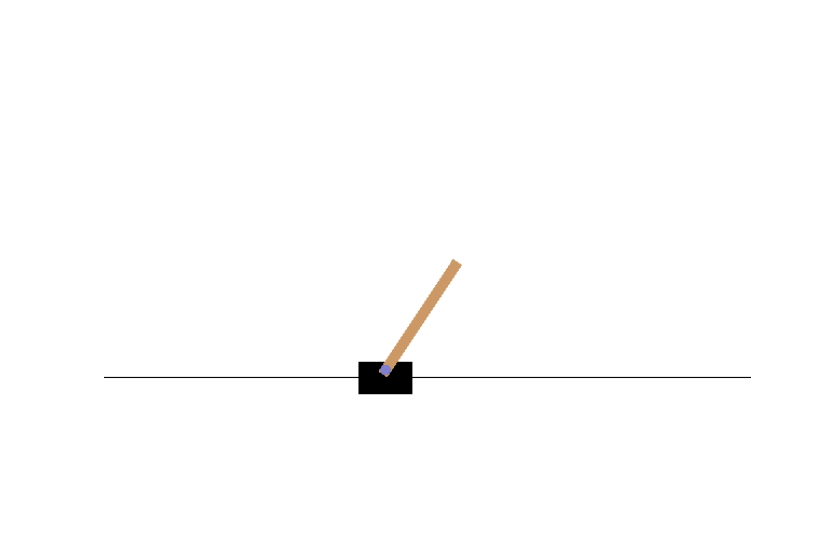
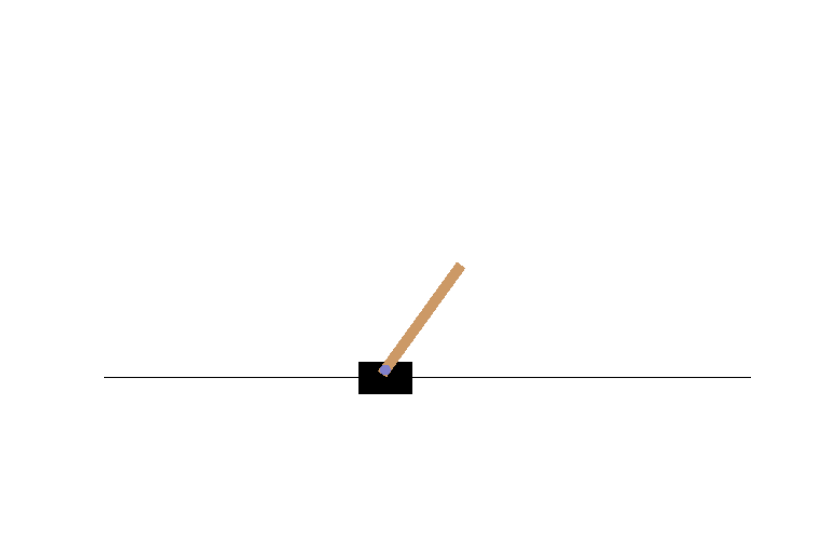
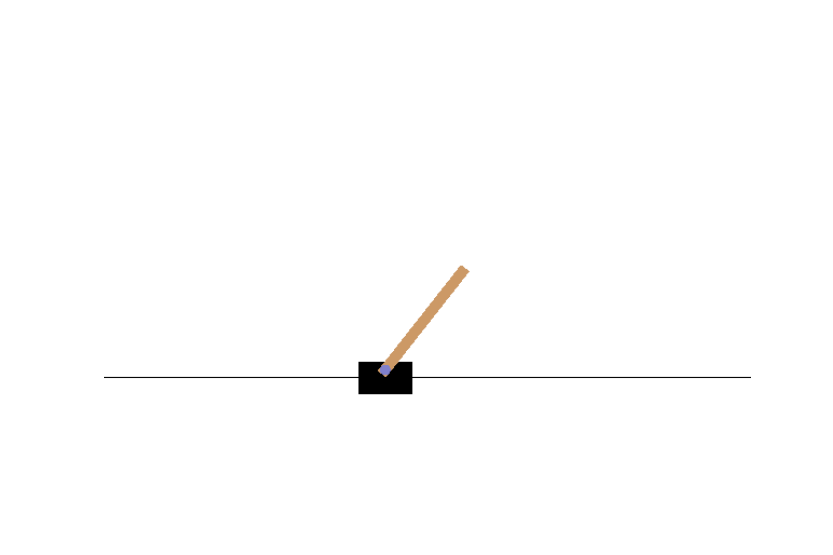
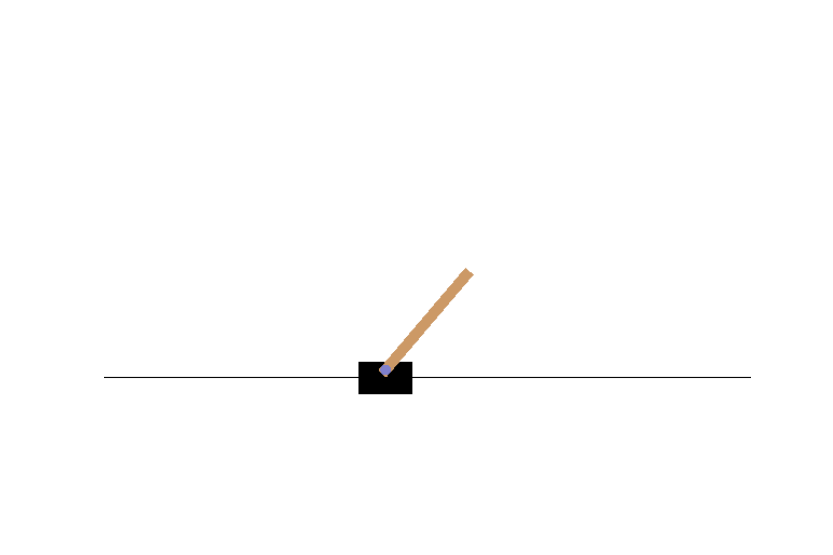
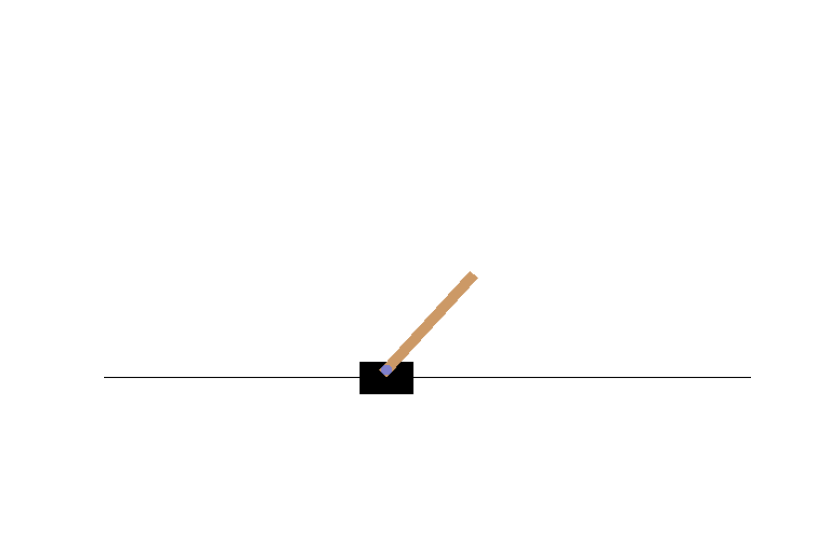
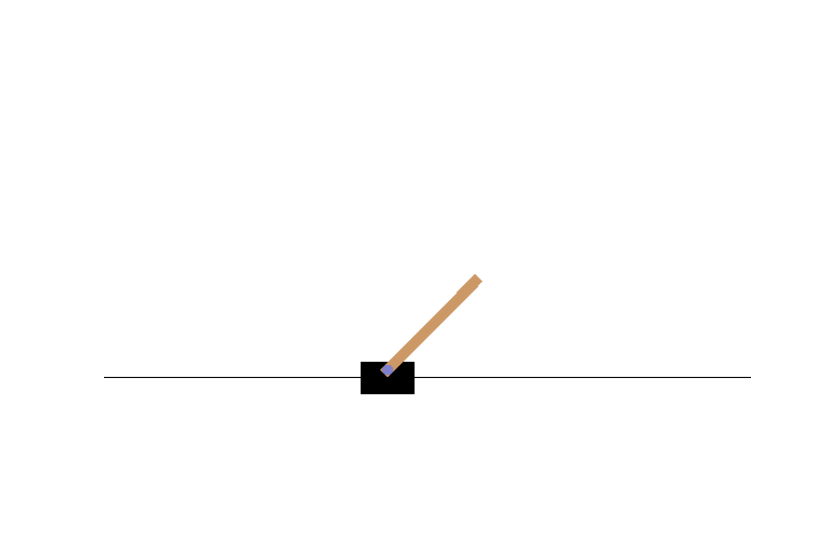
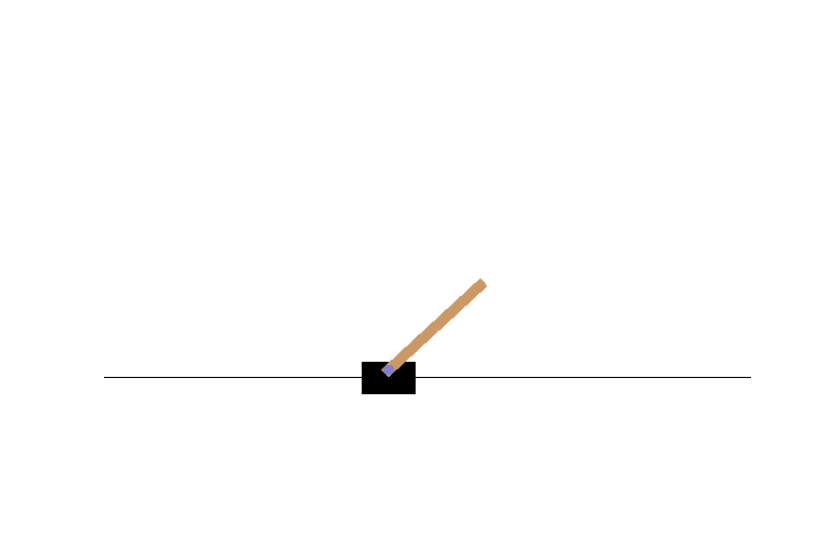
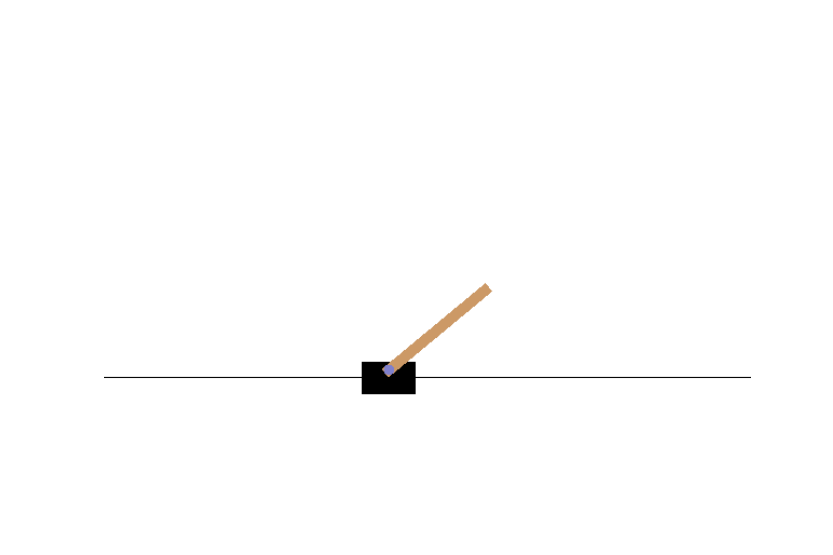
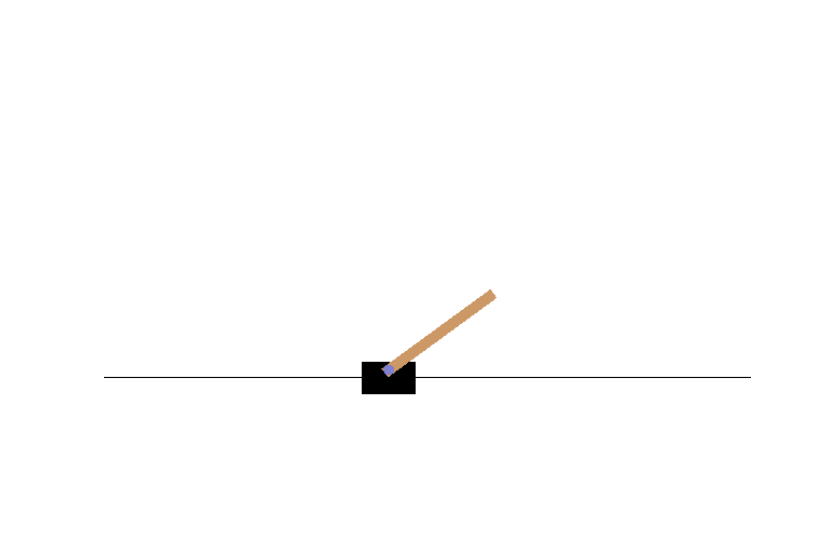
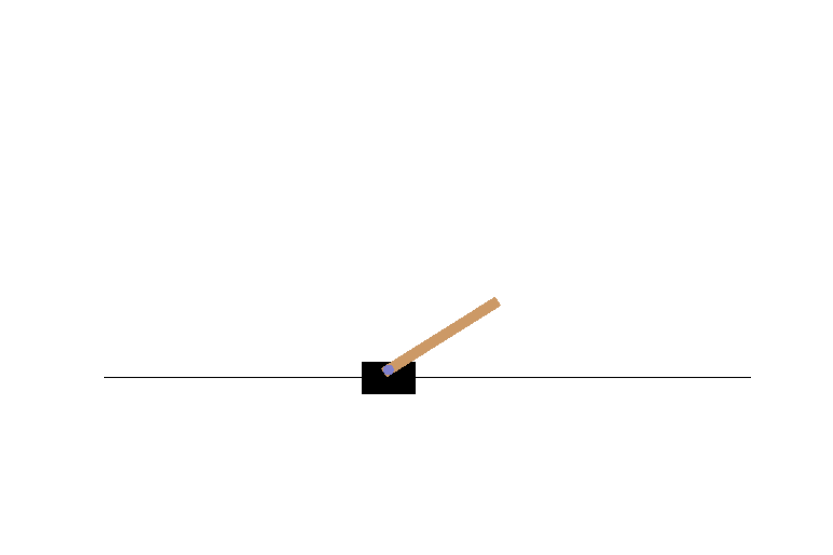
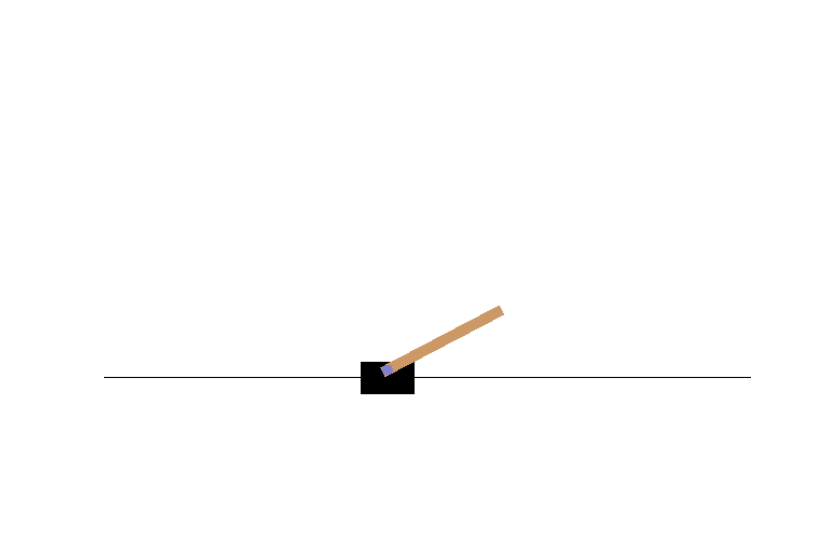
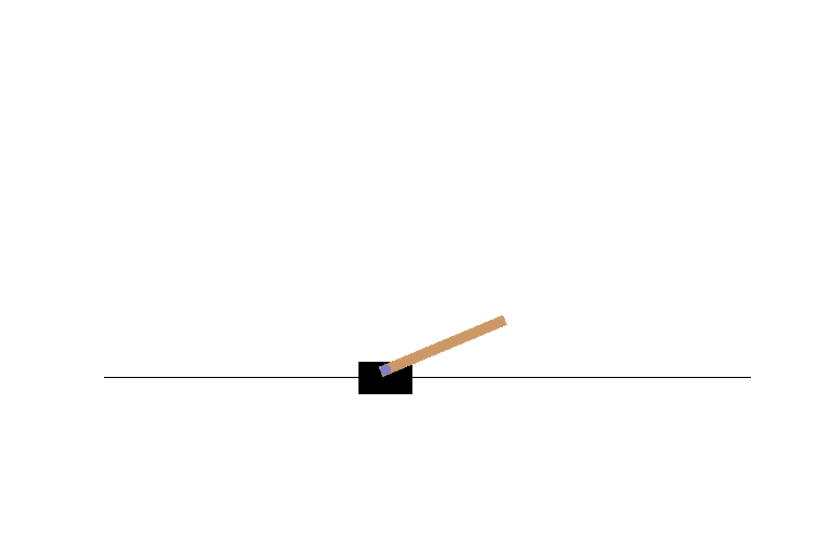
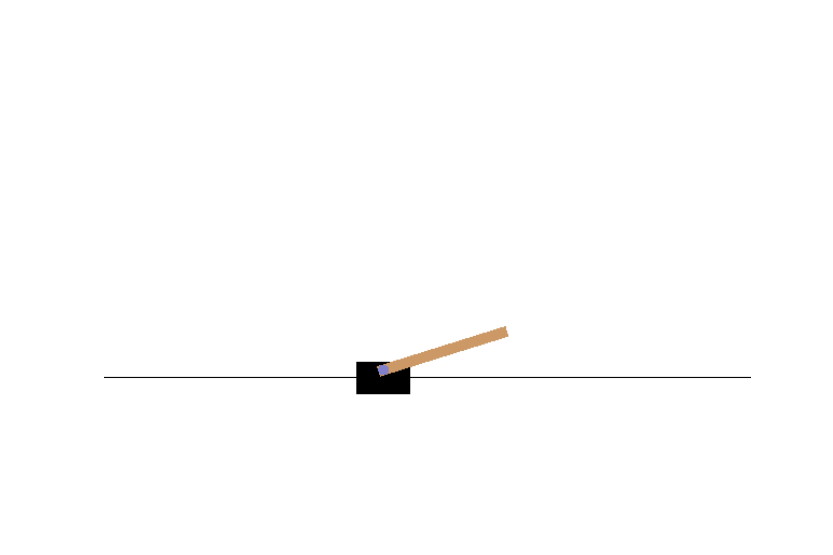
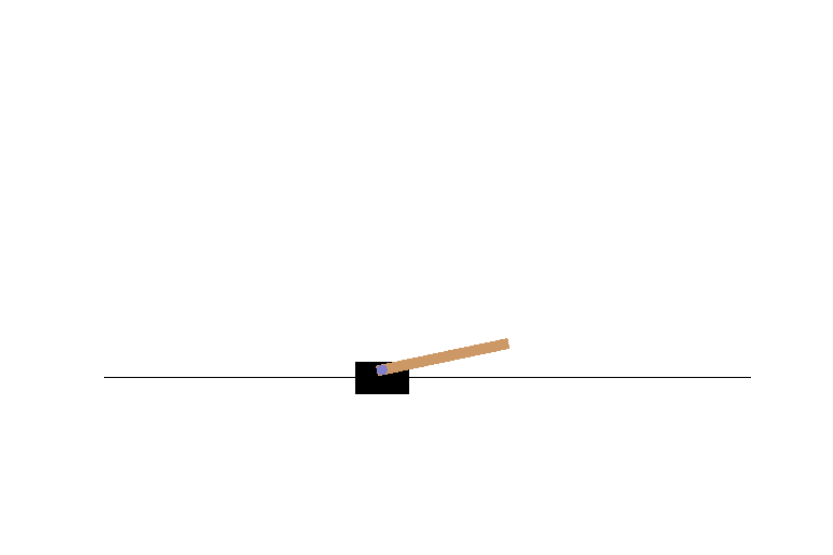
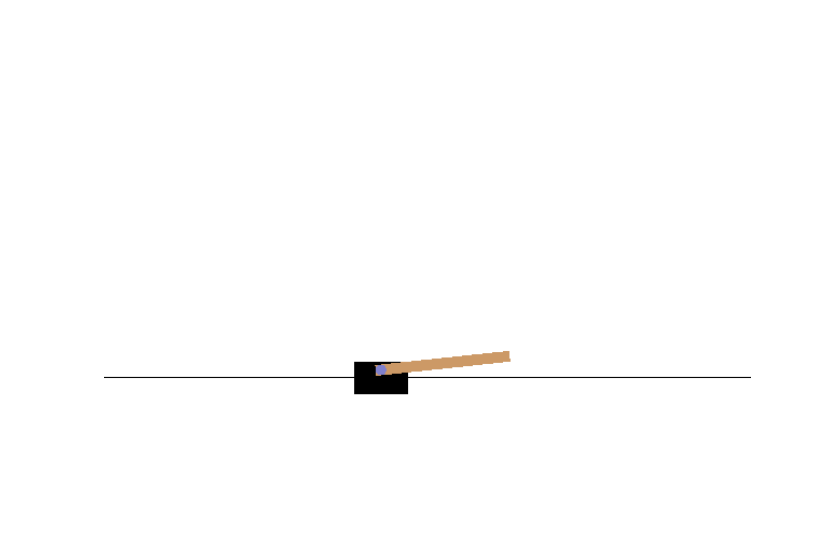
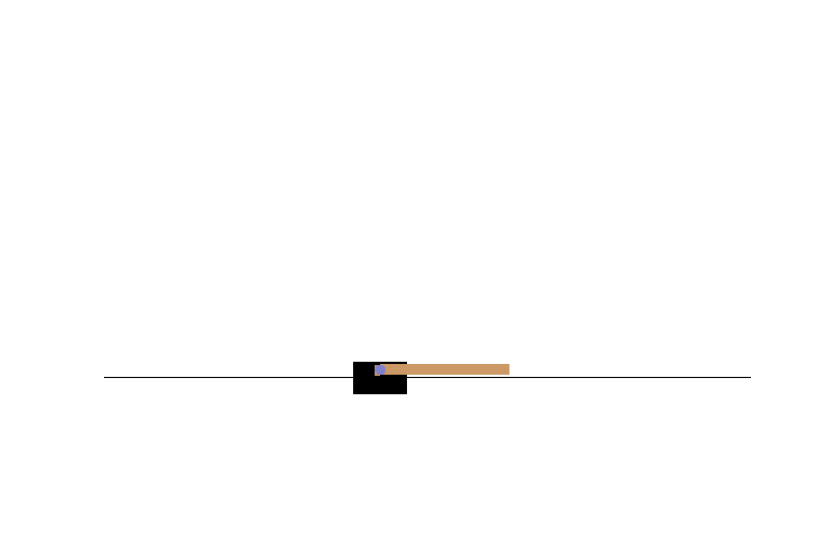
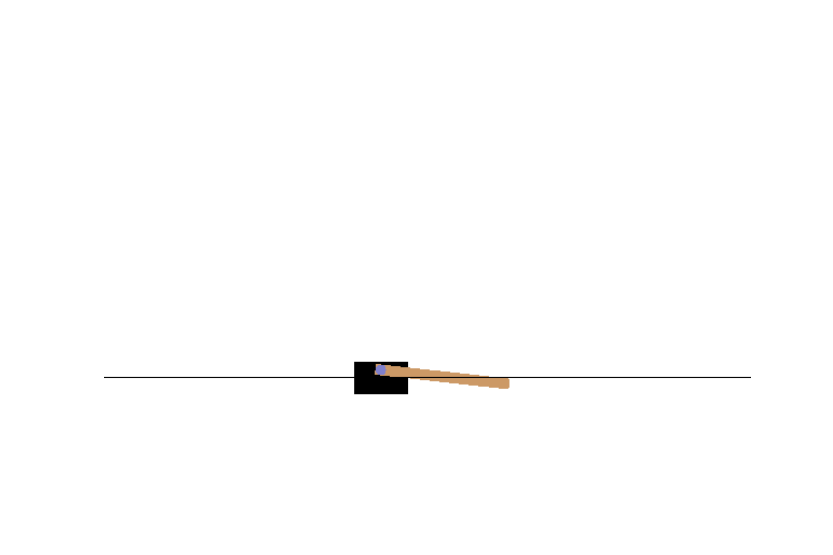
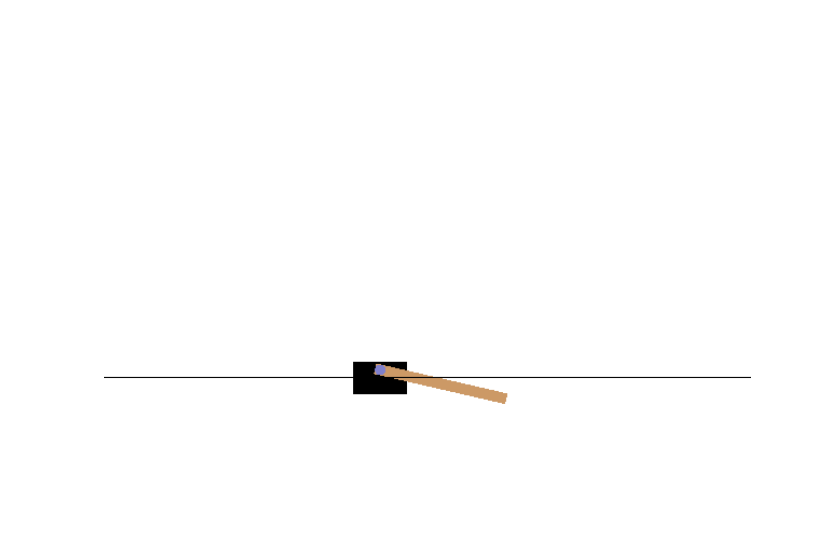
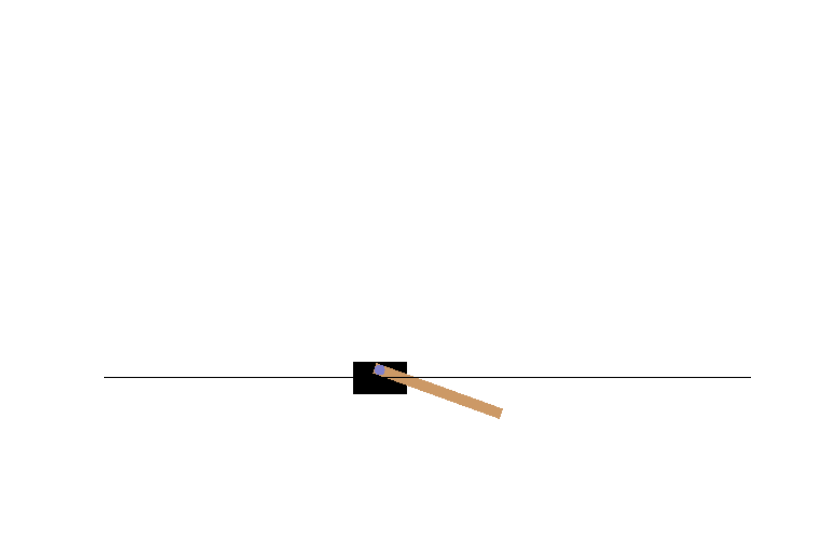
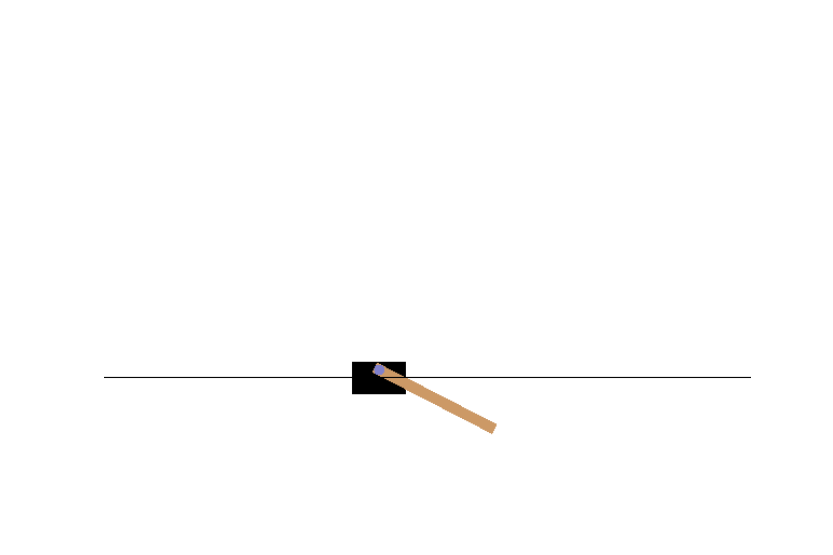
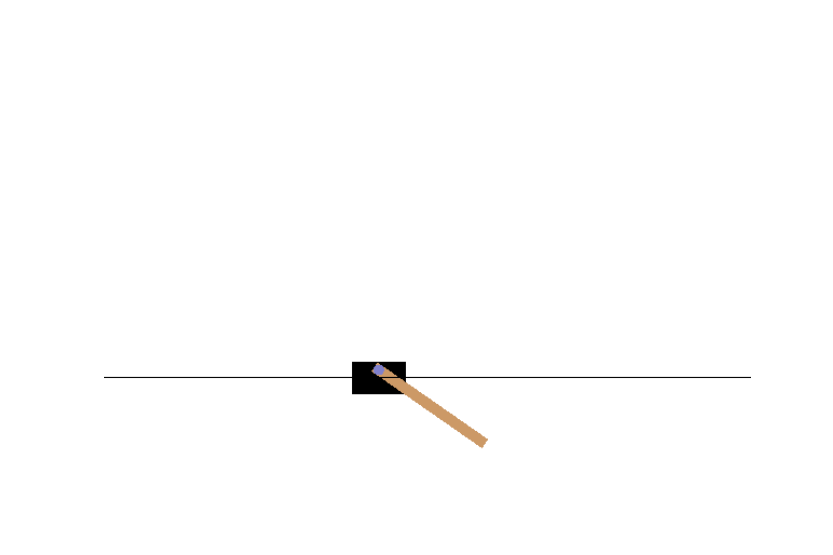
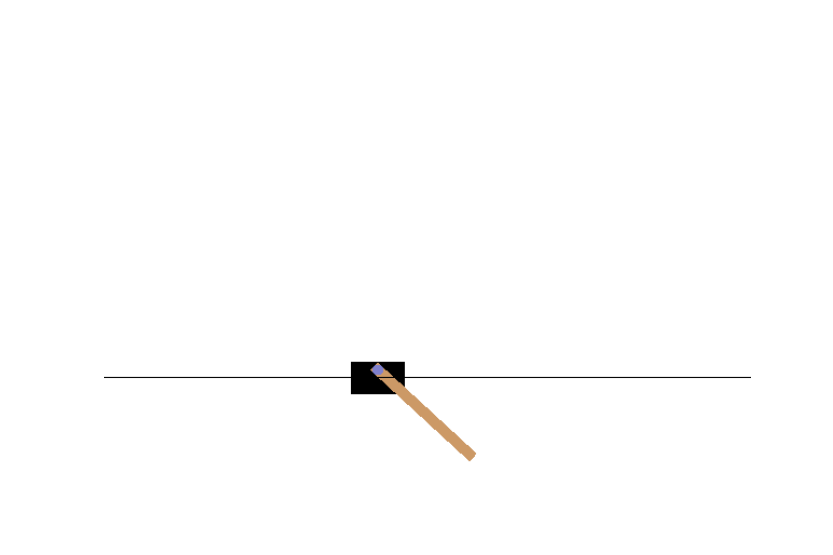
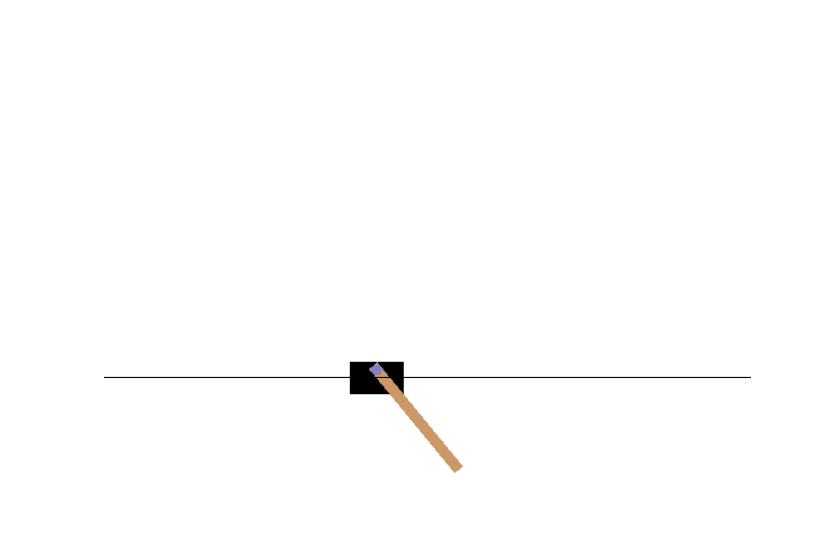
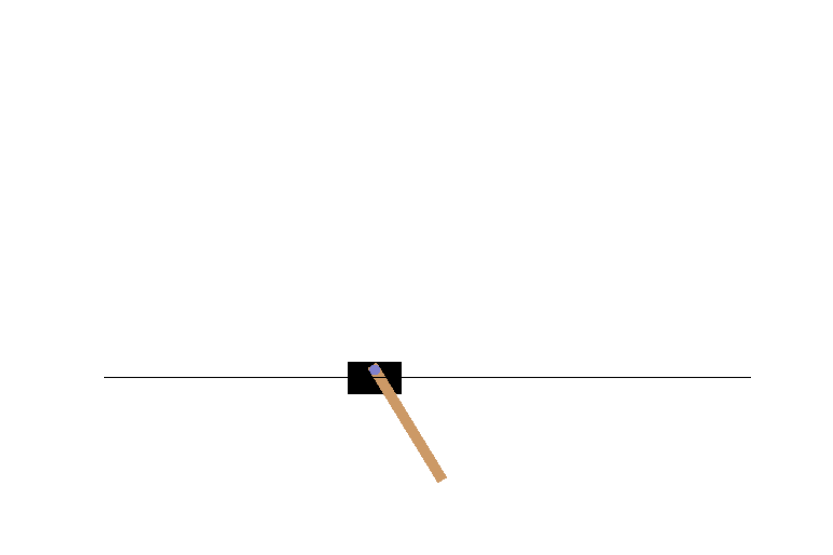
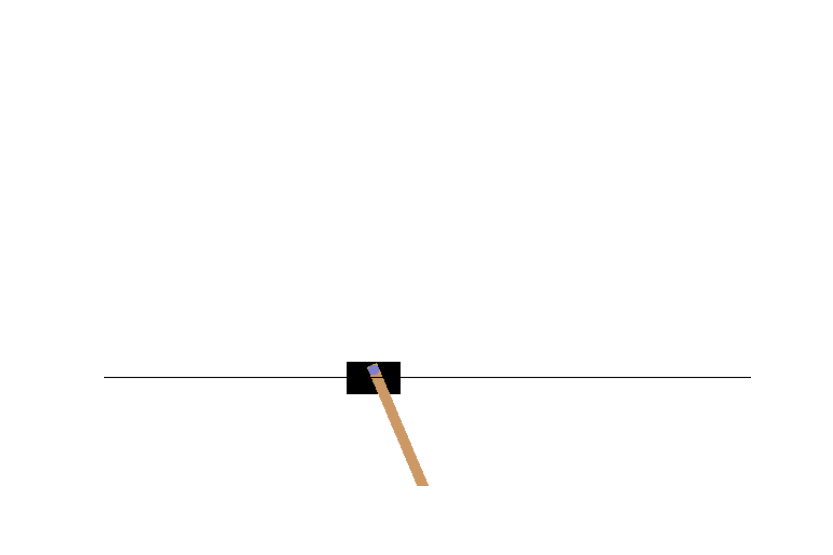
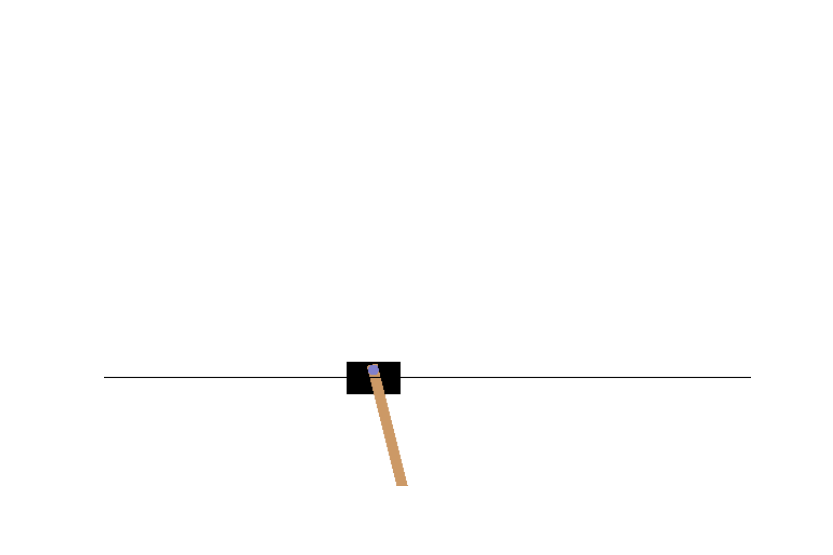
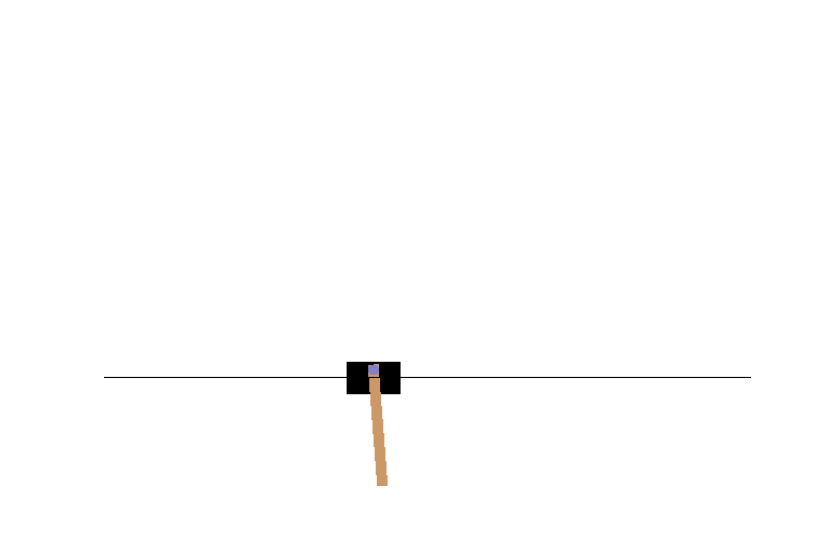
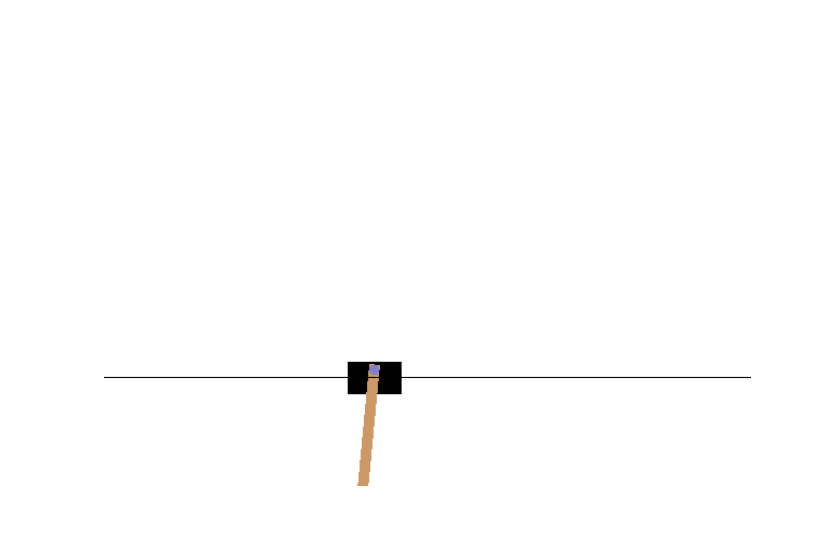
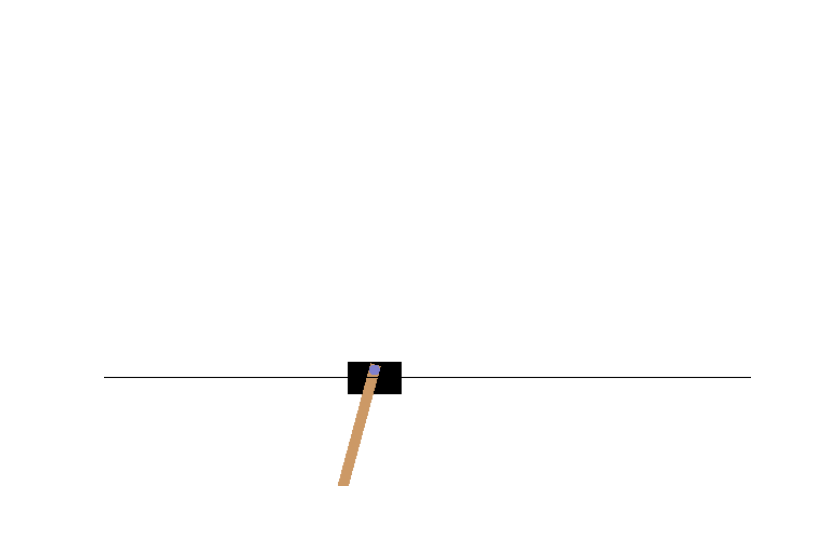
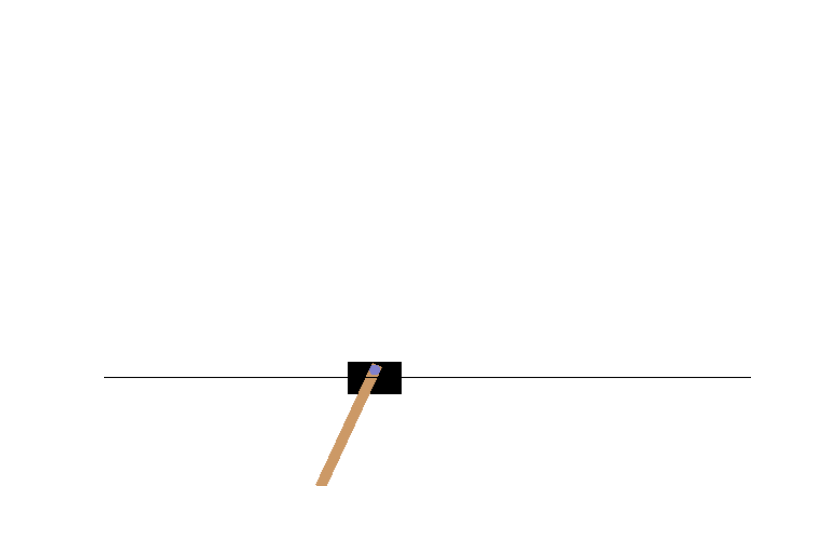
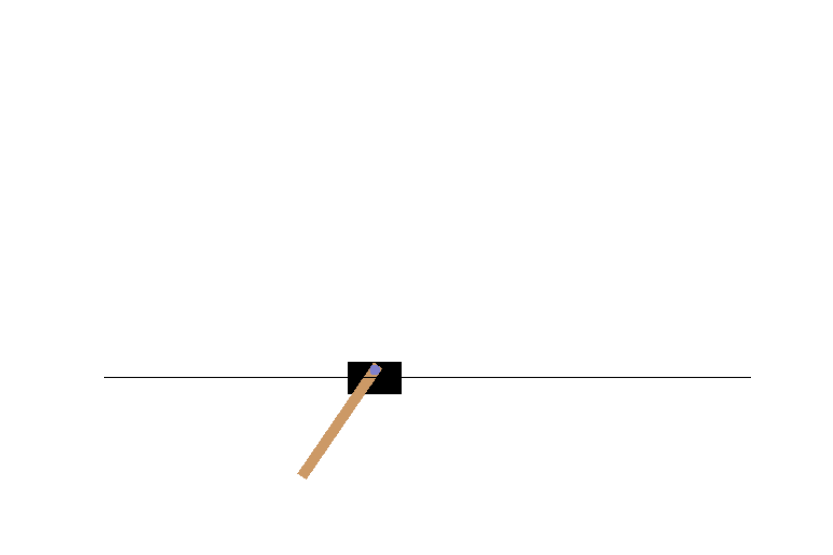
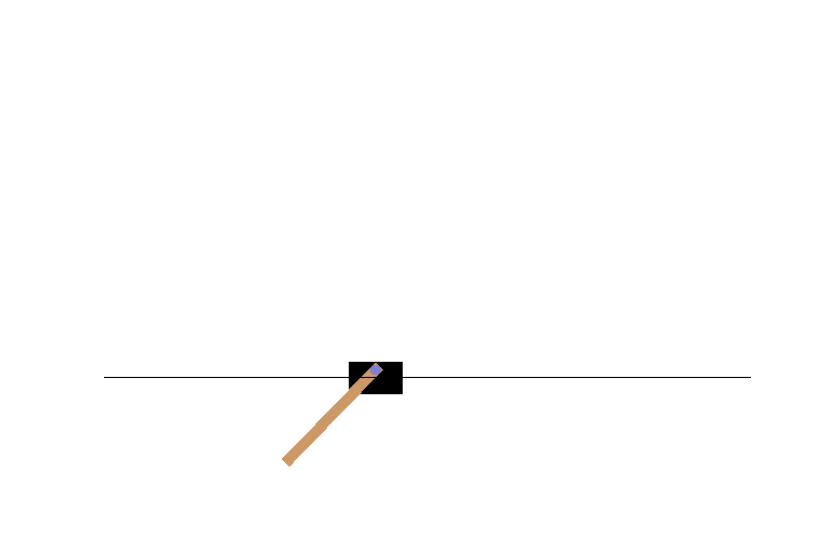
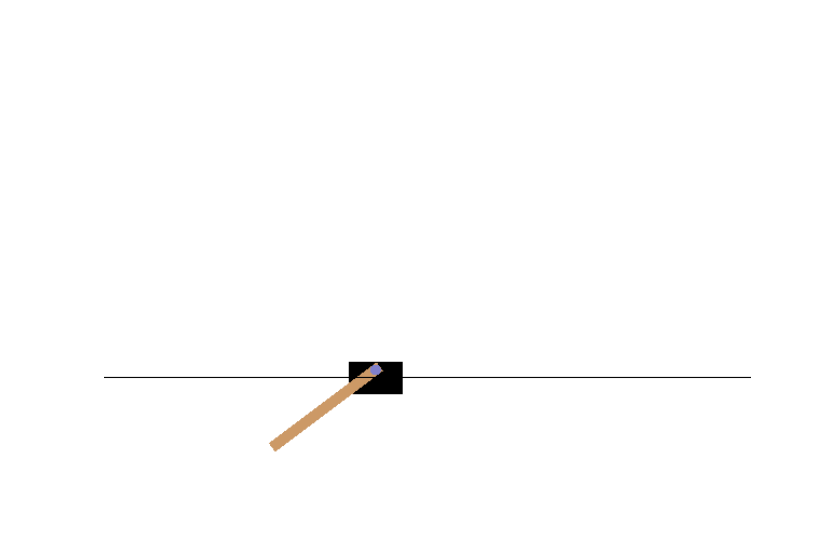
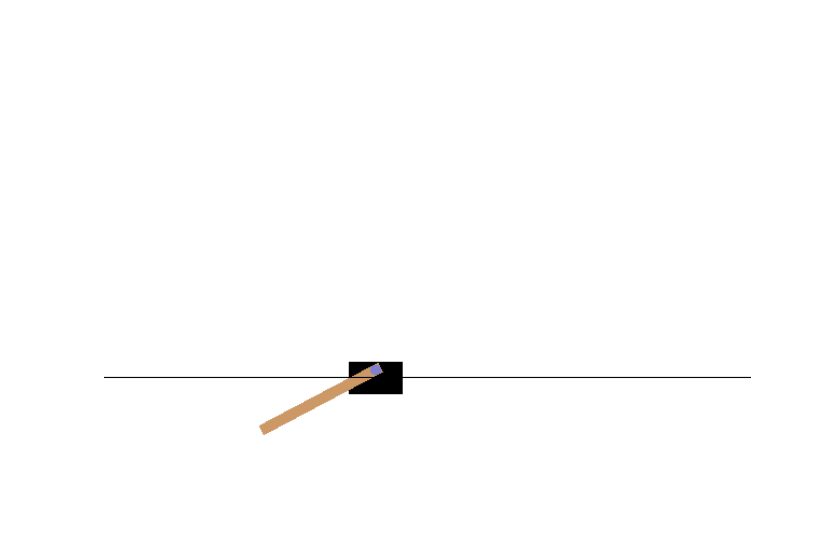
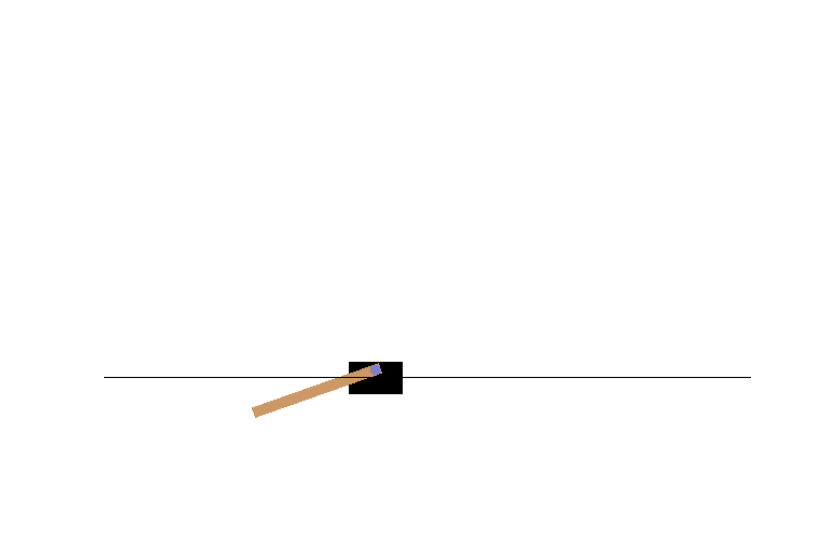
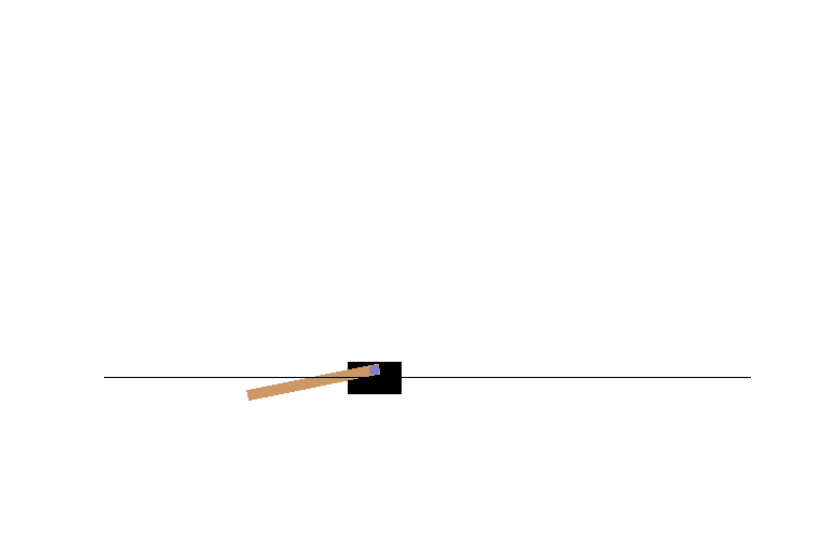
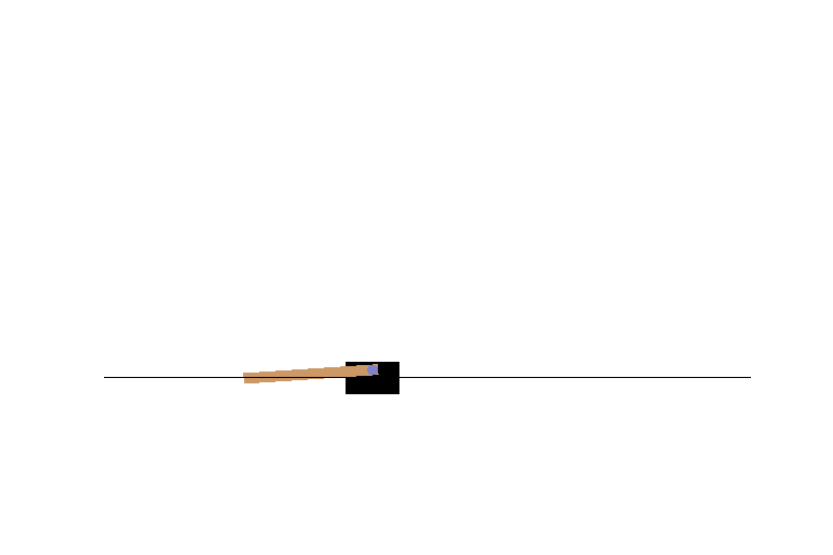
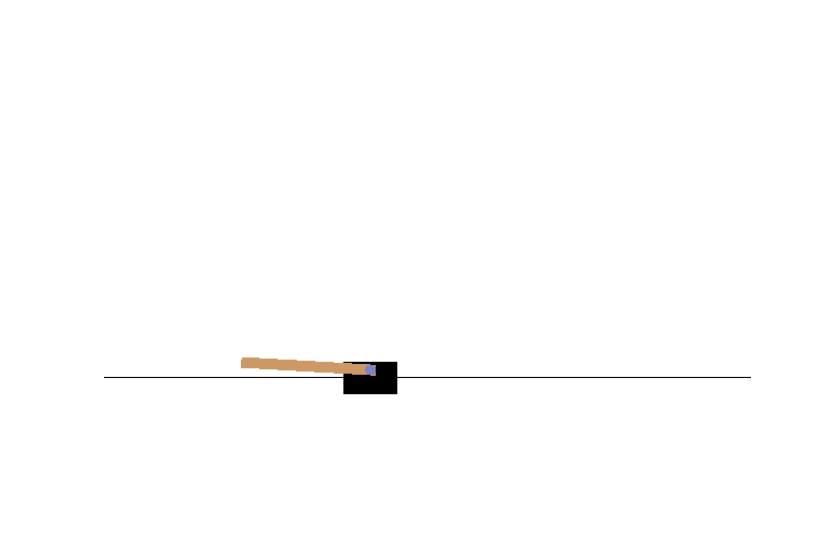
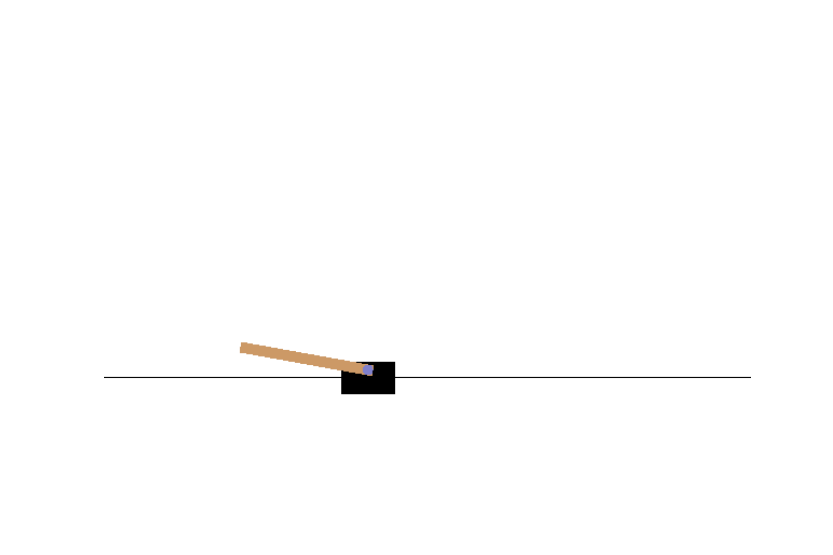
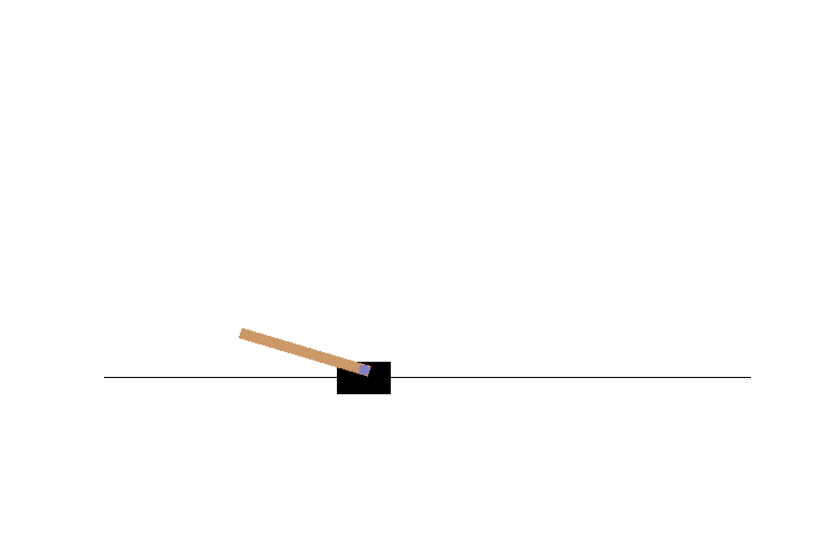
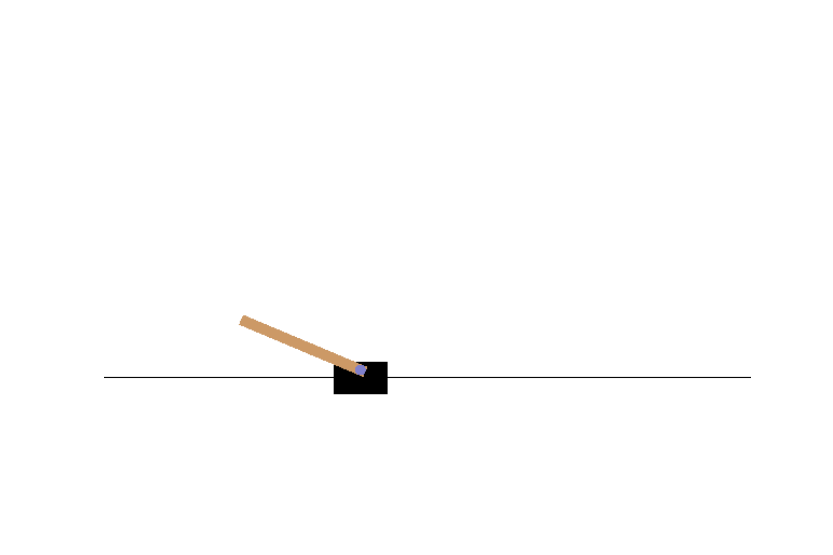
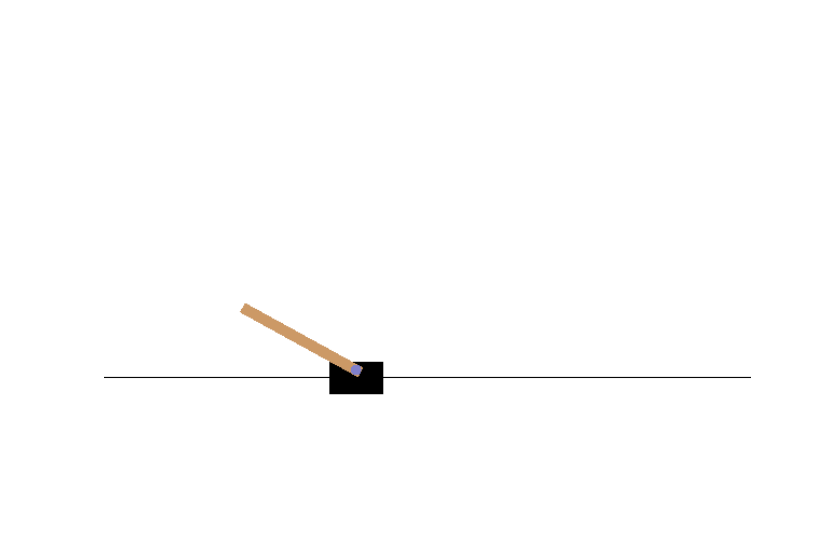
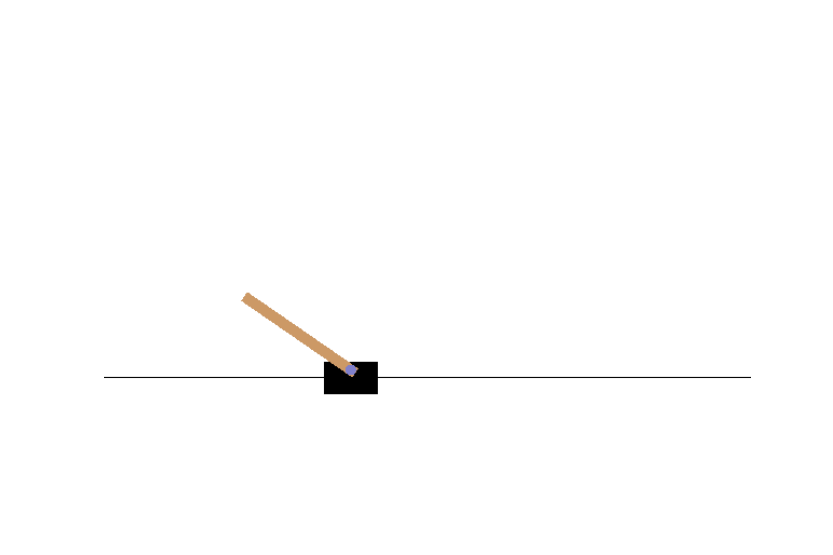
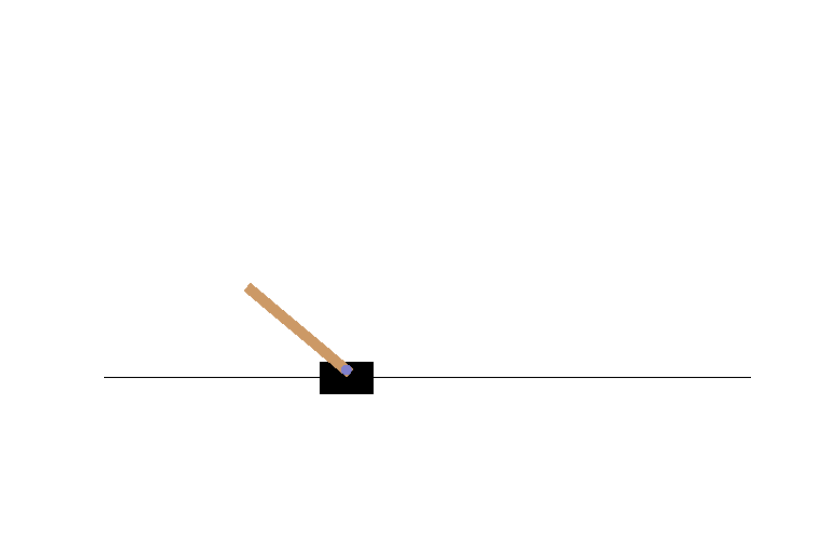
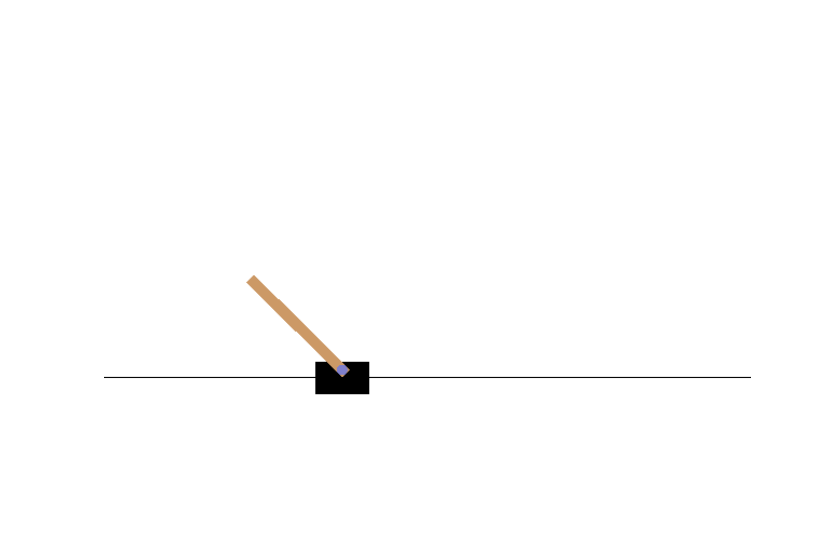
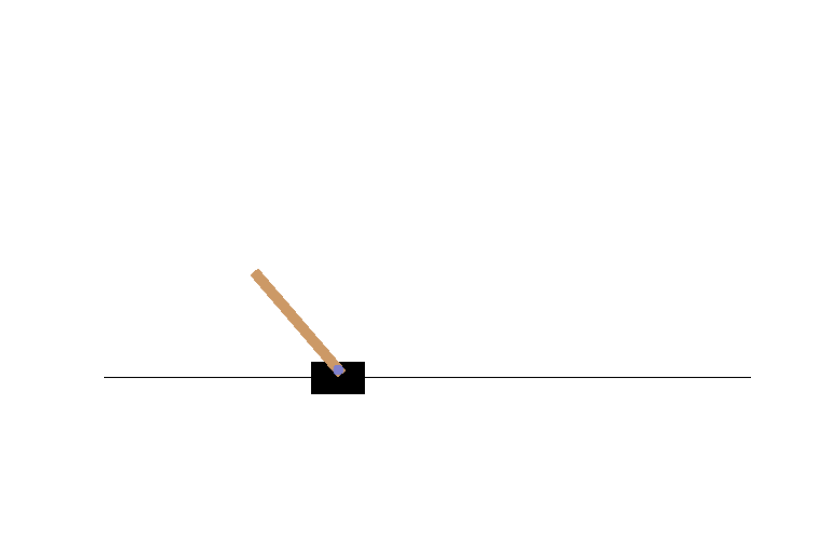
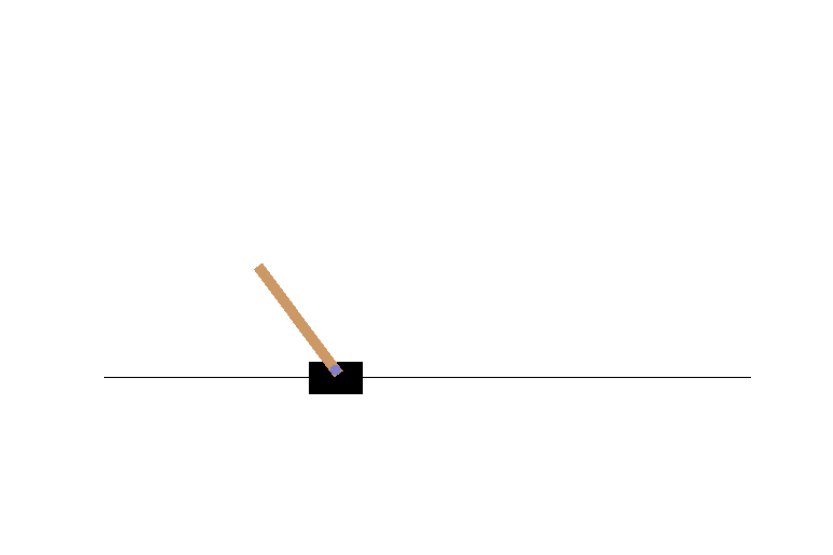
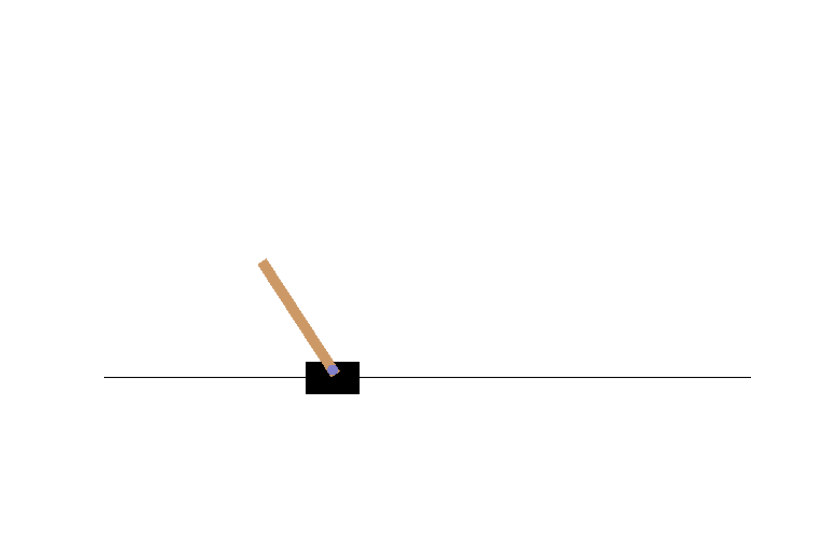
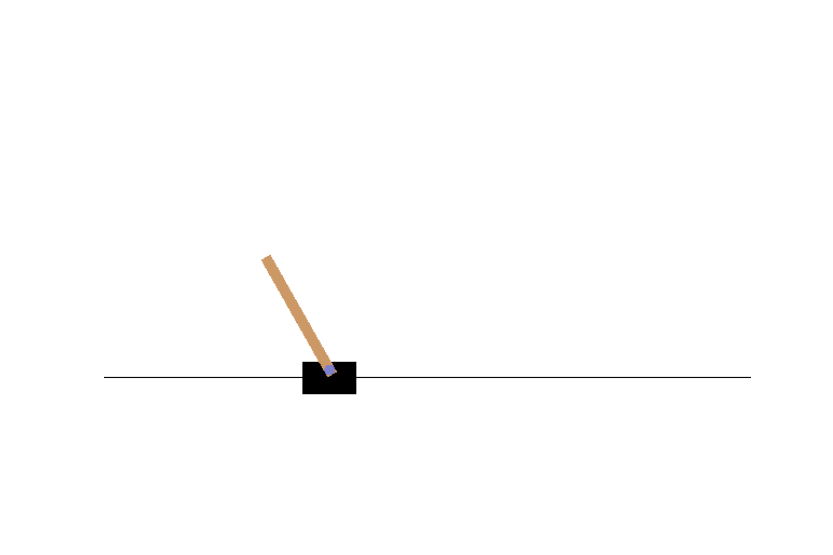
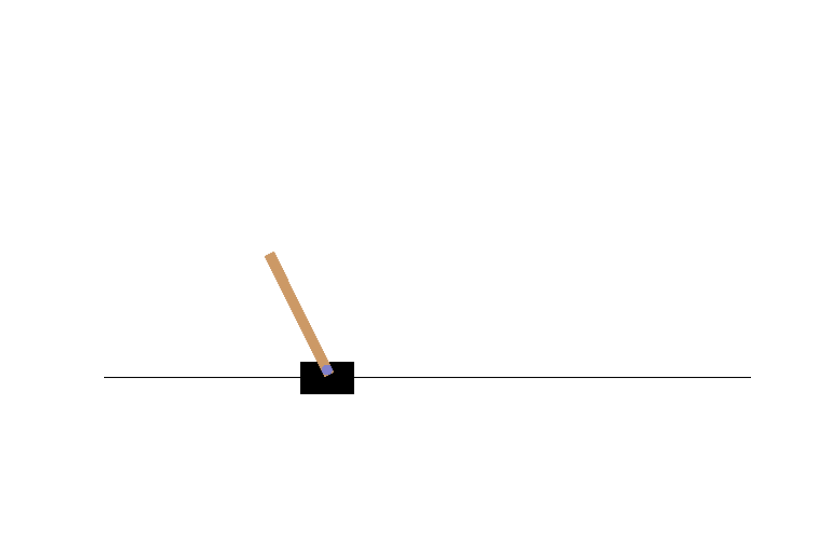
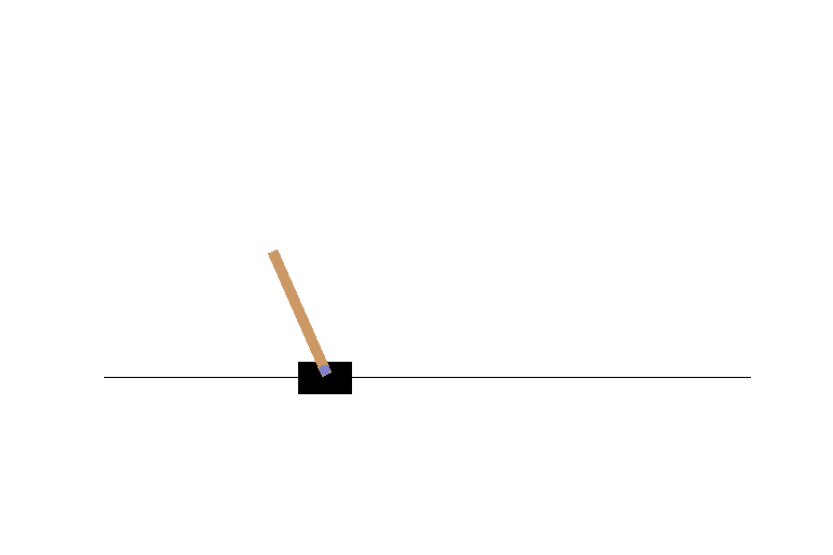
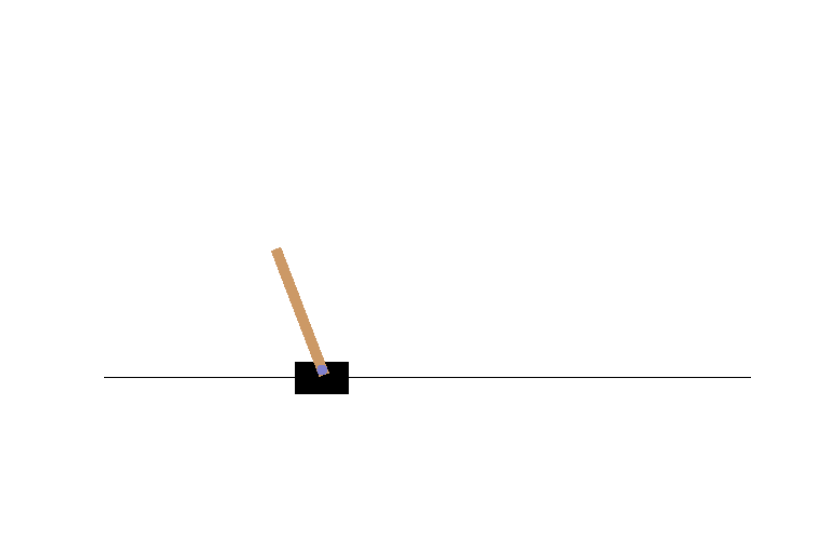
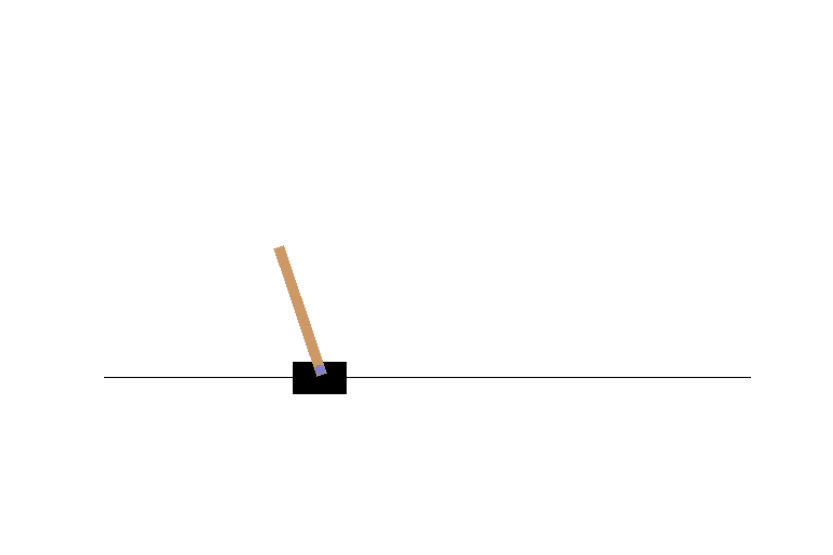
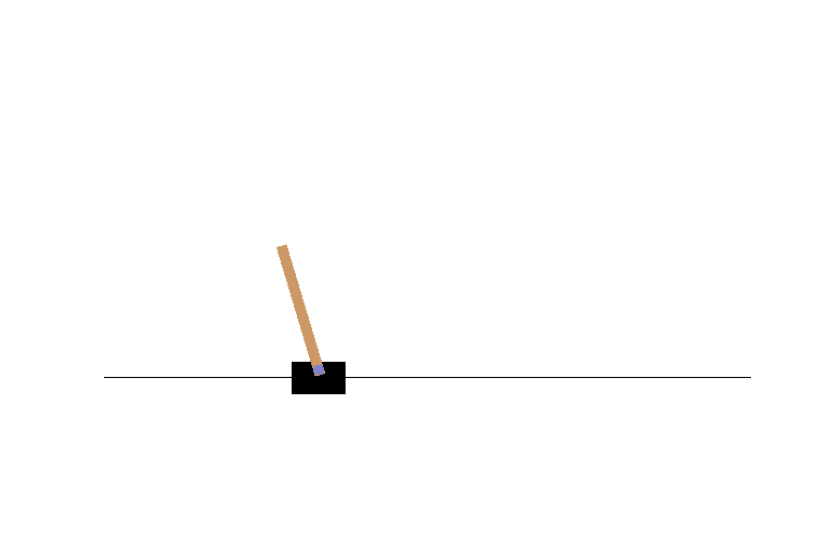
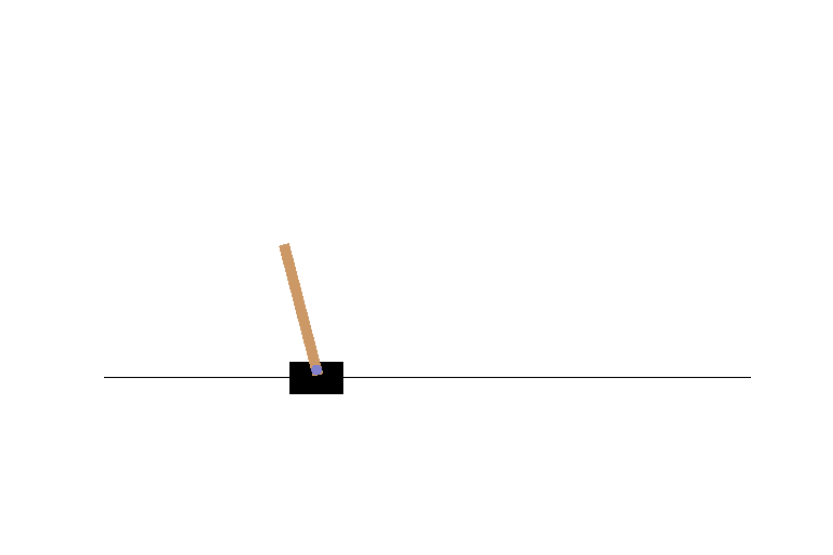
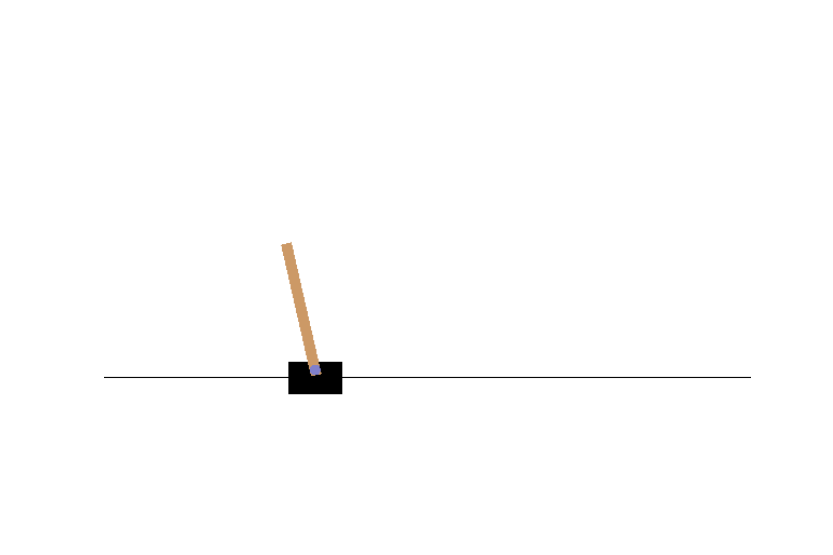
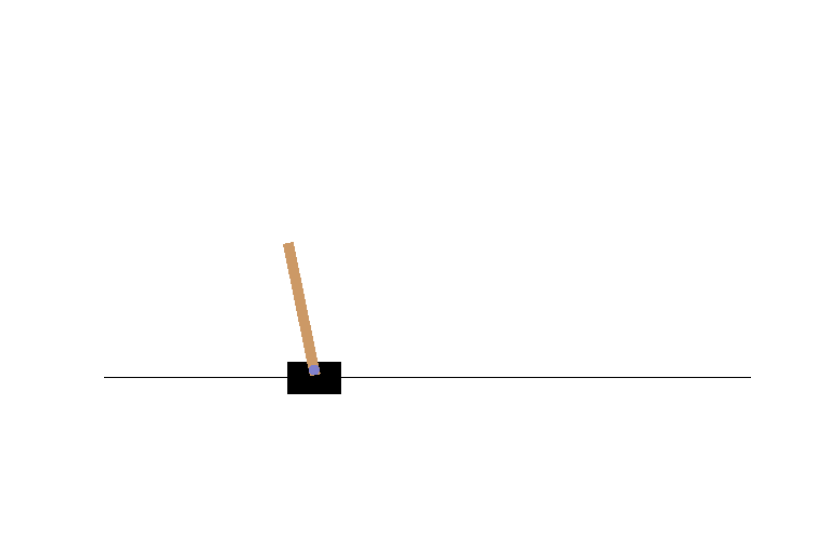
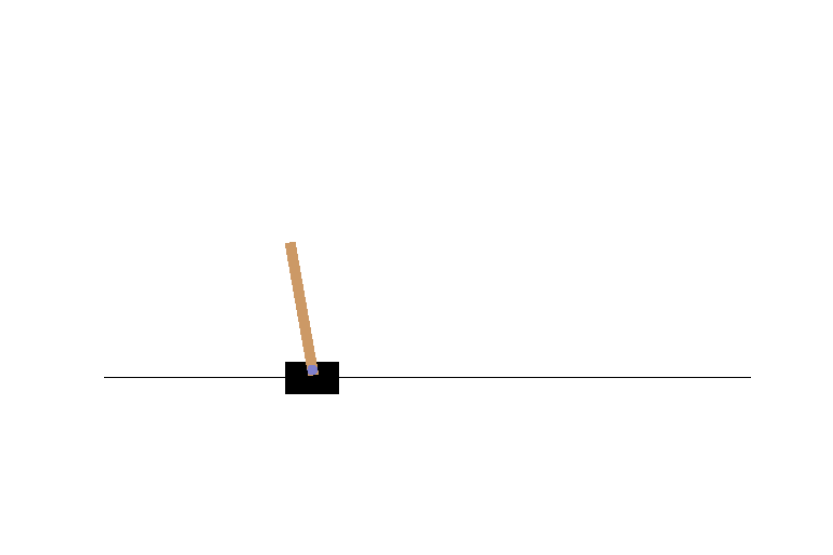
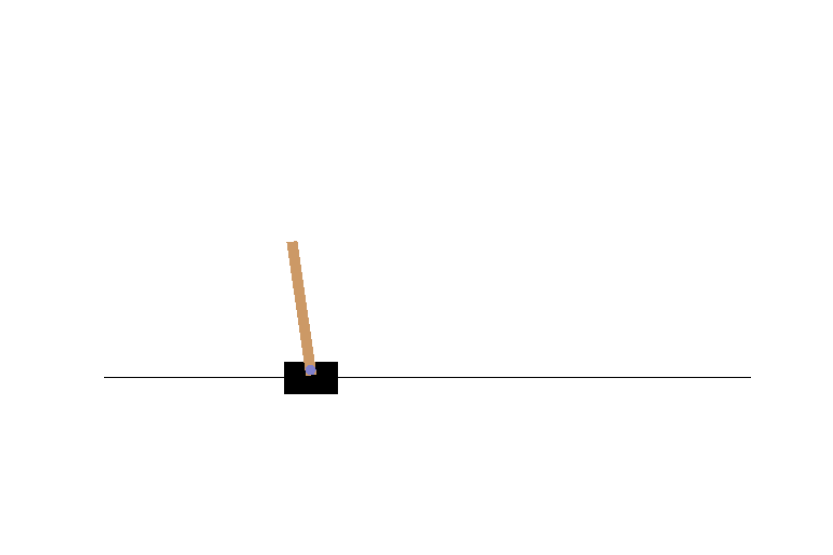
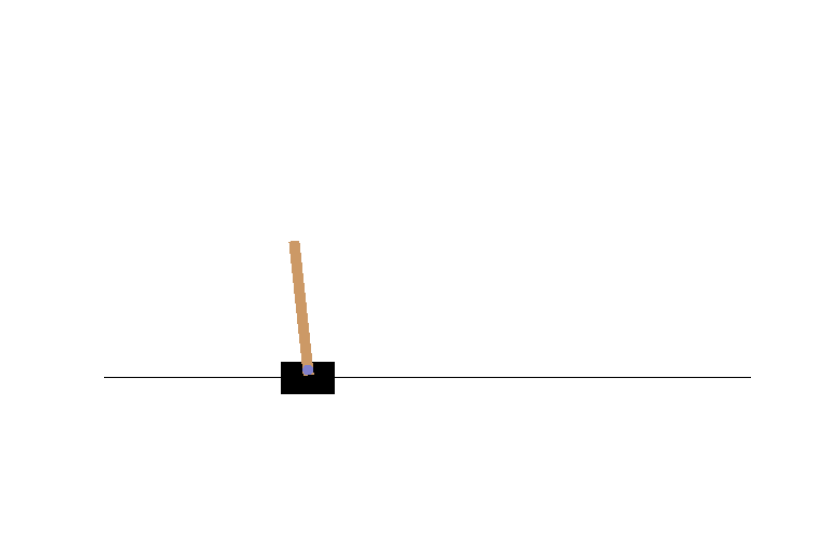
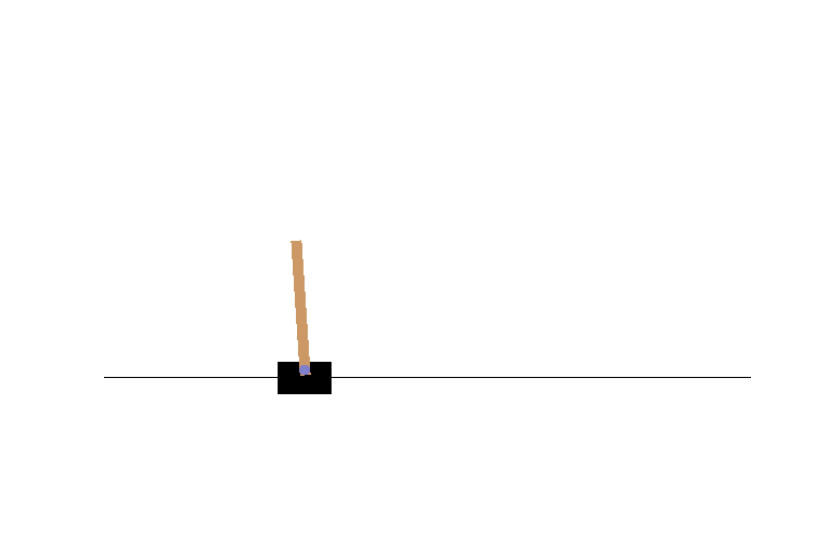
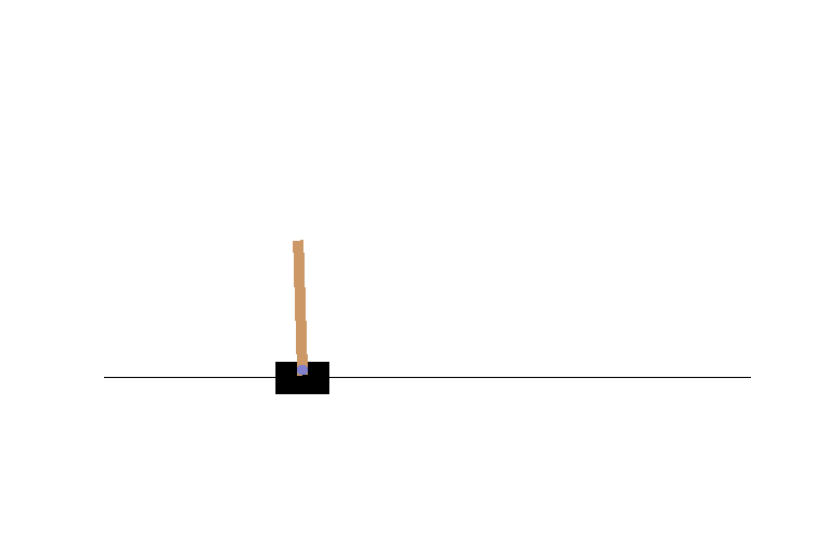
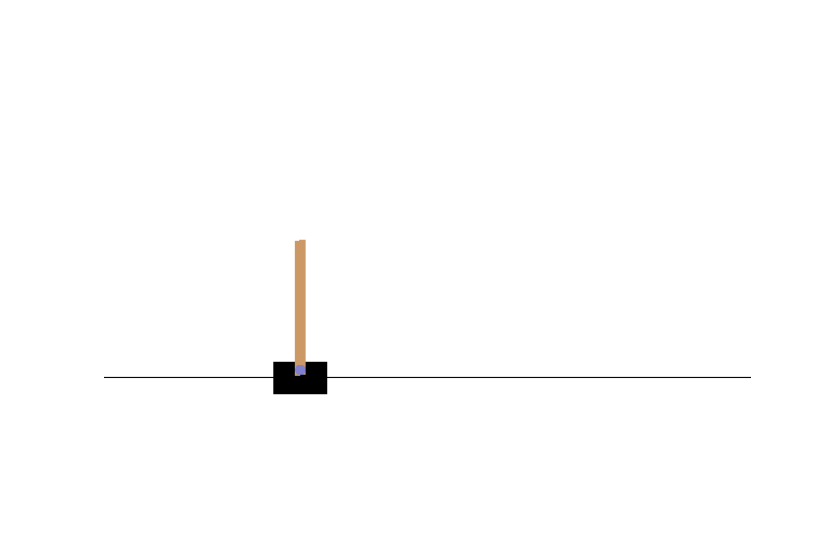
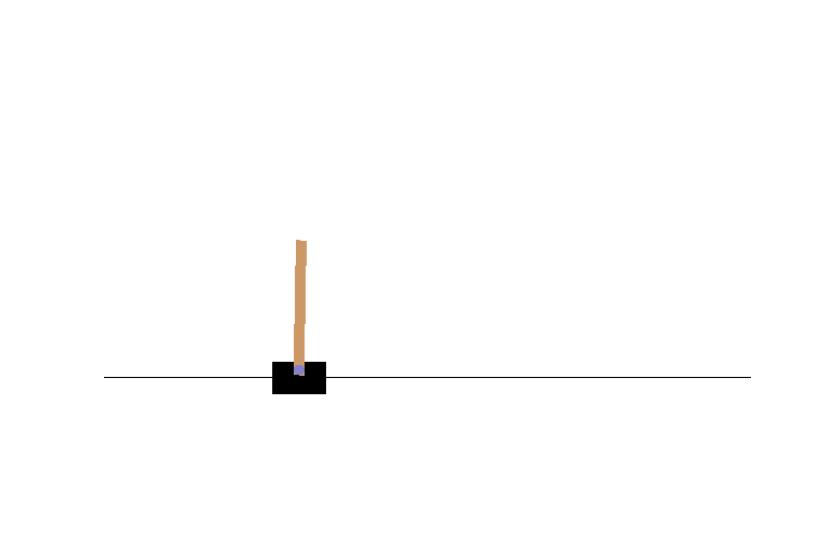
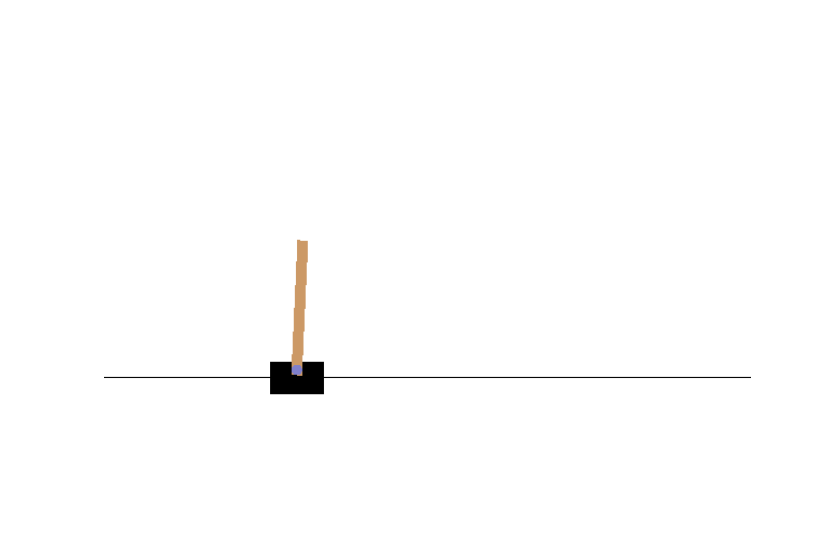
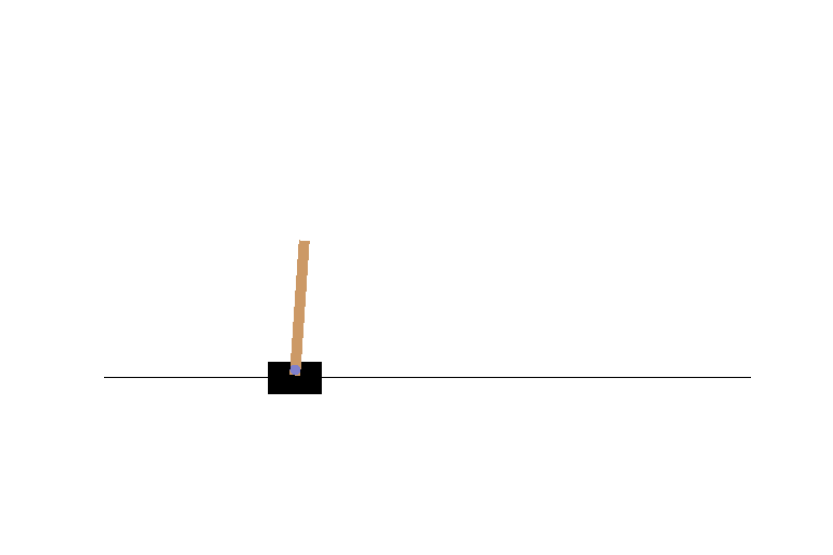
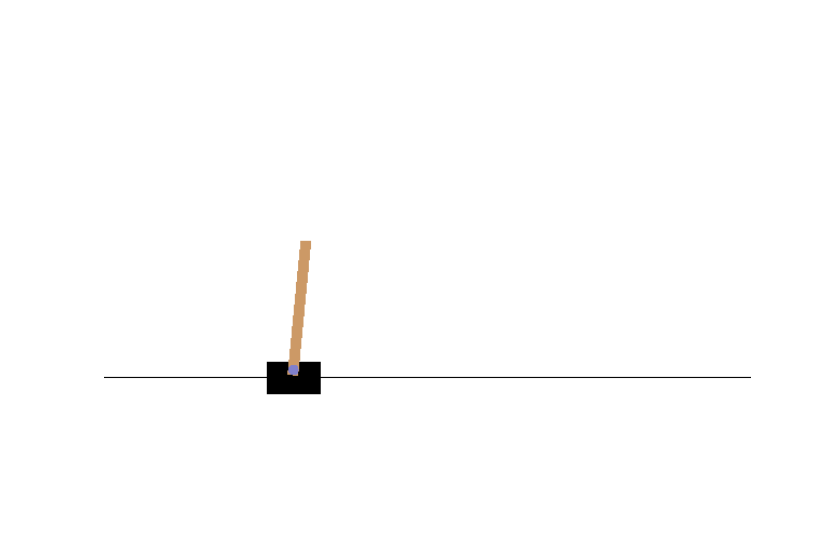
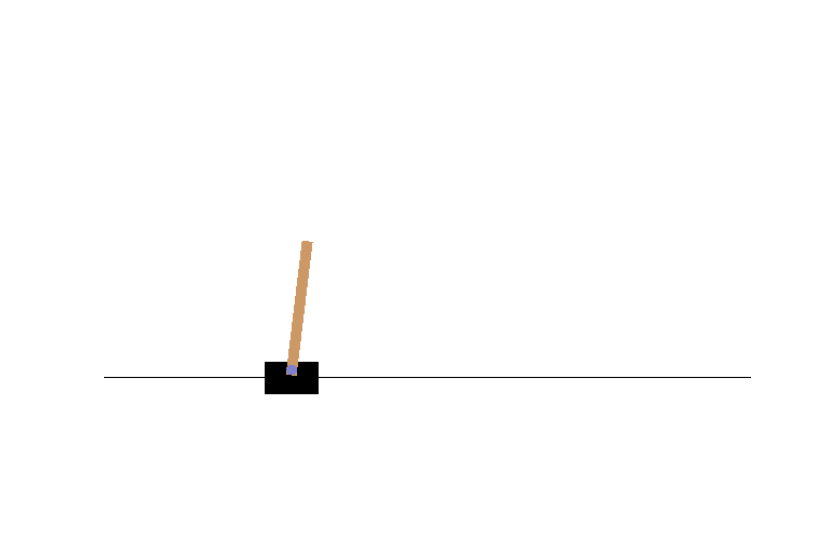
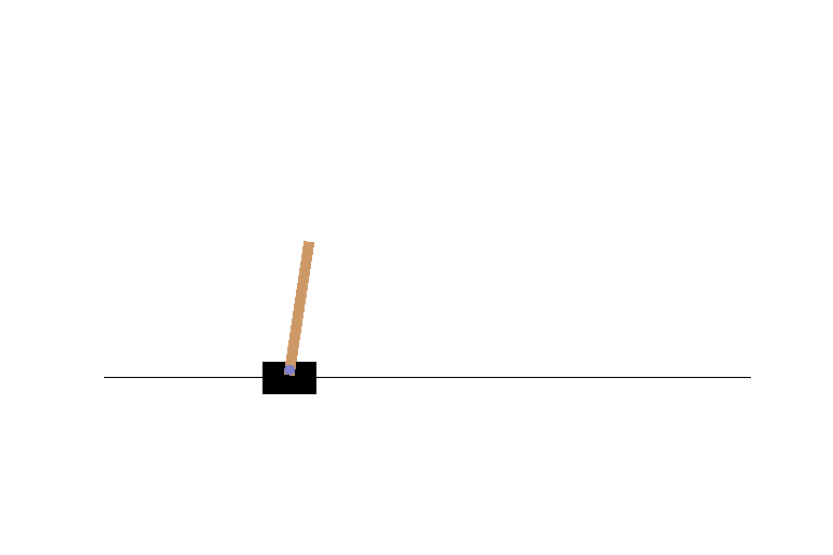
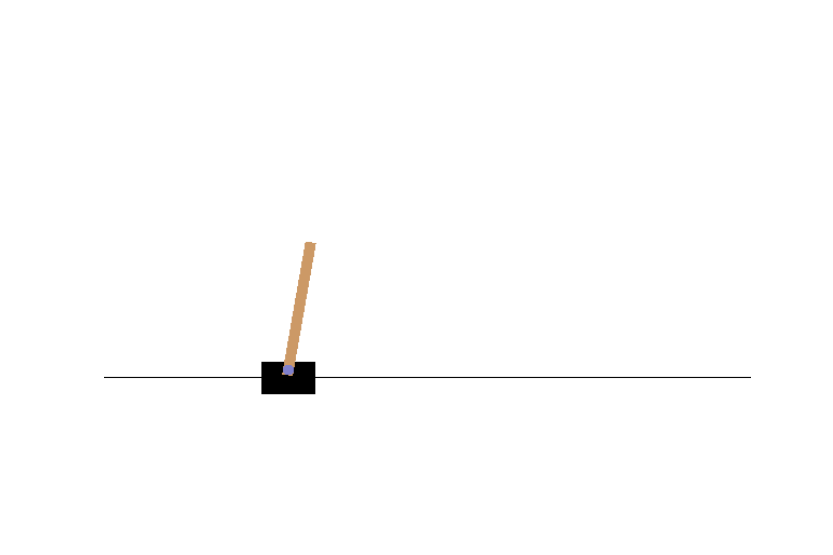
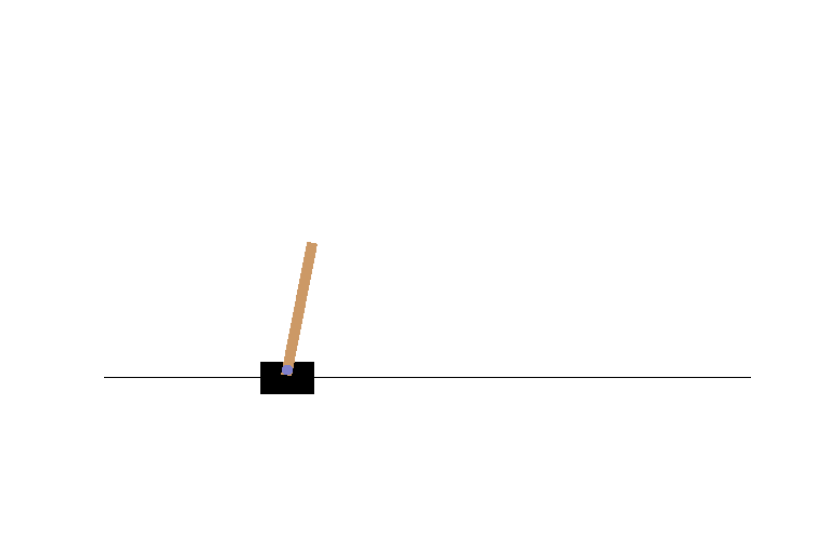
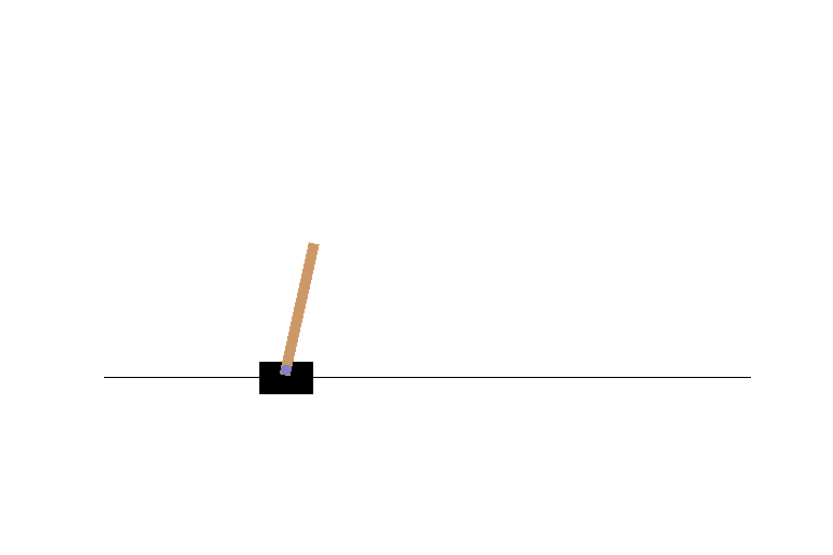
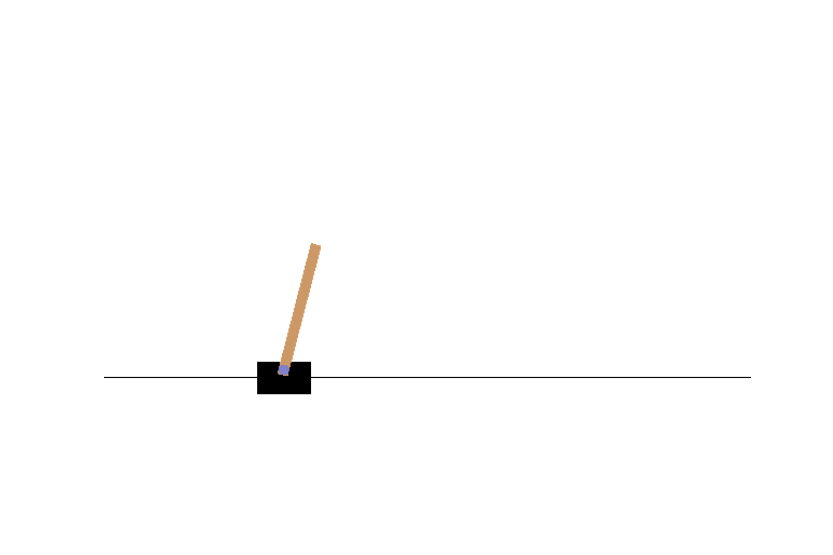
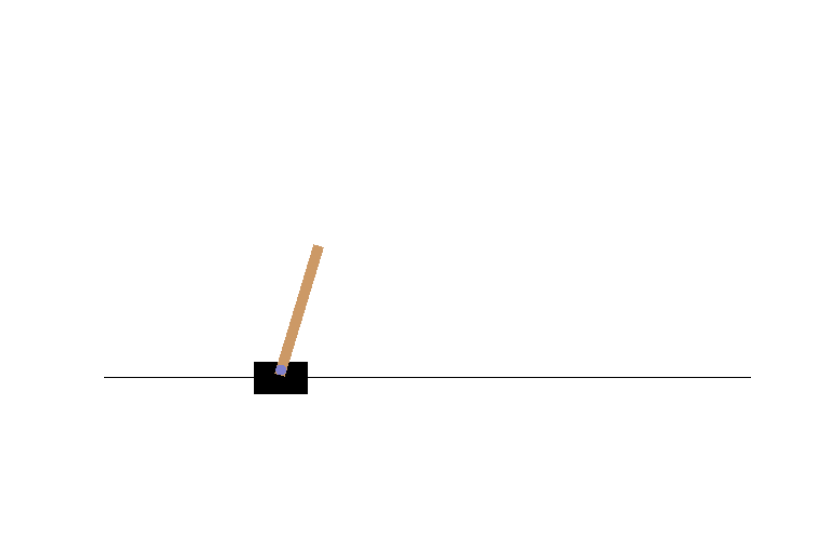
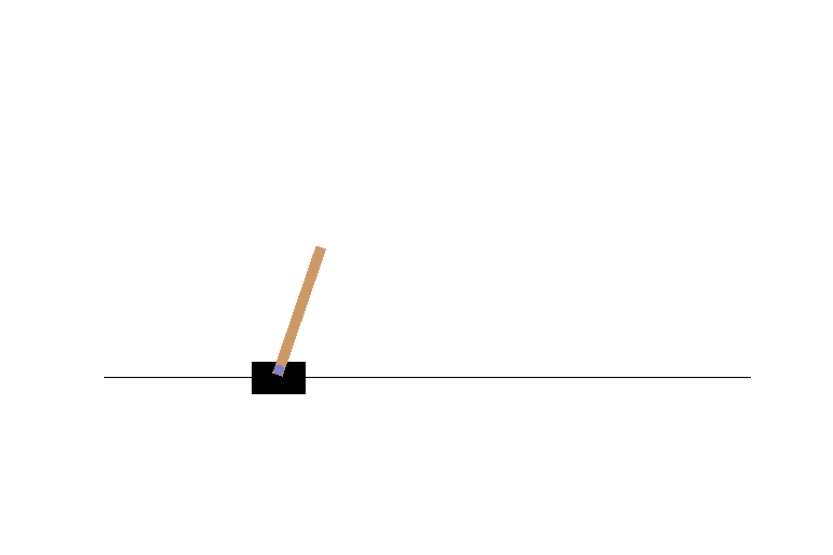
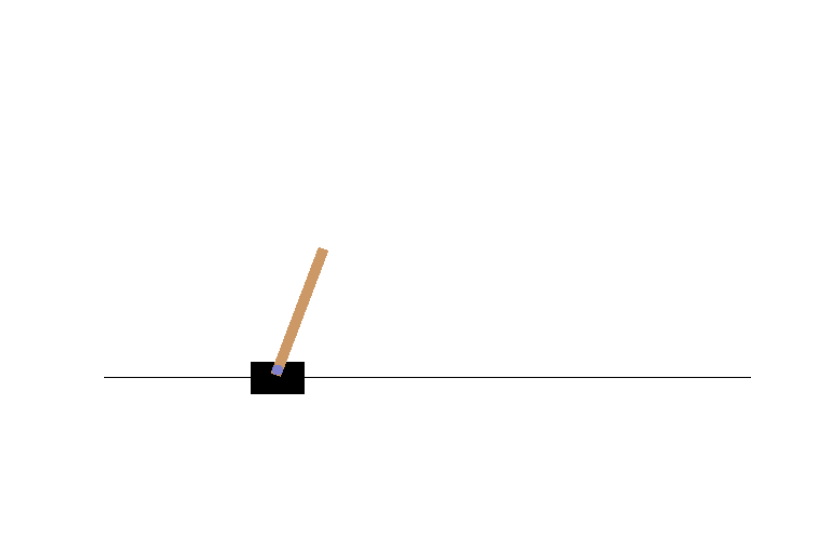
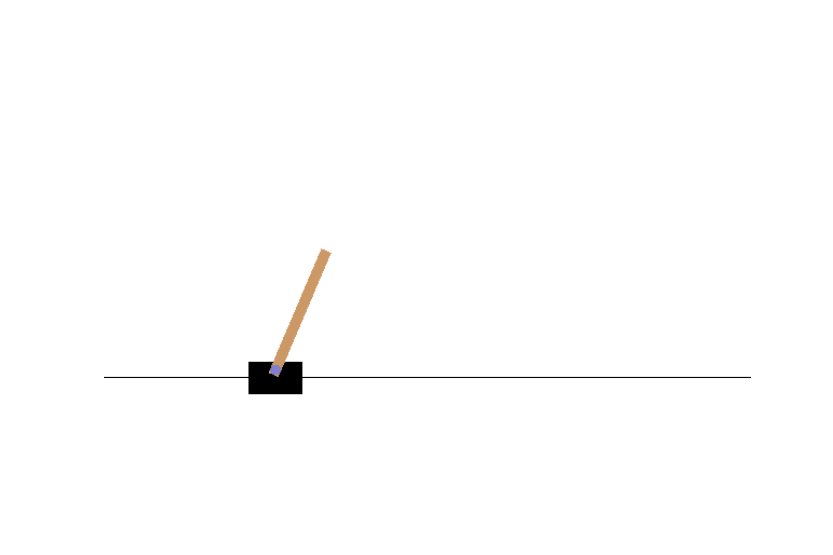
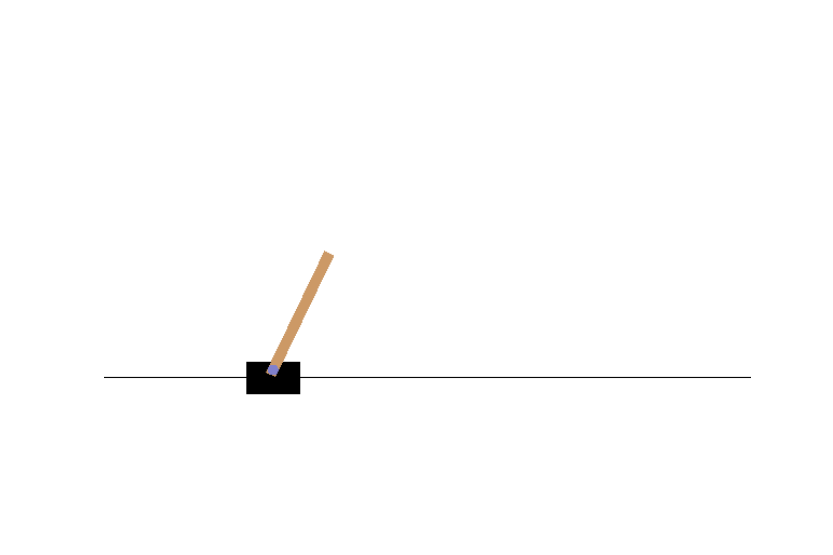
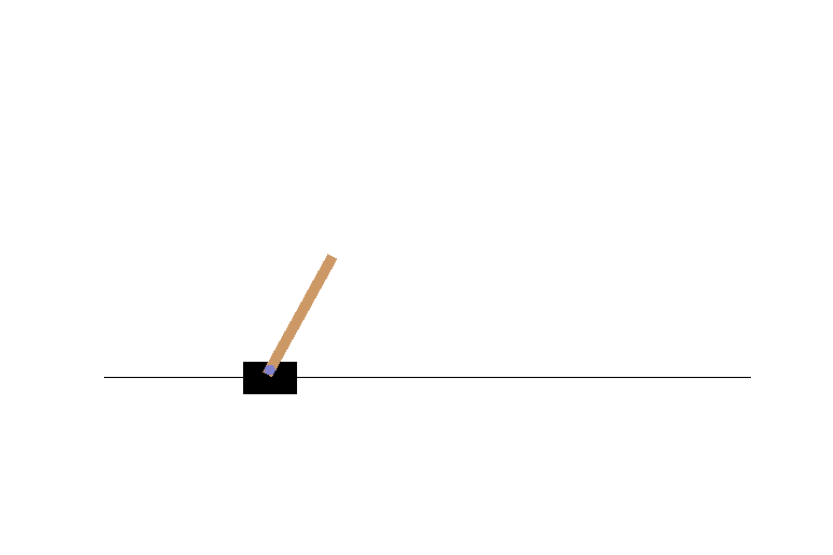
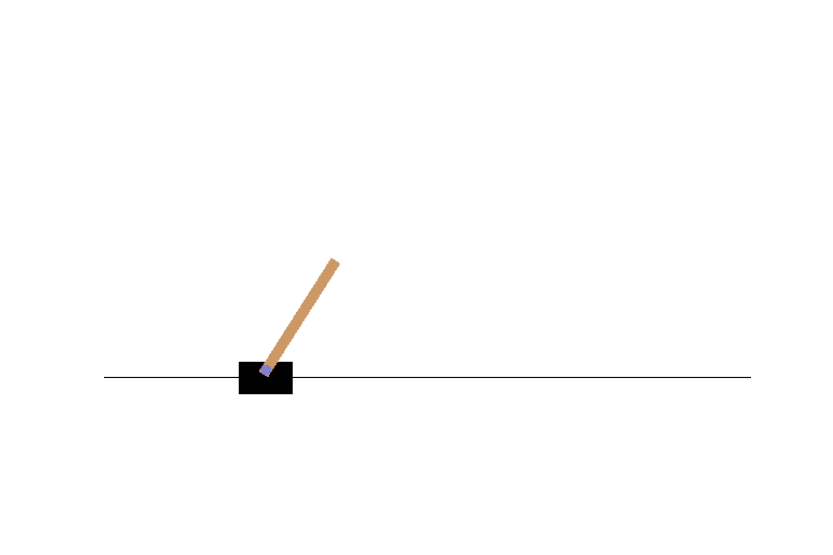
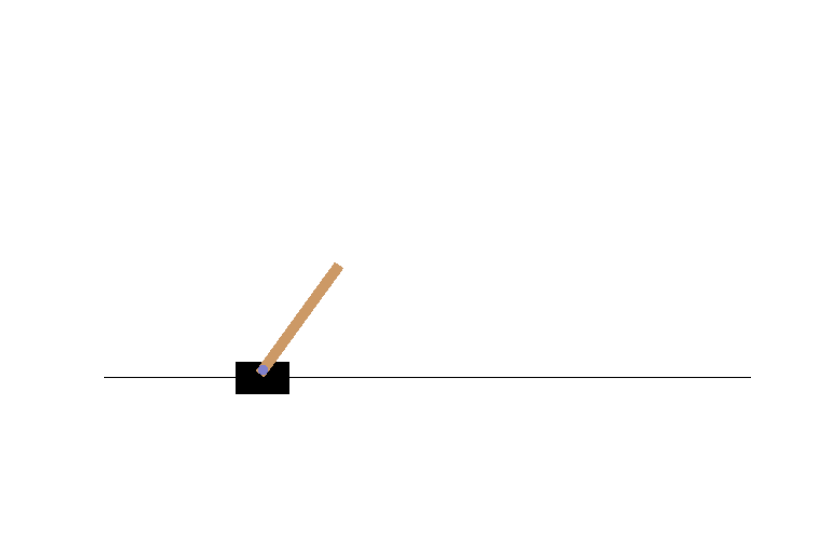
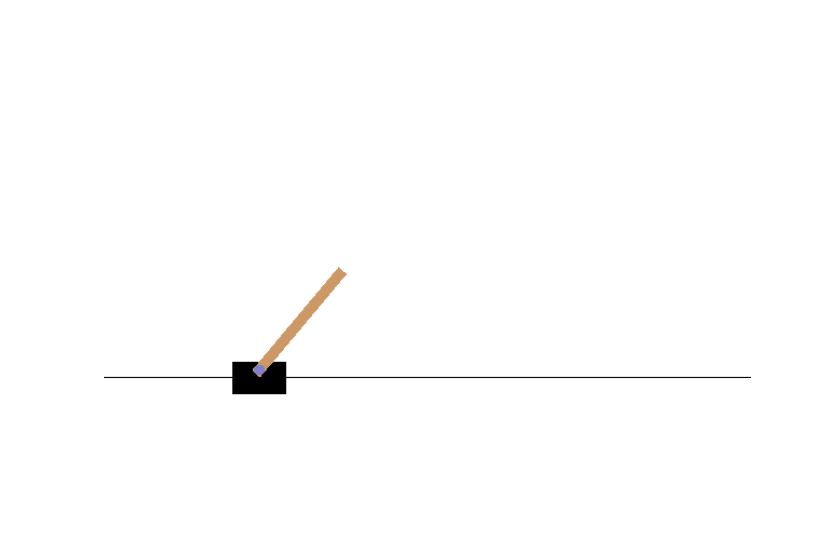
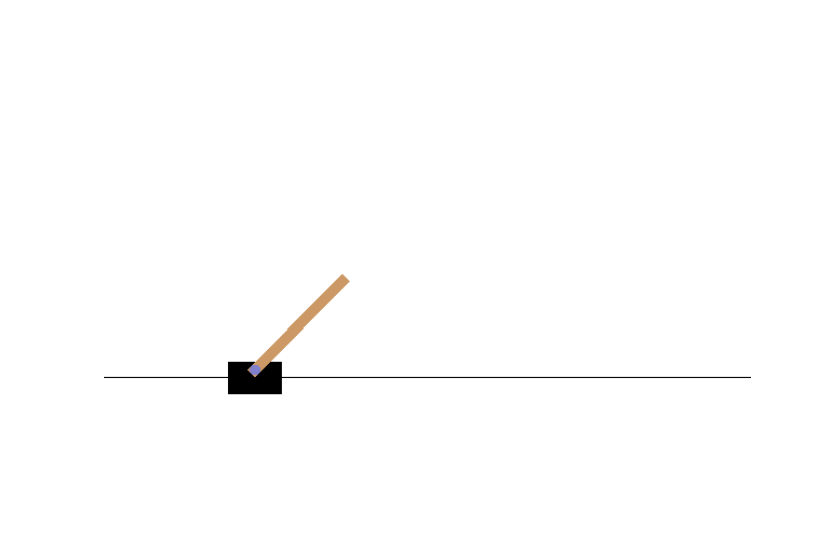
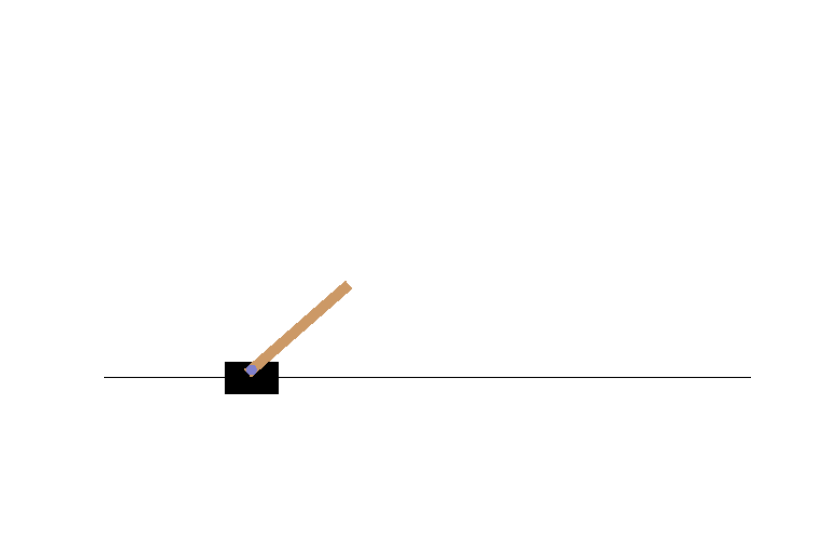
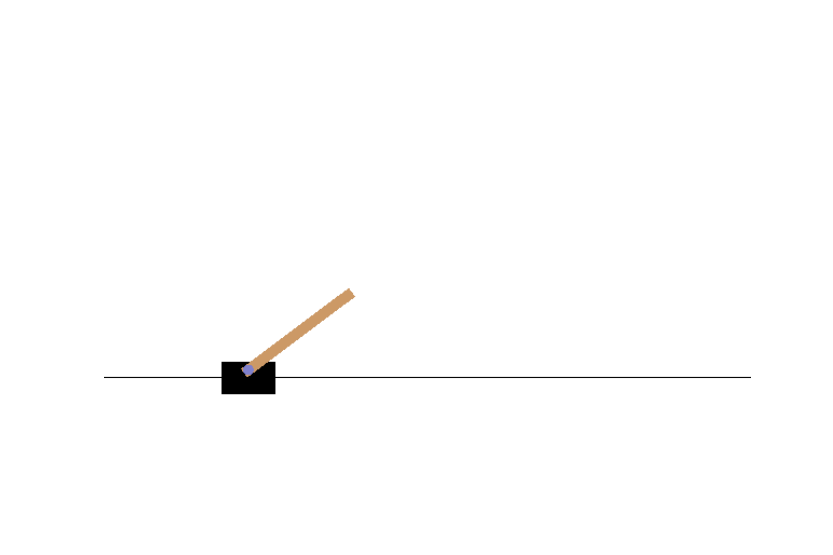
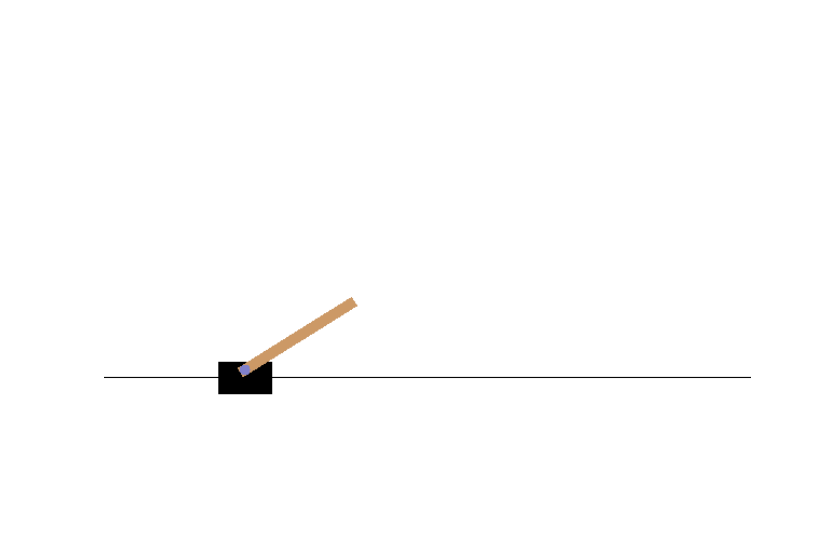
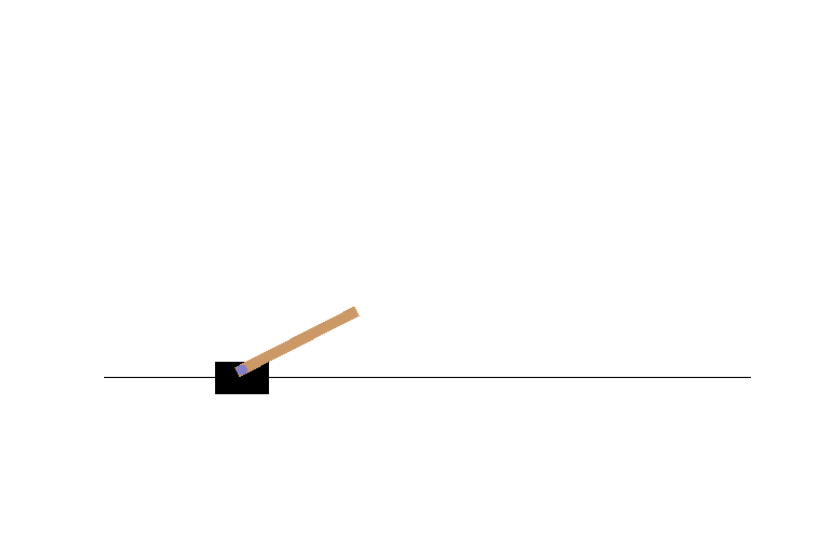
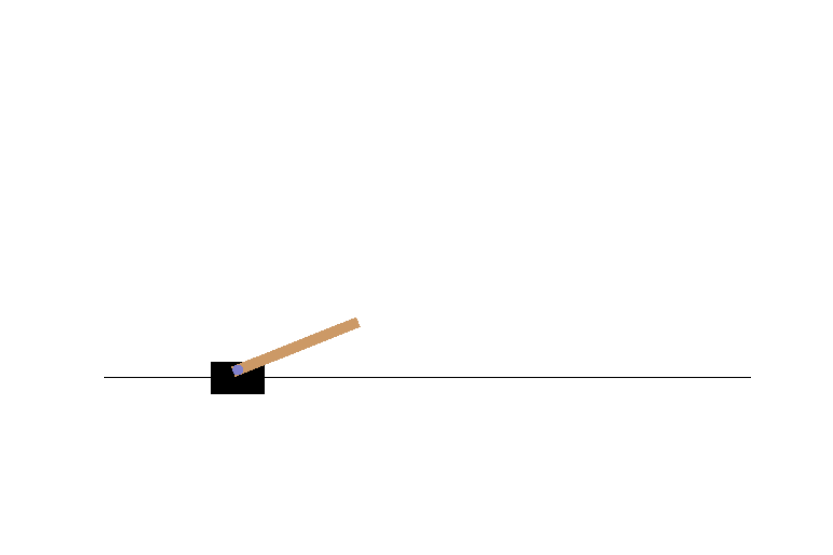
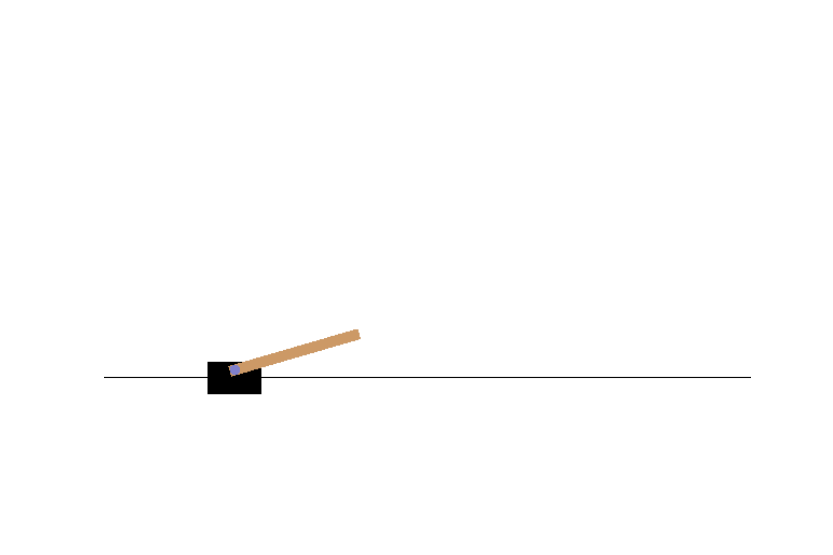

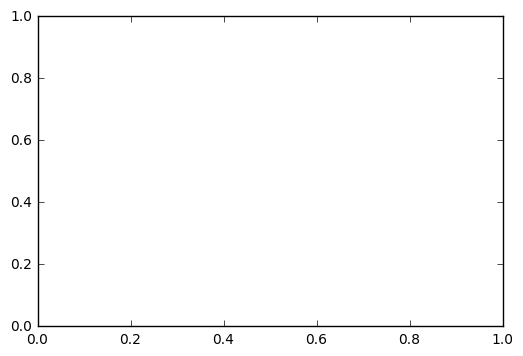

In [21]:
fig, ax = plt.subplots()
plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
patch = plt.imshow(frames[0])
plt.axis('off')

def animate(i):
    patch.set_data(frames[i])

anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
display(display_animation(anim, default_mode='loop'))

### Pretrained Deep Q Network

In [23]:
from python.dqn import dqn

ndim_action = env.action_space.n
ndim_obs = env.observation_space.shape[0]

agent = dqn(ndim_obs, ndim_action, model_path="/tmp/model.ckpt")

ValueError: Variable l1/weights already exists, disallowed. Did you mean to set reuse=True in VarScope? Originally defined at:

  File "/usr/local/lib/python3.5/site-packages/tensorflow/contrib/framework/python/ops/variables.py", line 233, in variable
    caching_device=caching_device)
  File "/usr/local/lib/python3.5/site-packages/tensorflow/contrib/framework/python/ops/arg_scope.py", line 177, in func_with_args
    return func(*args, **current_args)
  File "/usr/local/lib/python3.5/site-packages/tensorflow/contrib/framework/python/ops/variables.py", line 269, in model_variable
    caching_device=caching_device, device=device)


In [ ]:
# Run a demo of the environment
observation = env.reset()
cum_reward = 0
frames = []
for t in range(200):
    # Render into buffer. 
    # You will still see the window.
    frames.append(env.render(mode = 'rgb_array'))
    action = agent.act(np.expand_dims(observation, 0))[0]
    observation, reward, done, info = env.step(action)
env.render(close=True)

In [ ]:
fig, ax = plt.subplots()
plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
patch = plt.imshow(frames[0])
plt.axis('off')

def animate(i):
    patch.set_data(frames[i])

anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
display(display_animation(anim, default_mode='loop'))

# Code
This notebook and code (in Python/TensorFlow and Lua/Torch) for training a Deep Q Network will be uploaded to the GitHub repo after this presentation.

# APIs for other languages via http

C++/JS/Rust/Lua/Matlab:
https://github.com/openai/gym-http-api